# **Eurorepo.**
Información acerca de la documentación de incidentes de ciberseguridad en los que se comprometen infraestructuras críticas. Incluye detalles sobre ataques, como el tipo de ataque (secuestro de cuentas, robo de datos), las fechas de inicio y fin, las víctimas (empresas, individuos), y enlaces a fuentes que reportan el incidente.

## Importación de librerias.

In [779]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import hashlib

# Ajustar configuraciones de Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Importación e información del dataframe.

In [780]:
df = pd.read_csv("data\EUROREPO.csv", index_col=0)
df.head()

,name,description,start_date,end_date,inclusion_criteria,inclusion_criteria_subcode,source_incident_detection_disclosure,incident_type,receiver_name,receiver_country,receiver_region,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,initiator_category_subcode,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attribution_it_company,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_subcode,MITRE_initial_access,MITRE_impact,user_interaction,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,casualties,sources_url,added_to_DB,updated_at
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,Attack on critical infrastructure target(s),NaN,Incident disclosed by victim,Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),NATO; NORTHAM -,End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,NaN,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Not available,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,euro,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Not available,NaN,NaN,NaN,https://hackread.com/fur-affinity-website-hack...,2024-08-23,2024-08-25
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,Attack on critical infrastructure target(s),NaN,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),- NATO; NORTHAM -,Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,NaN,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Not available,NaN,NaN,NaN,0,NaN,NaN,Not available,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,euro,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Not available,NaN,NaN,NaN,https://www.malwarebytes.com/blog/cybercrime/2...,2024-08-23,2024-08-23
3720,Unknown Hackers Breached McDonald’s Instagram ...,"On 21 August 2024, unknown hackers gained cont...",2024-08-21,2024-08-21,Attack on critical infrastructure target(s),NaN,Incident disclosed by attacker,Hijacking with Misuse,McDonald’s,United States,NATO; NORTHAM,Critical infrastructure,Food,Not available,Not available,Not available,NaN,1,20790,NaT,Not available,Not ava

In [781]:
df.shape

(1215, 82)

In [782]:
df.dtypes

name                         object
description                  object
start_date                   object
end_date                     object
inclusion_criteria           object
                             ...   
legal_response_indicator     object
casualties                  float64
sources_url                  object
added_to_DB                  object
updated_at                   object
Length: 82, dtype: object

In [783]:
df.columns

Index(['name', 'description', 'start_date', 'end_date', 'inclusion_criteria', 'inclusion_criteria_subcode', 'source_incident_detection_disclosure', 'incident_type', 'receiver_name', 'receiver_country', 'receiver_region', 'receiver_category', 'receiver_category_subcode', 'initiator_name', 'initiator_country', 'initiator_category', 'initiator_category_subcode', 'number_of_attributions', 'attribution_ID', 'attribution_date', 'attribution_type', 'attribution_basis', 'attributing_actor', 'attribution_it_company', 'attributing_country', 'attributed_initiator', 'attributed_initiator_country', 'attributed_initiator_category', 'sources_attribution', 'cyber_conflict_issue', 'offline_conflict_issue', 'offline_conflict_issue_subcode', 'offline_conflict_intensity', 'offline_conflict_intensity_subcode', 'number_of_political_responses', 'political_response_date', 'political_response_type', 'political_response_type_subcode', 'political_response_country', 'political_response_actor', 'zero_days',
      

Este es un desglose de lo que trata cada columna del DataFrame.

1. **Name**: Nombre del incidente o evento relacionado.
2. **Description**: Descripción detallada del incidente o evento.
3. **Start date**: Fecha de inicio del incidente o conflicto.
4. **End date**: Fecha de finalización del incidente o conflicto (si aplica).
5. **Inclusion criteria**: Criterios utilizados para incluir el incidente en la base de datos.
6. **Inclusion criteria subcode**: Subcódigo que especifica los criterios de inclusión.
7. **Source incident detection disclosure**: Fuente de detección o divulgación del incidente.
8. **Incident type**: Tipo de incidente o ataque.
9. **Receiver name**: Nombre de la entidad que recibe o sufre el ataque.
10. **Receiver country**: País de la entidad que recibe el ataque.
11. **Receiver region**: Región geográfica del receptor del ataque.
12. **Receiver category**: Categoría de la entidad receptora del ataque.
13. **Receiver category subcode**: Subcódigo de la categoría de la entidad receptora.
14. **Initiator name**: Nombre de la entidad que inicia o perpetra el ataque.
15. **Initiator country**: País de la entidad iniciadora del ataque.
16. **Initiator category**: Categoría de la entidad iniciadora del ataque.
17. **Initiator category subcode**: Subcódigo de la categoría de la entidad iniciadora.
18. **Number of attributions**: Número de atribuciones o asignaciones del ataque a un actor.
19. **Attribution ID**: ID de la atribución del incidente.
20. **Attribution date**: Fecha en que se realizó la atribución del ataque.
21. **Attribution type**: Tipo de atribución realizada (e.g., política, técnica).
22. **Attribution basis**: Base sobre la cual se realizó la atribución (evidencia, análisis).
23. **Attributing actor**: Actor o entidad que hizo la atribución del incidente.
24. **Attribution it company**: Compañía tecnológica involucrada en la atribución del ataque.
25. **Attributing country**: País del actor que hizo la atribución del incidente.
26. **Attributed initiator**: Entidad a la que se le atribuye la autoría del ataque.
27. **Attributed initiator country**: País del iniciador atribuido.
28. **Attributed initiator category**: Categoría del iniciador atribuido.
29. **Sources attribution**: Fuentes que respaldan la atribución del ataque.
30. **Cyber conflict issue**: Temas o problemas relacionados con el conflicto cibernético.
31. **Offline conflict issue**: Temas o problemas del conflicto fuera del ciberespacio.
32. **Offline conflict issue subcode**: Subcódigo que detalla el problema de conflicto offline.
33. **Offline conflict intensity**: Intensidad del conflicto fuera del ciberespacio.
34. **Offline conflict intensity subcode**: Subcódigo para la intensidad del conflicto offline.
35. **Number of political responses**: Número de respuestas políticas al incidente.
36. **Political response date**: Fecha de la respuesta política.
37. **Political response type**: Tipo de respuesta política.
38. **Political response type subcode**: Subcódigo de la respuesta política.
39. **Political response country**: País que realizó la respuesta política.
40. **Political response actor**: Actor o entidad que realizó la respuesta política.
41. **Zero days**: Indicador de si se usó una vulnerabilidad "zero-day" (día cero) en el ataque.
42. **Zero days subcode**: Subcódigo relacionado con vulnerabilidades de día cero.
43. **MITRE initial access**: Técnica inicial de acceso según la clasificación MITRE ATT&CK.
44. **MITRE impact**: Impacto según la clasificación MITRE ATT&CK.
45. **User interaction**: Indicador de si hubo interacción con usuarios (p.ej., phishing).
46. **Has disruption**: Si el incidente provocó alguna interrupción o no.
47. **Data theft**: Indicador de si hubo robo de datos.
48. **disruption**: Detalle sobre la interrupción causada por el incidente.
49. **Hijacking**: Indicador de si hubo secuestro de sistemas o servicios.
50. **Physical effects spatial**: Efectos físicos a nivel espacial debido al incidente.
51. **Physical effects temporal**: Efectos físicos a nivel temporal causados por el incidente.
52. **Unweighted cyber intensity**: Intensidad cibernética sin ponderar.
53. **Target multiplier**: Multiplicador de objetivos afectados por el incidente.
54. **Weighted cyber intensity**: Intensidad cibernética ponderada.
55. **Impact indicator**: Indicador general del impacto del incidente.
56. **Impact indicator value**: Valor del indicador de impacto.
57. **Functional impact**: Impacto funcional causado por el incidente.
58. **Intelligence impact**: Impacto sobre la inteligencia o recolección de datos.
59. **Political impact affected entities**: Entidades afectadas por el impacto político.
60. **Political impact affected entities exact value**: Valor exacto de las entidades afectadas políticamente.
61. **Political impact third countries**: Terceros países afectados por el incidente.
62. **Political impact third countries exact value**: Valor exacto de terceros países afectados políticamente.
63. **Economic impact**: Impacto económico del incidente.
64. **Economic impact exact value**: Valor exacto del impacto económico.
65. **Economic impact currency**: Moneda utilizada para medir el impacto económico.
66. **State responsibility indicator**: Indicador de responsabilidad estatal en el incidente.
67. **IL breach indicator**: Indicador de si hubo una violación del derecho internacional.
68. **IL breach indicator subcode**: Subcódigo relacionado con la violación del derecho internacional.
69. **Evidence for sanctions indicator**: Indicador de evidencia que justifique sanciones.
70. **Number of legal responses**: Número de respuestas legales al incidente.
71. **Legal response date**: Fecha de las respuestas legales.
72. **Legal response type**: Tipo de respuesta legal.
73. **Legal response type subcode**: Subcódigo del tipo de respuesta legal.
74. **Legal response country**: País que realizó la respuesta legal.
75. **Legal response actor**: Actor o entidad que realizó la respuesta legal.
76. **Legal attribution reference**: Referencia a la atribución legal del ataque.
77. **Legal attribution reference subcode**: Subcódigo de la referencia de atribución legal.
78. **Legal Response Indicator**: Indicador de la existencia de una respuesta legal.
79. **Casualities**: Número de bajas o víctimas relacionadas con el incidente.
80. **Sources URL**: URLs o fuentes que documentan el incidente.
81. **Added to DB**: Fecha en que el incidente fue añadido a la base de datos.
82. **Updated at**: Fecha de la última actualización del registro en la base de datos.

Debemos de conocer bien esta diferencia para proseguir:
En este contexto, los términos **receiver**, **attribution**, y **attributed** se refieren a diferentes roles o aspectos dentro del ciclo de un incidente o ataque cibernético. Aquí está la explicación de cada uno:

1. **Receiver (Receptor)**:
- El **receiver** o receptor es la **entidad objetivo** del ataque. Este puede ser un país, una organización, una institución o un individuo que está en el lado que **recibe** el ataque o la amenaza cibernética.

2. **Attribution (Atribución)**:
- El término **attribution** hace referencia a la **identificación del autor o actor** que está detrás del ataque. En ciberseguridad, la atribución es el proceso de determinar quién o qué está detrás de una actividad maliciosa.

3. **Attributed (Atribuido)**:
- **Attributed** se refiere a la entidad que ha sido **acusada o identificada como responsable** del ataque. Es el actor, país, grupo o persona a quien se le asigna la responsabilidad del incidente.

**Resumen:**
- **Receiver** es quien **recibe** el ataque.
- **Attribution** es el **proceso de identificar** quién está detrás del ataque.
- **Attributed** se refiere a la **entidad acusada o identificada** como responsable del ataque.

### **Inclusion** e **Incident**.

In [784]:
df_1 = df.filter(regex='^inclusion|incident', axis=1)
df_1

,inclusion_criteria,inclusion_criteria_subcode,source_incident_detection_disclosure,incident_type
ID,,,,
3723,Attack on critical infrastructure target(s),NaN,Incident disclosed by victim,Hijacking without Misuse
3721,Attack on critical infrastructure target(s),NaN,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse
3720,Attack on critical infrastructure target(s),NaN,Incident disclosed by attacker,Hijacking with Misuse
3719,Attack on critical infrastructure target(s),NaN,Incident disclosed by attacker,Data theft; Disruption; Hijacking with Misuse;...
3717,Attack on critical infrastructure target(s),NaN,Incident disclosed by victim,Disruption; Ransomware
...,...,...,...,...
959,Attack conducted by nation state (generic “sta...,NaN,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse
960,Attack conducted by non-state group / non-stat...,Attack conducted by a state-affiliated group (...,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse
966,Attack conducted by non-state group / non-stat...,Attack conducted by a state-affiliated group (...,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse


In [785]:
df_1.isnull().sum()

inclusion_criteria                        1
inclusion_criteria_subcode              959
source_incident_detection_disclosure     22
incident_type                             3
dtype: int64

In [786]:
df.drop(['inclusion_criteria', 'inclusion_criteria_subcode'], axis=1, inplace=True)

In [787]:
df.dropna(subset=['incident_type', 'source_incident_detection_disclosure'], inplace=True) #pocas filas con nulos.

### **Receiver.**

In [788]:
df_1 = df.filter(regex='receiver', axis=1)
df_1

,receiver_name,receiver_country,receiver_region,receiver_category,receiver_category_subcode
ID,,,,,
3723,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),NATO; NORTHAM -,End user(s) / specially protected groups - Cri...,- Digital Provider
3721,Not available - Not available - Not available,Not available; Canada; Europe (region),- NATO; NORTHAM -,Unknown - Education - Critical infrastructure,- - Food
3720,McDonald’s,United States,NATO; NORTHAM,Critical infrastructure,Food
3719,Hoerbiger Holding,Switzerland,EUROPE; WESTEU,Critical infrastructure,Critical Manufacturing
3717,Lagoon,New Caledonia,NaN,Critical infrastructure,Telecommunications
...,...,...,...,...,...
959,None - None - None,"Russia; Egypt; Iran, Islamic Republic of",EUROPE; EASTEU; CSTO; SCO - MENA; MEA; AFRICA;...,Critical infrastructure; Critical infrastructu...,Energy; Chemicals; Defence industry; - Energy...
960,None - None - None - None - None - None - None...,United States; Brazil; China; France; Germany;...,NATO; NORTHAM - SOUTHAM - ASIA; SCS; EASIA; NE...,State institutions / political system; Critica...,; Energy; Transportation; Health; Finance; - ...
966,None - None - None,Vietnam; Japan; Middle East (region),ASIA; SCS; SEA - ASIA; SCS; NEA -,State institutions / political system; Critica...,Government / ministries; Transportation; ; ; H...


In [789]:
df_1.isnull().sum()

receiver_name                183
receiver_country               1
receiver_region               69
receiver_category              0
receiver_category_subcode     10
dtype: int64

Optamos por eliminar la **región** ya que va a dividirse por continentes.

In [790]:
df.drop(['receiver_region'], axis=1, inplace=True)

In [791]:
df.dropna(subset=['receiver_country', 'receiver_category_subcode'], inplace=True) #pocas filas con nulos.

In [792]:
df['receiver_name'].fillna('Unknown receiver', inplace=True)

### **Initiator.**

In [793]:
df_1 = df.filter(regex='^initiator', axis=1)
df_1

,initiator_name,initiator_country,initiator_category,initiator_category_subcode
ID,,,,
3723,Not available,Not available,Not available,NaN
3721,Not available,Not available,Not available,NaN
3720,Not available,Not available,Not available,NaN
3719,Akira Ransomware Group/Storm-1567,Not available,Non-state-group,Criminal(s)
3717,Not available,Not available,Not available,NaN
...,...,...,...,...
959,NSA/Equation Group,Unknown,Unknown - not attributed,NaN
960,APT 20,China,"Non-state actor, state-affiliation suggested",NaN
966,APT37/Richochet Chollima/Red Eyes/InkySquid/Sc...,"Korea, Democratic People's Republic of; Korea,...","Non-state actor, state-affiliation suggested; ...",NaN


In [794]:
df_1.isnull().sum()

initiator_name                108
initiator_country               1
initiator_category              1
initiator_category_subcode    731
dtype: int64

In [795]:
df.drop(['initiator_category_subcode'], axis=1, inplace=True)

In [796]:
df.dropna(subset=['initiator_country', 'initiator_category'], inplace=True) #pocas filas con nulos.

In [797]:
df['initiator_name'].fillna('Unknown initiator', inplace=True)

### **Attribution** y **Attributing**.

In [798]:
df_1 = df.filter(regex='^attribut|number_of_attributions', axis=1)
df_1

,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attribution_it_company,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category
ID,,,,,,,,,,,
3723,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
3721,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
3720,1,20790,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
3719,1,20787,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Not available,Not available,Akira Ransomware Group/Storm-1567,Not available,Non-state-group
3717,1,20753,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
...,...,...,...,...,...,...,...,...,...,...,...
959,2,1128; 1129,2018-01-01 00:00:00; 2018-01-01 00:00:00,"Technical report (e.g., by IT-companies, Citiz...",IT-security community attributes attacker; Med...,NaN,NaN,NaN,NSA/Equation Group; NSA/Equation Group,Unknown; United States,Unknown - not attributed; State
960,1,1130,2019-01-01 00:00:00,"Technical report (e.g., by IT-companies, Citiz...",IT-security community attributes attacker,NaN,NaN,NaN,APT 20,China,"Non-state actor, state-affiliation suggested"
966,1,6582; 6582,2018-01-01 00:00:00; 2018-01-01 00:00:00,"Technical report (e.g., by IT-companies, Citiz...",IT-security community attributes attacker; IT-...,NaN,NaN,NaN,APT37/Richochet Chollima/Red Eyes/InkySquid/Sc...,"Korea, Democratic People's Republic of; Korea,...","Non-state actor, state-affiliation suggested; ..."


In [799]:
df_1.isnull().sum()

number_of_attributions             0
attribution_ID                     0
attribution_date                   0
attribution_type                   0
attribution_basis                  0
attributing_actor                253
attribution_it_company           286
attributing_country              251
attributed_initiator             101
attributed_initiator_country       0
attributed_initiator_category      0
dtype: int64

In [800]:
df.drop(['attribution_it_company'], axis=1, inplace=True)

In [801]:
df.shape

(1179, 77)

In [802]:
df.dropna(subset=['number_of_attributions', 'attribution_ID', 'attribution_date', 'attribution_type', 'attribution_basis'], inplace=True) #pocas filas con nulos.

A continuación, se eliminan las filas en las que más del 80% de los valores en estas columnas estén vacíos, garantizando que solo se conserven las filas con suficiente información relevante. Posteriormente, para las filas restantes, se tratan los valores nulos en todas las columnas del DataFrame: en las columnas numéricas, los valores nulos se reemplazan con la mediana, mientras que en las columnas categóricas se sustituyen por la moda (el valor más frecuente). Este enfoque asegura un conjunto de datos limpio y consistente para el análisis.

In [803]:
columns_to_check = ['attributing_actor', 'attributing_country', 'attributed_initiator']

threshold = 0.8  # Porcentaje de nulos permitido
df = df[df[columns_to_check].isnull().mean(axis=1) < threshold]

In [804]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Si es numérica
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
    else:  # Si es categórica u otro tipo
        mode_value = df[column].mode()[0]  # Primera moda
        df[column].fillna(mode_value, inplace=True)

### **Attributed**.

In [805]:
df_1 = df.filter(regex='attributed|sources_attribution', axis=1)
df_1

,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution
ID,,,,
3723,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...
3721,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...
3720,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...
3719,Akira Ransomware Group/Storm-1567,Not available,Non-state-group,https://www.security-incidents.de/assets/img/i...
3717,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...
...,...,...,...,...
959,NSA/Equation Group; NSA/Equation Group,Unknown; United States,Unknown - not attributed; State,https://www.zdnet.com/article/kaspersky-says-i...
960,APT 20,China,"Non-state actor, state-affiliation suggested",https://www.dragos.com/year-in-review/#section...
966,APT37/Richochet Chollima/Red Eyes/InkySquid/Sc...,"Korea, Democratic People's Republic of; Korea,...","Non-state actor, state-affiliation suggested; ...",https://www2.fireeye.com/rs/848-DID-242/images...


In [806]:
df_1.isnull().sum()

attributed_initiator             0
attributed_initiator_country     0
attributed_initiator_category    0
sources_attribution              0
dtype: int64

In [807]:
df.dropna(subset=['attributed_initiator', 'attributed_initiator_country', 'attributed_initiator_category', 'sources_attribution'], inplace=True)

### Conflict.

In [808]:
df_1 = df.filter(regex='conflict', axis=1)
df_1

,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode
ID,,,,,
3723,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5
3721,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5
3720,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5
3719,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5
3717,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5
...,...,...,...,...,...
959,Unknown,Unknown,Russia – Ukraine; Russia – Ukraine; Russia – U...,Unknown,HIIK 5
960,Unknown,Unknown,Russia – Ukraine; Russia – Ukraine; Russia – U...,Unknown,HIIK 5
966,International power,Unknown,Russia – Ukraine; Russia – Ukraine; Russia – U...,Unknown,HIIK 5


In [809]:
df_1.isnull().sum()

cyber_conflict_issue                  0
offline_conflict_issue                0
offline_conflict_issue_subcode        0
offline_conflict_intensity            0
offline_conflict_intensity_subcode    0
dtype: int64

### **Political Response**.

In [810]:
df_1 = df.filter(regex='political_response', axis=1)
df_1

,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor
ID,,,,,,
3723,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
3721,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
3720,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
3719,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
3717,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
...,...,...,...,...,...,...
959,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
960,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available
966,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available


In [811]:
df_1.isnull().sum()

number_of_political_responses      0
political_response_date            0
political_response_type            0
political_response_type_subcode    0
political_response_country         0
political_response_actor           0
dtype: int64

### **Zero** y **MITRE**.

In [812]:
df_1 = df.filter(regex='zero|MITRE', axis=1)
df_1

,zero_days,zero_days_subcode,MITRE_initial_access,MITRE_impact
ID,,,,
3723,No,One,Not available,Data Exfiltration
3721,No,One,Not available,Data Exfiltration
3720,No,One,Not available,Data Exfiltration
3719,No,One,Not available,Data Exfiltration
3717,No,One,Not available,Data Exfiltration
...,...,...,...,...
959,No,One,Not available,Data Exfiltration
960,No,One,Not available,Data Exfiltration
966,Yes,One,Not available,Data Exfiltration


In [813]:
df_1.isnull().sum()

zero_days               0
zero_days_subcode       0
MITRE_initial_access    0
MITRE_impact            0
dtype: int64

In [814]:
df.drop(['zero_days_subcode'], axis=1, inplace=True)

### **User interaction**, **Disruption**, **Data theft**, **Hijacking**.

In [815]:
df_1 = df.filter(regex='user|disruption|data|hijacking', axis=1)
df_1

,user_interaction,has_disruption,data_theft,disruption,hijacking
ID,,,,,
3723,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
3721,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
3720,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
3719,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
3717,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
...,...,...,...,...,...
959,Not available,False,For private / commercial targets: non-sensitiv...,none,"Hijacking, system misuse, e.g., through data t..."
960,Not available,False,For private / commercial targets: non-sensitiv...,none,"Hijacking, system misuse, e.g., through data t..."
966,Not available,False,For private / commercial targets: non-sensitiv...,none,"Hijacking, system misuse, e.g., through data t..."


In [816]:
df_1.describe()

,user_interaction,has_disruption,data_theft,disruption,hijacking
count,1127,1127,1127,1127,1127
unique,2,2,7,6,5
top,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t..."
freq,1118,705,507,516,815


In [817]:
df_1.isnull().sum()

user_interaction    0
has_disruption      0
data_theft          0
disruption          0
hijacking           0
dtype: int64

### **Physical**, **Un-Weighted** y **Target Multiplier**.

In [818]:
df_1 = df.filter(regex='physical|weigh|target', axis=1)
df_1

,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity
ID,,,,,
3723,none,none,0,Moderate - high political importance,3.0
3721,none,none,0,Moderate - high political importance,3.0
3720,none,none,0,Moderate - high political importance,3.0
3719,none,none,0,Moderate - high political importance,3.0
3717,none,none,0,Moderate - high political importance,3.0
...,...,...,...,...,...
959,none,none,3,Moderate - high political importance,3.0
960,none,none,3,Moderate - high political importance,3.0
966,none,none,3,Moderate - high political importance,3.0


In [819]:
df_1.describe(include='all')

,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity
count,1127,1127,1127.000000,1127,1127.000000
unique,5,5,NaN,5,NaN
top,none,none,NaN,Moderate - high political importance,NaN
freq,1106,1107,NaN,1095,NaN
mean,NaN,NaN,2.643301,NaN,2.923691
std,NaN,NaN,1.543510,NaN,1.423427
min,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,1.000000,NaN,2.000000
50%,NaN,NaN,3.000000,NaN,3.000000
75%,NaN,NaN,4.000000,NaN,4.000000


In [820]:
df_1.isnull().sum()

physical_effects_spatial      0
physical_effects_temporal     0
unweighted_cyber_intensity    0
target_multiplier             0
weighted_cyber_intensity      0
dtype: int64

### **Impact**.

In [821]:
df_1 = df.filter(regex='^impact|functional|intelligence', axis=1)
df_1

,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact
ID,,,,
3723,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3721,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3720,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3719,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3717,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
...,...,...,...,...
959,Low,6.0,No system interference/disruption,No data breach/exfiltration or data corruption...
960,Low,6.0,No system interference/disruption,No data breach/exfiltration or data corruption...
966,Low,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...


In [822]:
df_1.describe(include='all')

,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact
count,1127,1127.000000,1127,1127
unique,4,NaN,6,6
top,Low,NaN,No system interference/disruption,No data breach/exfiltration or data corruption...
freq,716,NaN,792,798
mean,NaN,4.767524,NaN,NaN
std,NaN,3.374901,NaN,NaN
min,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN
50%,NaN,6.000000,NaN,NaN
75%,NaN,7.000000,NaN,NaN


In [823]:
df_1.isnull().sum()

impact_indicator          0
impact_indicator_value    0
functional_impact         0
intelligence_impact       0
dtype: int64

### **Political Impact**.

In [824]:
df_1 = df.filter(regex='political_impact', axis=1)
df_1

,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value
ID,,,,
3723,1-10,0.0,1-10,0.0
3721,1-10,0.0,1-10,0.0
3720,1-10,0.0,1-10,0.0
3719,1-10,0.0,1-10,0.0
3717,1-10,0.0,1-10,0.0
...,...,...,...,...
959,1-10,1.0,1-10,0.0
960,1-10,1.0,1-10,0.0
966,1-10,0.0,1-10,0.0


In [825]:
df_1.isnull().sum()

political_impact_affected_entities                0
political_impact_affected_entities_exact_value    0
political_impact_third_countries                  0
political_impact_third_countries_exact_value      0
dtype: int64

### **Economic**, **State Responsability**, **IL**, **Evidence**.

In [826]:
df_1 = df.filter(regex='economic|IL|evidence|state', axis=1)
df_1

,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator
ID,,,,,,,
3723,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
3721,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
3720,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
3719,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
3717,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
...,...,...,...,...,...,...,...
959,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
960,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
966,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available


In [827]:
df_1.isnull().sum()

economic_impact                     0
economic_impact_exact_value         0
economic_impact_currency            0
state_responsibility_indicator      0
IL_breach_indicator                 0
IL_breach_indicator_subcode         0
evidence_for_sanctions_indicator    0
dtype: int64

In [828]:
df_1.describe(include='all')

,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator
count,1127,1.127000e+03,1127,1127,1127,1127,1127
unique,3,NaN,2,4,64,52,3
top,Not available,NaN,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available
freq,1103,NaN,1088,768,616,836,1125
mean,NaN,1.633957e+06,NaN,NaN,NaN,NaN,NaN
std,NaN,2.743070e+07,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN


### **Legal**.

In [829]:
df_1 = df.filter(regex='legal', axis=1)
df_1

,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator
ID,,,,,,,,,
3723,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3721,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3720,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3719,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3717,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
...,...,...,...,...,...,...,...,...,...
959,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
960,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
966,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...


In [830]:
df_1.isnull().sum()

number_of_legal_responses              0
legal_response_date                    0
legal_response_type                    0
legal_response_type_subcode            0
legal_response_country                 0
legal_response_actor                   0
legal_attribution_reference            0
legal_attribution_reference_subcode    0
legal_response_indicator               0
dtype: int64

In [831]:
df_1.describe(include='all')

,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator
count,1127.000000,1127,1127,1127,1127,1127,1127,1127,1127
unique,NaN,111,13,8,43,77,11,5,4
top,NaN,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
freq,NaN,997,987,1116,988,1028,1095,1123,941
mean,0.137533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.408265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Resto de columnas.

In [832]:
df_1 = df.iloc[:, -4:]
df_1

,casualties,sources_url,added_to_DB,updated_at
ID,,,,
3723,NaN,https://hackread.com/fur-affinity-website-hack...,2024-08-23,2024-08-25
3721,NaN,https://www.malwarebytes.com/blog/cybercrime/2...,2024-08-23,2024-08-23
3720,NaN,https://www.finansgundem.com/haber/hackerlar-m...,2024-08-23,2024-08-23
3719,NaN,https://www.inside-it.ch/schweizer-industrieko...,2024-08-23,2024-08-23
3717,NaN,https://www.zataz.com/cyberattaque-en-caledoni...,2024-08-22,2024-08-22
...,...,...,...,...
959,NaN,https://securelist.com/darkpulsar/88199/https:...,2022-08-15,2022-11-02
960,NaN,https://resources.fox-it.com/rs/170-CAK-271/im...,2022-08-15,2023-03-13
966,NaN,https://www2.fireeye.com/rs/848-DID-242/images...,2022-08-15,2023-02-08


In [833]:
df_1.isnull().sum()

casualties     1127
sources_url       0
added_to_DB       0
updated_at        0
dtype: int64

In [834]:
df.dropna(subset=['sources_url'], inplace=True) #pocas filas con nulos.

Eliminamos estas ya que una de ellas tiene todo valores nulos. En el caso de las otras, son fechas que no interesan y no proporcionan información relevante.

In [835]:
df.drop(['added_to_DB','casualties', 'updated_at'], axis=1, inplace=True)

In [836]:
df.head()

,name,description,start_date,end_date,source_incident_detection_disclosure,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,MITRE_initial_access,MITRE_impact,user_interaction,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,Incident disclosed by victim,Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,https://hackread.com/fur-affinity-website-hack...
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,https://www.dragos.com/year-in-review/#section...,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No d

## Limpieza de datos.

**Extracción correcta de las URLs.**

In [837]:
urls = ['sources_url', 'sources_attribution']

In [838]:
for i in urls:
    df[i] = df[i].str.extract(r'(?<=//)(.*?)(?=/)')
    df[i] = df[i].str.replace(r'^www\.', '', regex=True)
    df[i] = df[i].str.replace(r'\.[a-z]{2,3}$', '', regex=True)

### Manejo de filas duplicadas.
En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [839]:
df.duplicated().sum() # Columnas duplicadas

0

In [840]:
df.drop_duplicates(inplace = True)

In [841]:
df.shape

(1127, 73)

### Selección de variables categóricas y continuas.
Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [842]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if len(df[i].unique()) > 25:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: name, description, start_date, end_date, incident_type, receiver_name, receiver_country, receiver_category, receiver_category_subcode, initiator_name, initiator_country, initiator_category, attribution_ID, attribution_date, attribution_type, attribution_basis, attributing_actor, attributing_country, attributed_initiator, attributed_initiator_country, attributed_initiator_category, sources_attribution, cyber_conflict_issue, offline_conflict_issue, offline_conflict_issue_subcode, political_response_date, political_response_type_subcode, political_response_country, political_response_actor, MITRE_initial_access, MITRE_impact, political_impact_affected_entities_exact_value, economic_impact_exact_value, IL_breach_indicator, IL_breach_indicator_subcode, legal_response_date, legal_response_country, legal_response_actor, sources_url
Variables categóricas: source_incident_detection_disclosure, number_of_attributions, offline_conflict_intensity, offline_conflict_intensity_su

#### Tratamiento de variables categóricas.
Para el posterior modelo de clasificación, necesitamos codificar nuestras variables. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [843]:
df[v_categoricas].nunique()

source_incident_detection_disclosure            25
number_of_attributions                           9
offline_conflict_intensity                       4
offline_conflict_intensity_subcode               5
number_of_political_responses                    8
political_response_type                         25
zero_days                                        5
user_interaction                                 2
has_disruption                                   2
data_theft                                       7
disruption                                       6
hijacking                                        5
physical_effects_spatial                         5
physical_effects_temporal                        5
unweighted_cyber_intensity                       8
target_multiplier                                5
weighted_cyber_intensity                        11
impact_indicator                                 4
impact_indicator_value                          15
functional_impact              

In [844]:
# Filtrar variables categoricas que son de tipo object
categoricas_object = [col for col in v_categoricas if df[col].dtype == 'object']

df[categoricas_object].nunique()

source_incident_detection_disclosure    25
offline_conflict_intensity               4
offline_conflict_intensity_subcode       5
political_response_type                 25
zero_days                                5
user_interaction                         2
data_theft                               7
disruption                               6
hijacking                                5
physical_effects_spatial                 5
physical_effects_temporal                5
target_multiplier                        5
impact_indicator                         4
functional_impact                        6
intelligence_impact                      6
political_impact_affected_entities       6
political_impact_third_countries         4
economic_impact                          3
economic_impact_currency                 2
state_responsibility_indicator           4
evidence_for_sanctions_indicator         3
legal_response_type                     13
legal_response_type_subcode              8
legal_attri

##### **Source Incident Detection Disclosure.**

In [845]:
df['source_incident_detection_disclosure'].unique()

array(['Incident disclosed by victim',
       'Incident disclosed by IT-security company',
       'Incident disclosed by attacker',
       'Incident disclosed by media (without further information on source); Incident disclosed by authorities of victim state',
       'Incident disclosed by media (without further information on source)',
       'Incident disclosed by authorities of victim state',
       'Incident disclosed by third-party-actor (e.g., Citizen Lab, Amnesty International, whistleblowers) or authorities of another state',
       'Incident disclosed by media (without further information on source); Incident disclosed by victim',
       'Incident disclosed by media (without further information on source); Incident disclosed by attacker',
       'Incident disclosed by victim; Incident disclosed by attacker',
       'Incident disclosed by victim; Incident disclosed by authorities of victim state',
       'Incident disclosed by victim; Incident disclosed by IT-security company',

In [846]:
df['source_incident_detection_disclosure'] = (
    df['source_incident_detection_disclosure']
    .str.replace('Incident disclosed by ', '', regex=True)
    .str.replace(';', ',', regex=True)
)

Al tener le Dataframe muchas columnas, no es óptimo el uso del **One-Hot Encoding**. Para abordar este problema, se utiliza **Hash Encoding**. En lugar de crear una columna por cada categoría única, **Hash Encoding** aplica una función de hash a las categorías y genera un número reducido de columnas, que corresponden a valores hash generados a partir de las categorías. Este enfoque permite reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

In [847]:
def hash_category(category, max_hash_size=1000): # Si solo hay una category.
    return int(hashlib.md5(category.encode('utf-8')).hexdigest(), 16) % max_hash_size

In [848]:
def hash_categories(row, max_hash_size=1000): # Si hay varias categories.
    categories = row.split(', ')
    return [hash_category(cat, max_hash_size) for cat in categories]

In [849]:
df['source_incident_detection_disclosure_hashed'] = df['source_incident_detection_disclosure'].apply(hash_categories)

In [850]:
cols = df.columns.tolist()
disclosure_index = cols.index('source_incident_detection_disclosure')
cols.insert(disclosure_index + 1, cols.pop(cols.index('source_incident_detection_disclosure_hashed')))
df = df[cols]

In [851]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,MITRE_initial_access,MITRE_impact,user_interaction,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,HIIK 5,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; S

##### **Offline Conflict.**

**Offline Conflict Intensity.**

In [852]:
df['offline_conflict_intensity'].unique()

array(['Not available', 'Yes / HIIK intensity', 'Unknown',
       'Not available; Not available'], dtype=object)

In [853]:
df['offline_conflict_intensity'] = df['offline_conflict_intensity'].str.replace('Not available; Not available', 'Not available', regex=True)

In [854]:
label_encoder = LabelEncoder()
df['offline_conflict_intensity_encoded'] = label_encoder.fit_transform(df['offline_conflict_intensity'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [855]:
columns = df.columns.tolist()
index = columns.index('offline_conflict_intensity')
columns.insert(index + 1, columns.pop())
df = df[columns]

**Offline Conflict Intensity Subcode.**

In [856]:
df['offline_conflict_intensity_subcode'].unique()

array(['HIIK 5', 'HIIK 2', 'HIIK 3', 'HIIK 1', 'HIIK 4'], dtype=object)

In [857]:
label_encoder = LabelEncoder()
df['offline_conflict_intensity_subcode_encoded'] = label_encoder.fit_transform(df['offline_conflict_intensity_subcode'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [858]:
columns = df.columns.tolist()
index = columns.index('offline_conflict_intensity_subcode')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [859]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,MITRE_initial_access,MITRE_impact,user_interaction,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or d

##### **Political Response Type.**

In [860]:
df['political_response_type'].unique()

array(['Not available', 'State Actors: Preventive measures',
       'State Actors: Stabilizing measures',
       'EU member states: Stabilizing measures; EU member states: Stabilizing measures',
       'State Actors: Preventive measures; State Actors: Preventive measures; State Actors: Preventive measures',
       'State Actors: Legislative reactions; State Actors: Legislative reactions',
       'EU member states: Preventive measures',
       'State Actors: Executive reactions',
       'EU member states: Legislative reactions',
       'State Actors: Preventive measures; State Actors: Preventive measures',
       'State Actors: Preventive measures; State Actors: Executive reactions',
       'EU: Legislative reactions; EU: Legislative reactions',
       'State Actors: Preventive measures; EU member states: Preventive measures; State Actors: Preventive measures; State Actors: Preventive measures; State Actors: Preventive measures',
       'State Actors: Legislative reactions',
       'Sta

##### **Zero days.**

In [861]:
df['zero_days'].unique()

array(['No', 'No; No', 'Yes', 'Not available', 'Unknown'], dtype=object)

In [862]:
df['zero_days'] = df['zero_days'].str.replace('No; No', 'No', regex=True)

In [863]:
label_encoder = LabelEncoder()
df['zero_days_encoded'] = label_encoder.fit_transform(df['zero_days'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [864]:
columns = df.columns.tolist()
index = columns.index('zero_days')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [865]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data b

##### **User Interaction.**

In [866]:
df['user_interaction'].unique()

array(['Not available', 'Required'], dtype=object)

In [867]:
label_encoder = LabelEncoder()
df['user_interaction_encoded'] = label_encoder.fit_transform(df['user_interaction'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [868]:
columns = df.columns.tolist()
index = columns.index('user_interaction')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [869]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system int

##### **Data Theft.**

In [870]:
df['data_theft'].unique()

array(['Not available',
       'For private / commercial targets: non-sensitive information (incident scores 1 point in intensity)',
       'For private / commercial targets: non-sensitive information (incident scores 1 point in intensity); For private / commercial targets: non-sensitive information (incident scores 1 point in intensity)',
       'For private / commercial targets: sensitive information (incident scores 2 points in intensity)',
       'For private / commercial targets: sensitive information (incident scores 2 points in intensity); For private / commercial targets: sensitive information (incident scores 2 points in intensity)',
       'Not available; Not available', 'none'], dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [871]:
df['data_theft'] = df['data_theft'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [872]:
df['data_theft'].unique()

array(['Not available',
       'For private / commercial targets: non-sensitive information (incident scores 1 point in intensity)',
       'For private / commercial targets: sensitive information (incident scores 2 points in intensity)',
       'none'], dtype=object)

In [873]:
label_encoder = LabelEncoder()
df['data_theft_encoded'] = label_encoder.fit_transform(df['data_theft'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [874]:
columns = df.columns.tolist()
index = columns.index('data_theft')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [875]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not ava

##### **Disruption.**

In [876]:
df['disruption'].unique()

array(['Not available',
       'Long-term disruption (> 24h; incident scores 2 points in intensity)',
       'Long-term disruption (> 24h; incident scores 2 points in intensity); Long-term disruption (> 24h; incident scores 2 points in intensity)',
       'Short-term disruption (< 24h; incident scores 1 point in intensity)',
       'Not available; Not available', 'none'], dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [877]:
df['disruption'] = df['disruption'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [878]:
df['disruption'].unique()

array(['Not available',
       'Long-term disruption (> 24h; incident scores 2 points in intensity)',
       'Short-term disruption (< 24h; incident scores 1 point in intensity)',
       'none'], dtype=object)

In [879]:
label_encoder = LabelEncoder()
df['disruption_encoded'] = label_encoder.fit_transform(df['disruption'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [880]:
columns = df.columns.tolist()
index = columns.index('disruption')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [881]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",none,none,0,Moderate - high politica

##### **Hijacking.**

In [882]:
df['hijacking'].unique()

array(['Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity)',
       'Not available',
       'Hijacking, not used - empowerment (incident scores 1 point in intensity)',
       'Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity); Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity)',
       'none'], dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [883]:
df['hijacking'] = df['hijacking'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [884]:
df['hijacking'].unique()

array(['Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity)',
       'Not available',
       'Hijacking, not used - empowerment (incident scores 1 point in intensity)',
       'none'], dtype=object)

In [885]:
label_encoder = LabelEncoder()
df['hijacking_encoded'] = label_encoder.fit_transform(df['hijacking'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [886]:
columns = df.columns.tolist()
index = columns.index('hijacking')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [887]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,none,0,M

##### **Physical Effects.**

**Physical Effects Spatial.**

In [888]:
df['physical_effects_spatial'].unique()

array(['none', 'none; none', 'Not available',
       'Local effects, e.g., affecting only one restricted area of a country or region (incident scores 1 point in intensity)',
       'Widespread effects, e.g., affecting different regions of country or a country as a whole (incident scores 2 points in intensity)'],
      dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [889]:
df['physical_effects_spatial'] = df['physical_effects_spatial'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [890]:
df['physical_effects_spatial'].unique()

array(['none', 'Not available',
       'Local effects, e.g., affecting only one restricted area of a country or region (incident scores 1 point in intensity)',
       'Widespread effects, e.g., affecting different regions of country or a country as a whole (incident scores 2 points in intensity)'],
      dtype=object)

In [891]:
label_encoder = LabelEncoder()
df['physical_effects_spatial_encoded'] = label_encoder.fit_transform(df['physical_effects_spatial'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [892]:
columns = df.columns.tolist()
index = columns.index('physical_effects_spatial')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [893]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g.

**Physical Effects Temporal.**

In [894]:
df['physical_effects_temporal'].unique()

array(['none', 'none; none', 'Not available',
       'Short duration (< 24h; incident scores 1 point in intensity)',
       'Long lasting effects (> 24h; incident scores 2 points in intensity)'],
      dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [895]:
df['physical_effects_temporal'] = df['physical_effects_temporal'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [896]:
df['physical_effects_temporal'].unique()

array(['none', 'Not available',
       'Short duration (< 24h; incident scores 1 point in intensity)',
       'Long lasting effects (> 24h; incident scores 2 points in intensity)'],
      dtype=object)

In [897]:
label_encoder = LabelEncoder()
df['physical_effects_temporal_encoded'] = label_encoder.fit_transform(df['physical_effects_temporal'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [898]:
columns = df.columns.tolist()
index = columns.index('physical_effects_temporal')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [899]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not availa

##### **Target Multiplier.**

In [900]:
df['target_multiplier'].unique()

array(['Moderate - high political importance',
       'Moderate - high political importance; Moderate - high political importance',
       'Very high political importance (e.g., critical infrastructure, military) - intensity multiplied by 1.5',
       'Not available', 'Not available; Not available'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [901]:
df['target_multiplier'] = df['target_multiplier'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [902]:
df['target_multiplier'].unique()

array(['Moderate - high political importance',
       'Very high political importance (e.g., critical infrastructure, military) - intensity multiplied by 1.5',
       'Not available'], dtype=object)

In [903]:
label_encoder = LabelEncoder()
df['target_multiplier_encoded'] = label_encoder.fit_transform(df['target_multiplier'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [904]:
columns = df.columns.tolist()
index = columns.index('target_multiplier')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [905]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,Fal

##### **Impact Indicator.**

In [906]:
df['impact_indicator'].unique()

array(['Not available', 'Low', 'Minor', 'Medium'], dtype=object)

In [907]:
label_encoder = LabelEncoder()
df['impact_indicator_encoded'] = label_encoder.fit_transform(df['impact_indicator'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [908]:
columns = df.columns.tolist()
index = columns.index('impact_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [909]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfi

##### **Functional Impact.**

In [910]:
df['functional_impact'].unique()

array(['No system interference/disruption', 'Weeks (< 4 weeks)',
       'Days (< 7 days)', 'Day (< 24h)', 'Months', 'Not available'],
      dtype=object)

In [911]:
label_encoder = LabelEncoder()
df['functional_impact_encoded'] = label_encoder.fit_transform(df['functional_impact'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [912]:
columns = df.columns.tolist()
index = columns.index('functional_impact')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [913]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3,No data breach/exfiltration or data corruption...,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available

##### **Intelligente Impact.**

In [914]:
df['intelligence_impact'].unique()

array(['No data breach/exfiltration or data corruption (deletion/altering) and/or leaking of data',
       'Minor data breach/exfiltration (no critical/sensitive information), but no data corruption (deletion/altering) or leaking of data  ',
       'Minor data breach/exfiltration (no critical/sensitive information), data corruption (deletion/altering) and/or leaking of data  ',
       'Data corruption (deletion/altering) but no leaking of data, no data breach/exfiltration OR major data breach / exfiltration, but no data corruption and/or leaking of data',
       'Major data breach/exfiltration (critical/sensitive information) & data corruption (deletion/altering) and/or leaking of data ',
       'Not available'], dtype=object)

In [915]:
intelligence_impact_mapping = {
    'No data impact': [
        'No data breach/exfiltration or data corruption (deletion/altering) and/or leaking of data'
    ],
    'Minor data impact': [
        'Minor data breach/exfiltration (no critical/sensitive information), data corruption (deletion/altering) and/or leaking of data  ',
        'Minor data breach/exfiltration (no critical/sensitive information), but no data corruption (deletion/altering) or leaking of data  '
    ],
    'Data corruption or major breach': [
        'Data corruption (deletion/altering) but no leaking of data, no data breach/exfiltration OR major data breach / exfiltration, but no data corruption and/or leaking of data'
    ],
    'Major data impact': [
        'Major data breach/exfiltration (critical/sensitive information) & data corruption (deletion/altering) and/or leaking of data '
    ],
    'Not available': [
        'Not available'
    ]
}

In [916]:
def assign_mapping(impact):
    for category, impacts in intelligence_impact_mapping.items():
        if impact in impacts:
            return category
    return None

In [917]:
column_position = df.columns.get_loc("intelligence_impact")
df.insert(column_position + 1,
        'intelligence_impact_grouped',
        df['intelligence_impact'].apply(assign_mapping))

In [918]:
df[df['intelligence_impact_grouped'].isnull()]['intelligence_impact'].unique() # Para mirar si quedan por mapear.

array([], dtype=object)

In [919]:
label_encoder = LabelEncoder()
df['intelligence_impact_encoded'] = label_encoder.fit_transform(df['intelligence_impact_grouped'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [920]:
columns = df.columns.tolist()
index = columns.index('intelligence_impact_grouped')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [921]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023

##### **Political Impact.**

**Political Impact Affected Entities.**

In [922]:
df['political_impact_affected_entities'].unique()

array(['1-10', '11-50', '51-200', 'Not available', '501-10000', '201-500'],
      dtype=object)

**Political Impact Third Countries.**

In [923]:
df['political_impact_third_countries'].unique()

array(['1-10', '21-50', 'Not available', '11-20'], dtype=object)

##### **Economic Impact.**

**Economic Impact**

In [924]:
df['economic_impact'].unique()

array(['Not available', '> 10 Mio - 100 Mio', '> 100 Mio - 1 bn'],
      dtype=object)

**Economic Impact Currency.**

In [925]:
df['economic_impact_currency'].unique()

array(['euro', 'dollar'], dtype=object)

##### **State Responsibility Indicator.**

In [926]:
df['state_responsibility_indicator'].unique()

array(['Not available', 'None/Negligent',
       'Indirect (knowingly sanctioning / ordering / ideological / material support by official members of state entities/agencies/units for officially non-state-actors)',
       'Direct (official members of state entities / agencies / units responsible)'],
      dtype=object)

In [927]:
label_encoder = LabelEncoder()
df['state_responsibility_indicator_encoder'] = label_encoder.fit_transform(df['state_responsibility_indicator'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [928]:
columns = df.columns.tolist()
index = columns.index('state_responsibility_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [929]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Rus

##### **Evidence for Sanctions Indicator.**

In [930]:
df['evidence_for_sanctions_indicator'].unique()

array(['Not available', 'Medium', 'High'], dtype=object)

In [931]:
label_encoder = LabelEncoder()
df['evidence_for_sanctions_indicator_encoded'] = label_encoder.fit_transform(df['evidence_for_sanctions_indicator'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [932]:
columns = df.columns.tolist()
index = columns.index('evidence_for_sanctions_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [933]:
df.head(2)

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not avail

##### **Legal Response and Attribution.**

**Legal Response Type.**

In [934]:
df['legal_response_type'].unique()

array(['Not available',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Other legal measures on national level (e.g. law enforcement investigations, arrests); Peaceful means: Retorsion (International Law)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Other legal measures on national level (e.g. law enforcement investigations, arrests)',
       'Peaceful means: Retorsion (International Law)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Peaceful means: Retorsion (International Law)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Other legal measures on national level (e.g. law enforcement investigations, arrests); Other legal measures on national level (e.g. law enforcement investigations, arrests)'

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [935]:
df['legal_response_type'] = df['legal_response_type'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [936]:
df['legal_response_type'].unique()

array(['Not available',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Peaceful means: Retorsion (International Law)',
       'Peaceful means: Retorsion (International Law)',
       'No justification under IL',
       'Proclamation of public emergency (national level)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Proclamation of public emergency (national level)',
       'Not available; Peaceful means: Retorsion (International Law)'],
      dtype=object)

**Legal Response Type Subcode.**

In [937]:
df['legal_response_type_subcode'].unique()

array(['; ; ', '; ; Economic sanctions', 'Travel bans',
       '; Economic sanctions', '; Travel bans; Travel bans',
       'Economic sanctions', 'Economic sanctions; ',
       '; Economic sanctions; Economic sanctions'], dtype=object)

**Legal Attribution Reference.**

In [938]:
df['legal_attribution_reference'].unique()

array(['Not available', 'Cyber espionage',
       'Not available; Not available; Not available',
       'Not available; Not available', 'Human rights; Sovereignty',
       'Human rights', 'Sovereignty',
       'International peace; Due diligence', 'Due diligence',
       'Cyber espionage; Sovereignty',
       'Not available; Not available; Not available; Not available; Not available'],
      dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [939]:
df['legal_attribution_reference'] = df['legal_attribution_reference'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [940]:
df['legal_attribution_reference'].unique()

array(['Not available', 'Cyber espionage', 'Human rights; Sovereignty',
       'Human rights', 'Sovereignty',
       'Due diligence; International peace', 'Due diligence',
       'Cyber espionage; Sovereignty'], dtype=object)

**Legal Attribution Reference Subcode.**

In [941]:
df['legal_attribution_reference_subcode'].unique()

array(['Civic / political rights', '; ; ', 'State actors',
       'State actors; ', '; ; ; ; '], dtype=object)

**Legal Response Indicator.**

In [942]:
df['legal_response_indicator'].unique()

array(['Unfriendly acts/retorsions justified (missing state-attribution & breach ofinternational law OR state-attribution & missing breach of international law)',
       'Countermeasures under international law justified (state-atttribution & breach of international law)',
       'No response justified (missing state attribution & breach of international law)',
       'Not available'], dtype=object)

In [943]:
label_encoder = LabelEncoder()
df['legal_response_indicator_encoded'] = label_encoder.fit_transform(df['legal_response_indicator'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [944]:
columns = df.columns.tolist()
index = columns.index('legal_response_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [ ]:
df.head(2)s

,name,description,start_date,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,physical_effects_temporal_encoded,unweighted_cyber_intensity,target_multiplier,target_multiplier_encoded,weighted_cyber_intensity,impact_indicator,impact_indicator_encoded,impact_indicator_value,functional_impact,functional_impact_encoded,intelligence_impact,intelligence_impact_grouped,intelligence_impact_encoded,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,state_responsibility_indicator_encoder,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,evidence_for_sanctions_indicator_encoded,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,legal_response_indicator_encoded,sources_url
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,3,0,Moderate - high political importance,0,3.0,Not available,3,0.0,No system interference/disruption,3,No data breach/exfiltration or data corruption...,No data impact,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,Not available,3,Human rights; Sovereignty,Civic / political rights;,Not available,2,0,2023-12-01 00:00:00,Not available,; ;,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,3,hackread
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,No

## Variables continuas

In [929]:
v_categoricas_cont = list(df[v_continuas].dtypes[df[v_continuas].dtypes == 'object'].index)

In [930]:
len(v_categoricas_cont)

37

In [931]:
df[v_categoricas_cont].describe(include='all')

,name,description,start_date,end_date,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,political_response_date,political_response_type_subcode,political_response_country,political_response_actor,MITRE_initial_access,MITRE_impact,IL_breach_indicator,IL_breach_indicator_subcode,legal_response_date,legal_response_country,legal_response_actor,sources_url
count,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1126,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127
unique,1125,1125,527,362,35,700,409,297,431,348,80,32,1127,463,109,98,308,137,417,142,84,253,33,33,29,78,26,47,71,31,29,64,52,111,43,77,379
top,Chafer vs. Kuwait,Two Chinese hackers working with the Ministry ...,2023-01-01,Not available,Data theft; Hijacking with Misuse,Unknown receiver,United States,Critical infrastructure,Health,Not available,Not available,Not available,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,2023-01-26 00:00:00,Awareness raising,Not available,Not available,Not available,Data Exfiltration,Human rights; Sovereignty,Civic / political rights;,2023-12-01 00:00:00,Not available,Not available,bleepingcomputer
freq,2,3,76,671,301,149,225,574,159,385,602,362,1,423,365,367,591,733,424,579,366,471,704,594,985,1046,1081,1042,1043,932,631,616,836,997,988,1028,97


### Start date

In [932]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [933]:
df['start_year'] = df['start_date'].dt.year
df['start_month'] = df['start_date'].dt.month
df['start_day'] = df['start_date'].dt.day

In [934]:
df.drop(['start_date'], axis=1, inplace=True)

In [935]:
df.head(2)

,name,description,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_grouped,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_attribution_reference_subcode,legal_response_indicator,sources_url,start_year,start_month,start_day
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,0,Moderate - high political importance,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,3,Human rights; Sovereignty,Civic / political rights;,2,0,2023-12-01 00:00:00,Not available,1,; ;,Not available,Not available,Not available,4,Civic / political rights,3,hackread,2024,8,20
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., t

### End date

### Razón del conflicto

In [936]:
df['offline_conflict_issue'].unique()

array(['Not available',
       'System/ideology; Territory; Resources; International power',
       'Unknown', 'System/ideology; Territory; International power',
       'System/ideology; National power; Third-party intervention / third-party affection',
       'System/ideology; Secession', 'System/ideology; National power',
       'Territory; International power; Third-party intervention / third-party affection',
       'System/ideology; Territory; Resources; International power; Third-party intervention / third-party affection',
       'Not available; Not available', 'Resources; Secession',
       'System/ideology; International power',
       'Resources; International power; Secession',
       'System/ideology; Resources; International power; Secession',
       'Resources; Secession; Third-party intervention / third-party affection',
       'International power', 'Autonomy; Secession; Secession',
       'Autonomy; Subnational predominance; Resources; Third-party intervention / third-

In [937]:
conflicts_mapping = {
    'Not available': ['Not available', 'Unknown'],
    'System/ideology': [
        'System/ideology; Territory; Resources; International power',
        'System/ideology; Territory; International power',
        'System/ideology; National power; Third-party intervention / third-party affection',
        'System/ideology; Secession',
        'System/ideology; National power',
        'System/ideology; Resources; International power; Secession',
        'System/ideology; Resources; Secession',
        'System/ideology; Autonomy; Secession',
        'System/ideology; Resources; Secession',
        'System/ideology',
        'System/ideology; Autonomy; Secession'
    ],
    'Territory': [
        'System/ideology; Territory; Resources; International power',
        'System/ideology; Territory; International power',
        'Territory; International power; Third-party intervention / third-party affection',
        'Territory; Resources; International power; Third-party intervention / third-party affection',
        'Territory; Resources; International power',
        'Territory; Resources',
        'Territory',
        'Territory; Resources; International power; Other'
    ],
    'Resources': [
        'System/ideology; Territory; Resources; International power',
        'System/ideology; Resources; International power; Secession',
        'Resources; International power; Secession',
        'Resources; Secession',
        'System/ideology; Resources; Secession',
        'Resources; Secession; Third-party intervention / third-party affection',
        'Autonomy; Subnational predominance; Resources; Third-party intervention / third-party affection',
        'Territory; Resources; International power; Third-party intervention / third-party affection',
        'Territory; Resources',
        'Territory; Resources; International power',
        'Territory; Resources; International power; Other'
    ],
    'International power': [
        'System/ideology; Territory; Resources; International power',
        'System/ideology; Territory; International power',
        'Territory; International power; Third-party intervention / third-party affection',
        'System/ideology; International power',
        'Resources; International power; Secession',
        'System/ideology; Resources; International power; Secession',
        'Territory; Resources; International power; Third-party intervention / third-party affection',
        'Territory; Resources; International power',
        'Territory; Resources; International power; Other', 'International power'
    ],
    'Secession': [
        'System/ideology; Secession',
        'Resources; International power; Secession',
        'Resources; Secession',
        'System/ideology; Resources; International power; Secession',
        'Resources; Secession; Third-party intervention / third-party affection',
        'Autonomy; Secession; Secession',
        'System/ideology; Resources; Secession',
        'System/ideology; Autonomy; Secession'
    ],
    'Autonomy': [
        'Autonomy; Secession; Secession',
        'Autonomy; Subnational predominance; Resources; Third-party intervention / third-party affection',
        'System/ideology; Autonomy; Secession'
    ],
    'Third-party intervention / third-party affection': [
        'System/ideology; National power; Third-party intervention / third-party affection',
        'Territory; International power; Third-party intervention / third-party affection',
        'System/ideology; Territory; Resources; International power; Third-party intervention / third-party affection',
        'Resources; Secession; Third-party intervention / third-party affection',
        'Autonomy; Subnational predominance; Resources; Third-party intervention / third-party affection',
        'Territory; Resources; International power; Third-party intervention / third-party affection'
    ],
    'National power': [
        'System/ideology; National power; Third-party intervention / third-party affection',
        'System/ideology; National power'
    ],
    'Subnational predominance': [
        'Autonomy; Subnational predominance; Resources; Third-party intervention / third-party affection'
    ],
    'Other': [
        'Territory; Resources; International power; Other'
    ]
}

In [938]:
def assign_conflict_category(conflict):
    for category, conflicts in conflicts_mapping.items():
        if conflict in conflicts:
            return category
    return None

In [939]:
column_position = df.columns.get_loc("offline_conflict_issue")
df.insert(column_position + 1,
        'offline_conflict_issue_grouped',
        df['offline_conflict_issue'].apply(assign_conflict_category))

In [940]:
df[df['offline_conflict_issue_grouped'].isnull()]['offline_conflict_issue'].unique()

array(['Not available; Not available', 'Secession', 'National power',
       'System/ideology; National power; Resources', 'Autonomy',
       'Autonomy; Secession; Third-party intervention / third-party affection',
       'Territory; Third-party intervention / third-party affection',
       'System/ideology; Resources; Third-party intervention / third-party affection'],
      dtype=object)

In [941]:
label_encoder = LabelEncoder()
df['offline_conflict_issue_grouped'] = label_encoder.fit_transform(df['offline_conflict_issue_grouped'])

df

,name,description,end_date,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_grouped,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_attribution_reference_subcode,legal_response_indicator,sources_url,start_year,start_month,start_day
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-21,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,0,Moderate - high political importance,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,3,Human rights; Sovereignty,Civic / political rights;,2,0,2023-12-01 00:00:00,Not available,1,; ;,Not available,Not available,Not available,4,Civic / political rights,3,hackread,2024,8,20
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-22,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,

In [942]:
# Hacer que los valores not available sean nulos en end_date
df['end_date'] = df['end_date'].replace('Not available', np.nan)

In [943]:
df['end_date'] = pd.to_datetime(df['end_date'])

In [944]:
df['end_year'] = df['end_date'].dt.year
df['end_month'] = df['end_date'].dt.month
df['end_day'] = df['end_date'].dt.day

In [945]:
df.drop(['end_date'], axis=1, inplace=True)

In [946]:
df.head(2)

,name,description,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_grouped,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_attribution_reference_subcode,legal_response_indicator,sources_url,start_year,start_month,start_day,end_year,end_month,end_day
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,victim,[9],Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,0,Moderate - high political importance,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,3,Human rights; Sovereignty,Civic / political rights;,2,0,2023-12-01 00:00:00,Not available,1,; ;,Not available,Not available,Not available,4,Civic / political rights,3,hackread,2024,8,20,2024.0,8.0,21.0
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,IT-security company,[755],Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,

### Incident type

In [947]:
df['incident_type'].unique()

array(['Hijacking without Misuse', 'Data theft; Hijacking with Misuse',
       'Hijacking with Misuse',
       'Data theft; Disruption; Hijacking with Misuse; Ransomware',
       'Disruption; Ransomware', 'Disruption', 'Data theft',
       'Data theft & Doxing; Disruption; Hijacking without Misuse',
       'Disruption; Hijacking with Misuse', 'Not available',
       'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
       'Data theft; Disruption', 'Hijacking with Misuse; Ransomware',
       'Disruption; Hijacking with Misuse; Ransomware',
       'Data theft; Ransomware',
       'Data theft & Doxing; Hijacking with Misuse; Ransomware',
       'Data theft & Doxing; Hijacking with Misuse',
       'Disruption; Hijacking without Misuse',
       'Disruption; Hijacking without Misuse; Ransomware',
       'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware; Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
       'Data theft; Hijacking wit

In [948]:
incident_type_mapping = {
    'Data theft': [
        'Data theft',
        'Data theft; Disruption; Hijacking with Misuse; Ransomware',
        'Data theft; Hijacking with Misuse',
        'Data theft; Hijacking with Misuse; Ransomware',
        'Data theft; Disruption; Hijacking with Misuse',
        'Data theft; Ransomware',
        'Data theft; Disruption',
        'Data theft; Disruption; Ransomware',
        'Data theft; Hijacking without Misuse'
    ],
    'Data theft & Doxing': [
        'Data theft & Doxing',
        'Data theft & Doxing; Disruption; Hijacking without Misuse; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Disruption',
        'Data theft & Doxing; Disruption; Ransomware',
        'Data theft & Doxing; Hijacking with Misuse',
        'Data theft & Doxing; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking with Misuse',
        'Data theft & Doxing; Disruption; Hijacking without Misuse',
        'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware'
    ],
    'Disruption': [
        'Disruption',
        'Disruption; Ransomware',
        'Disruption; Hijacking without Misuse',
        'Disruption; Hijacking with Misuse',
        'Data theft & Doxing; Disruption',
        'Data theft; Disruption',
        'Data theft & Doxing; Disruption; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking without Misuse',
        'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
        'Disruption; Hijacking with Misuse; Ransomware'
    ],
    'Ransomware': [
        'Disruption; Ransomware',
        'Data theft; Ransomware',
        'Data theft; Disruption; Hijacking with Misuse; Ransomware',
        'Hijacking without Misuse; Ransomware',
        'Hijacking with Misuse; Ransomware',
        'Data theft; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Disruption; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking without Misuse; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
        'Disruption; Hijacking with Misuse; Ransomware',
    ],
    'Hijacking with Misuse': [
        'Hijacking with Misuse',
        'Data theft; Hijacking with Misuse',
        'Data theft; Disruption; Hijacking with Misuse',
        'Disruption; Hijacking with Misuse',
        'Hijacking with Misuse; Ransomware',
        'Data theft; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Hijacking with Misuse',
        'Data theft & Doxing; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking with Misuse',
        'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
        'Disruption; Hijacking with Misuse; Ransomware',
    ],
    'Hijacking without Misuse': [
        'Hijacking without Misuse',
        'Disruption; Hijacking without Misuse',
        'Data theft & Doxing; Disruption; Hijacking without Misuse; Hijacking with Misuse; Ransomware',
        'Data theft; Hijacking without Misuse',
        'Hijacking without Misuse; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking without Misuse',
    ]
}

In [949]:
# Asignar la categoría de incidente para la categoria de incidente
def assign_incident_category(incident):
    for category, incidents in incident_type_mapping.items():
        if incident in incidents:
            return category
    return None

In [950]:
column_position = df.columns.get_loc("incident_type")
df.insert(column_position + 1,
        'incident_type_grouped',
        df['incident_type'].apply(assign_incident_category))

In [951]:
df[df['incident_type_grouped'].isnull()]['incident_type'].unique()

array(['Not available',
       'Disruption; Hijacking without Misuse; Ransomware',
       'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware; Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
       'Data theft; Hijacking with Misuse; Ransomware; Data theft; Hijacking with Misuse; Ransomware',
       'Hijacking without Misuse; Hijacking with Misuse; Ransomware',
       'Data theft; Disruption; Hijacking with Misuse; Ransomware; Data theft; Disruption; Hijacking with Misuse; Ransomware',
       'Hijacking with Misuse; Hijacking with Misuse',
       'Data theft & Doxing; Hijacking without Misuse'], dtype=object)

In [952]:
label_encoder = LabelEncoder()
df['incident_type_grouped'] = label_encoder.fit_transform(df['incident_type_grouped'])

df

,name,description,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_grouped,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_grouped,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_attribution_reference_subcode,legal_response_indicator,sources_url,start_year,start_month,start_day,end_year,end_month,end_day
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,victim,[9],Hijacking without Misuse,4,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,0,Moderate - high political importance,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,3,Human rights; Sovereignty,Civic / political rights;,2,0,2023-12-01 00:00:00,Not available,1,; ;,Not available,Not available,Not available,4,Civic / political rights,3,hackread,2024,8,20,2024.0,8.0,21.0
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,IT-security company,[755],Data theft; Hijacking with Misuse,0,Not available - Not available - Not available,Not available; Canada; Europe (region),Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not availab

### Receiver country

In [953]:
df['receiver_country'].unique()

array(['United States; Global (region)',
       'Not available; Canada; Europe (region)', 'United States',
       'Switzerland', 'New Caledonia', 'Russia',
       'China; Philippines; United Arab Emirates; India',
       'Qatar; Italy; Germany; United Arab Emirates; Thailand',
       'Iran, Islamic Republic of; Iran, Islamic Republic of',
       'Australia', 'United Kingdom', 'India', 'Belgium', 'Netherlands',
       'Korea, Republic of', 'Spain; Spain; Spain; Spain',
       'Not available; Not available', 'Venezuela; Venezuela', 'Mexico',
       'India; India', 'Not available', 'Taiwan',
       'Singapore; Singapore; Singapore; Singapore; Singapore; Singapore; Singapore; Singapore; Singapore; Singapore; Singapore; Singapore; Singapore',
       'Croatia',
       'Russia; Russia; Russia; Russia; Russia; Russia; Russia; Russia',
       'Ukraine', 'Germany', 'Bangladesh; Bangladesh; Bangladesh',
       'South America',
       'United States; United States; United States; Not available',
 

In [954]:
df['receiver_country'] = df['receiver_country'].str.strip("[]").str.replace("'", "")

In [955]:
continents_mapping = {
    "Africa": [
        "Cameroon", "Egypt", "Kenya", "Madagascar", "South Africa", 
        "Tanzania", "Uganda", "Zimbabwe", "Africa (region)", "Seychelles",
        "Africa"
    ],
    "Asia": [
        "Afghanistan", "Saudi Arabia", "Armenia", "Azerbaijan", 
        "Bangladesh", "Brunei", "Cambodia", "China", "Cyprus", 
        "North Korea", "South Korea", "United Arab Emirates", 
        "Philippines", "Georgia", "Hong Kong", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kyrgyzstan", "Kuwait", "Laos", "Lebanon", "Malaysia", 
        "Mongolia", "Nepal", "Oman", "Pakistan", "Palestine", 
        "Qatar", "Singapore", "Syria", "Sri Lanka", "Thailand", 
        "Tajikistan", "Turkmenistan", "Turkey", "Uzbekistan", 
        "Vietnam", "Yemen", "Asia (region)", "Southeast Asia (region)",
        "Middle East (region)", "Korea, Republic of", "Taiwan", "Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Republic of; Korea, Republic of",
        "Taiwan; Taiwan; Taiwan", "Eastern Asia (region)","Central Asia (region)",
        "Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Democratic Peoples Republic of", "Myanmar"
    ],
    "Europe": [
        "Albania", "Germany", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
        "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", 
        "Finland", "France", "Georgia", "Greece", "Hungary", 
        "Ireland", "Iceland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "North Macedonia", "Moldova", 
        "Montenegro", "Norway", "Netherlands", "Poland", 
        "Portugal", "United Kingdom", "Czech Republic", "Romania", 
        "Russia", "Serbia", "Sweden", "Switzerland", "Turkey", 
        "Ukraine", "Vatican City", "Europe (region)", "Liechtenstein; Liechtenstein; Liechtenstein",
        "Moldova, Republic of; Moldova, Republic of; Moldova, Republic of",
        "Eastern Europe", "Liechtenstein", "Moldova, Republic of"
    ],
    "North America": [
        "Canada", "Costa Rica", "Cuba", "El Salvador", "United States", 
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", 
        "Puerto Rico", "Saint Vincent and the Grenadines", "North America(region)",
        "North America; North America", "St. Vincent and the Grenadines", "North America"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", 
        "Tonga", "Vanuatu"
    ],
    "South America": [
        "Argentina", "Chile", "Colombia", "Ecuador", "Paraguay", 
        "Peru", "Uruguay", "Venezuela", "South America", "Brazil",
        "South America; Central America (region)",
    ],
    "Unknown": [
        "Global (region)", "Not available", "Unknown","Mena Region (region)"
    ]
}

In [956]:
df['receiver_country'] = df['receiver_country'].str.strip("[]").str.replace("'", "")

In [957]:
df['receiver_country'] = df['receiver_country'].str.replace('Liechtenstein; Liechtenstein; Liechtenstein', 'Liechtenstein')
df['receiver_country'] = df['receiver_country'].str.replace('Moldova, Republic of; Moldova, Republic of; Moldova, Republic of', 'Moldova, Republic of')
df['receiver_country'] = df['receiver_country'].str.replace('North America; North America', 'North America')


In [958]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(';')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['receiver_country'].apply(assign_continent)

In [959]:
countries_with_no_continent = df[df['continent'].isnull()]['receiver_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['New Caledonia' 'Libya' 'Grenada' 'Guinea' 'Bahrain; Bahrain' 'Nauru'
 'Holy See (Vatican City State)' 'South Asia (region)']


In [960]:
df_null_continent = df[df['continent'].isnull()]

In [961]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [962]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['receiver_country'].apply(assign_continent)

In [963]:
df['continent'].isnull().sum()

10

In [964]:
df.dropna(subset=['continent'], inplace=True)

In [965]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

,name,description,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_grouped,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_grouped,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_attribution_reference_subcode,legal_response_indicator,sources_url,start_year,start_month,start_day,end_year,end_month,end_day,continent
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [966]:
df.drop('receiver_country', axis=1, inplace=True)

In [967]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['North America', 'Unknown', 'Europe', 'Asia', 'Oceania',
       'South America', 'Africa'], dtype=object)

In [968]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')
df = pd.concat([df, continent_dummies], axis=1)
df.head(7)

,name,description,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_grouped,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_attribution_reference_subcode,legal_response_indicator,sources_url,start_year,start_month,start_day,end_year,end_month,end_day,continent,Africa,Asia,Europe,North America,Oceania,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,victim,[9],Hijacking without Misuse,4,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",End user(s) / specially protected groups - Cri...,- Digital Provider,Not available,Not available,Not available,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not available,Data Exfiltration,Not available,0,False,Not available,2,Not available,1,"Hijacking, system misuse, e.g., through data t...",1,none,3,none,0,Moderate - high political importance,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,1-10,0.0,1-10,0.0,Not available,0.0,euro,3,Human rights; Sovereignty,Civic / political rights;,2,0,2023-12-01 00:00:00,Not available,1,; ;,Not available,Not available,Not available,4,Civic / political rights,3,hackread,2024,8,20,2024.0,8.0,21.0,"North America, Unknown",0,0,0,1,0,0,1
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,IT-security company,[755],Data theft; Hijacking with Misuse,0,Not available - Not available - Not available,Unknown - Education - Critical infrastructure,- - Food,Not available,Not available,Not available,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,dragos,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,Not available,0,HIIK 5,4,0,2023-01-26 00:00:00,Not available,Awareness raising,Not available,Not available,No,0,Not availab

In [969]:
df.drop('continent', axis=1, inplace=True)

### Receiver category

In [970]:
df['receiver_category'].unique()

array(['End user(s) / specially protected groups - Critical infrastructure',
       'Unknown - Education - Critical infrastructure',
       'Critical infrastructure',
       'Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Critical infrastructure - Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Critical infrastructure - Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Critical infrastructure - Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Critical infrastructure',
       'State institutions / political system; Critical infrastructure; Corporate Targets (corporate 

### Receiver category subcode

In [971]:
df['receiver_category_subcode'].unique()

array([' - Digital Provider', ' -  - Food', 'Food',
       'Critical Manufacturing', 'Telecommunications', 'Health',
       'Transportation; ; Chemicals - Transportation; ; Chemicals - Transportation; ; Chemicals - Transportation; ; Chemicals',
       'Government / ministries; Health; ; Telecommunications;  - Government / ministries; Health; ; Telecommunications;  - Government / ministries; Health; ; Telecommunications;  - Government / ministries; Health; ; Telecommunications;  - Government / ministries; Health; ; Telecommunications; ',
       'Finance', 'Finance - Finance', 'Chemicals', 'Transportation',
       'Government / ministries; ', 'Research; ',
       'Critical Manufacturing; ',
       'Health - Health - Health - Civil service / administration',
       'Finance - ', 'Government / ministries - Transportation',
       'Finance; Digital Provider - Finance; Digital Provider',
       'Research', 'Civil service / administration; Research; ',
       'Digital Provider',
       'Finan

### Initiator_country

In [972]:
df['initiator_country'].unique()

array(['Not available', 'Ukraine', 'China',
       "Korea, Democratic People's Republic of", 'Russia', 'Bangladesh',
       'Malaysia', 'India', 'Ukraine; Ukraine',
       'Iran, Islamic Republic of', 'Belarus',
       'Not available; Not available',
       'United States; United Kingdom; Poland; United States',
       'Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of',
       'Turkey', 'Russia; Russia', 'Russia; Russia; Russia',
       'United States', 'China; China', 'Israel', 'Poland',
       'Iran, Islamic Republic of; Lebanon; Iran, Islamic Republic of',
       'Ukraine; Not available', 'Kazakhstan',
       'Ukraine; Ukraine; Ukraine', 'Asia (region)',
       "Korea, Democratic People's Republic of; Korea, Democratic People's Republic of",
       'Sudan', 'Vietnam', 'Brazil', 'Not available; Russia',
       'South Asia (region)', 'Russia; Belarus', 'South America',
       'Netherlands; Netherlands; Not available', 'Russia; 

In [973]:
df['initiator_country'] = df['initiator_country'].str.strip("[]").str.replace("'", "")

In [974]:
continents_mapping = {
    "Africa": [
        "Cameroon", "Egypt", "Kenya", "Madagascar", "South Africa", 
        "Tanzania", "Uganda", "Zimbabwe", "Africa (region)", "Seychelles",
        "Africa", "Sudan"
    ],
    "Asia": [
        "Afghanistan", "Saudi Arabia", "Armenia", "Azerbaijan", 
        "Bangladesh", "Brunei", "Cambodia", "China", "Cyprus", 
        "North Korea", "South Korea", "United Arab Emirates", 
        "Philippines", "Georgia", "Hong Kong", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kyrgyzstan", "Kuwait", "Laos", "Lebanon", "Malaysia", 
        "Mongolia", "Nepal", "Oman", "Pakistan", "Palestine", 
        "Qatar", "Singapore", "Syria", "Sri Lanka", "Thailand", 
        "Tajikistan", "Turkmenistan", "Turkey", "Uzbekistan", 
        "Vietnam", "Yemen", "Asia (region)", "Southeast Asia (region)",
        "Middle East (region)", "Korea, Republic of", "Taiwan", "Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Republic of; Korea, Republic of",
        "Taiwan; Taiwan; Taiwan", "Eastern Asia (region)","Central Asia (region)",
        "Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Democratic Peoples Republic of", "Myanmar",
        "Korea, Democratic Peoples Republic of", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of",
        "South Asia (region)", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of"
    ],
    "Europe": [
        "Albania", "Germany", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
        "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", 
        "Finland", "France", "Georgia", "Greece", "Hungary", 
        "Ireland", "Iceland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "North Macedonia", "Moldova", 
        "Montenegro", "Norway", "Netherlands", "Poland", 
        "Portugal", "United Kingdom", "Czech Republic", "Romania", 
        "Russia", "Serbia", "Sweden", "Switzerland", "Turkey", 
        "Ukraine", "Vatican City", "Europe (region)", "Liechtenstein; Liechtenstein; Liechtenstein",
        "Moldova, Republic of; Moldova, Republic of; Moldova, Republic of",
        "Eastern Europe", "Liechtenstein", "Moldova, Republic of"
    ],
    "North America": [
        "Canada", "Costa Rica", "Cuba", "El Salvador", "United States", 
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", 
        "Puerto Rico", "Saint Vincent and the Grenadines", "North America(region)",
        "North America; North America", "St. Vincent and the Grenadines", "North America"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", 
        "Tonga", "Vanuatu"
    ],
    "South America": [
        "Argentina", "Chile", "Colombia", "Ecuador", "Paraguay", 
        "Peru", "Uruguay", "Venezuela", "South America", "Brazil",
        "South America; Central America (region)",
    ],
    "Unknown": [
        "Global (region)", "Not available", "Unknown","Mena Region (region)"
    ]
}

In [975]:
df['initiator_country'] = df['initiator_country'].str.strip("[]").str.replace("'", "")

In [976]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(';')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['initiator_country'].apply(assign_continent)

In [977]:
countries_with_no_continent = df[df['continent'].isnull()]['initiator_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['Algeria' 'Tunisia; Tunisia']


In [978]:
df_null_continent = df[df['continent'].isnull()]

In [979]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [980]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['initiator_country'].apply(assign_continent)

In [981]:
df['continent'].isnull().sum()

2

In [982]:
df.dropna(subset=['continent'], inplace=True)

In [983]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

,name,description,source_incident_detection_disclosure,source_incident_detection_disclosure_hashed,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_encoded,offline_conflict_intensity_subcode,offline_conflict_intensity_subcode_encoded,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor,zero_days,zero_days_encoded,MITRE_initial_access,MITRE_impact,user_interaction,user_interaction_encoded,has_disruption,data_theft,data_theft_encoded,disruption,disruption_encoded,hijacking,hijacking_encoded,physical_effects_spatial,physical_effects_spatial_encoded,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_grouped,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_attribution_reference_subcode,legal_response_indicator,sources_url,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,continent
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df.drop('initiator_country', axis=1, inplace=True)

In [ ]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['Unknown', 'Europe', 'Asia', 'North America', 'Africa',
       'South America'], dtype=object)

In [ ]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')

df = pd.concat([df, continent_dummies], axis=1)
df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,continent,Africa,Asia,Europe,North America,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,20787,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Not available,Akira Ransomware Group/Storm-1567,Not available,Non-state-group,security-incidents,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,0,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,Unknown,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,20713,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,Ukraine,BO Team,Ukraine,Non-state-group,ukrinform,System / ideology; Territory; Resources; Inter...,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,2,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,Europe,0,0,1,0,0,0


### Atributtion ID

In [ ]:
df['attribution_ID'].unique()

array(['20787', '20713', '20670', '20698', '20663', '20645',
       '20622; 20622; 20622; 20622; 20622', '20629', '20658; 20659',
       '20489', '20490', '20491', '20757', '20599; 20600', '20589',
       '20590', '20283', '20587', '20255', '20252', '20239',
       '20244; 20245', '20231; 20232', '20220', '20214', '20768', '20203',
       '20618', '20549', '20801', '20802', '20806', '20816', '20819',
       '20826', '20351', '20360', '20074', '20070', '19907', '19909',
       '19912', '19921', '19925', '19945', '19954', '19956', '19962',
       '19964',
       '19965; 19965; 19965; 19965; 19965; 19965; 19965; 19965; 19965; 19965',
       '19374', '19371',
       '19113; 19113; 19113; 19113; 19113; 19113; 19113; 19113',
       '19377; 19378', '19379', '19392', '19386', '19393', '19381',
       '19395', '19396', '19398', '19400', '19405; 19405', '19402',
       '19409', '19600; 19600', '19417', '19425; 19426', '19424', '19430',
       '19433', '19439', '19440', '19451', '19453',
       '

In [ ]:
attribution_ID_simple = []
for elemento in df['attribution_ID']:
    if ";" in elemento:
        # Separar y contar los números
        numeros = elemento.split(";")
        numero_mas_repetido = max(set(numeros), key=numeros.count)
        attribution_ID_simple.append(numero_mas_repetido)  # Agregar el más repetido
    else:
        # Agregar directamente si no hay separadores
        attribution_ID_simple.append(elemento)

# Convertir todo a enteros y mostrar
attribution_ID_simple = list(map(int, attribution_ID_simple))
attribution_ID_simple

[20787,
 20713,
 20670,
 20698,
 20663,
 20645,
 20622,
 20629,
 20658,
 20489,
 20490,
 20491,
 20757,
 20599,
 20589,
 20590,
 20283,
 20587,
 20255,
 20252,
 20239,
 20245,
 20232,
 20220,
 20214,
 20768,
 20203,
 20618,
 20549,
 20801,
 20802,
 20806,
 20816,
 20819,
 20826,
 20351,
 20360,
 20074,
 20070,
 19907,
 19909,
 19912,
 19921,
 19925,
 19945,
 19954,
 19956,
 19962,
 19964,
 19965,
 19374,
 19371,
 19113,
 19378,
 19379,
 19392,
 19386,
 19393,
 19381,
 19395,
 19396,
 19398,
 19400,
 19405,
 19402,
 19409,
 19600,
 19417,
 19426,
 19424,
 19430,
 19433,
 19439,
 19440,
 19451,
 19453,
 19454,
 18626,
 18613,
 18396,
 18397,
 18294,
 18999,
 19001,
 18381,
 18421,
 19015,
 18723,
 18915,
 19010,
 19006,
 18308,
 17996,
 17986,
 17968,
 18336,
 18341,
 18340,
 18338,
 18347,
 18355,
 18134,
 18172,
 19585,
 20187,
 18197,
 18198,
 18266,
 18267,
 16888,
 16880,
 16886,
 16951,
 18362,
 16943,
 17446,
 17485,
 17889,
 17980,
 17487,
 17597,
 17927,
 17609,
 17872,
 17618,


In [ ]:
df['attribution_ID_simple'] = attribution_ID_simple
df.head(7)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,continent,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,20787,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Not available,Akira Ransomware Group/Storm-1567,Not available,Non-state-group,security-incidents,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,0,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,Unknown,0,0,0,0,0,1,20787
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,20713,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,Ukraine,BO Team,Ukraine,Non-state-group,ukrinform,System / ideology; Territory; Resources; Inter...,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,2,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,Europe,0,0,1,0,0,0,20713
3704,"Agent Tesla threat actor ""Fucosreal"" used the ...","According to a report by CheckPoint Research, ...",Data theft; Hijacking with Misuse,0,Not available - Not available - Not available ...,Critical infrastructure; Corporate Targets (co...,Transportation; ; Chemicals - Transportation; ...,Fucosreal<Agent Tesla,Unknown - not attributed,1,20670,2024-08-16 00:00:00,"Technical report (e.g., by IT-companies, Citiz...",IT-security community attributes attacker,Check Point Research,Israel,Fucosreal<Agent Tesla,Not available,Unknown

In [ ]:
df.drop('attribution_ID', axis=1, inplace=True)

### Attribution_date

### Mitre_Impact

In [ ]:
df['MITRE_impact'].unique()

array(['Data Exfiltration', 'Not available', 'Data Encrypted for Impact',
       'Data Exfiltration; Data Encrypted for Impact', 'Defacement',
       'Network Denial of Service', 'Data Destruction',
       'Firmware Corruption', 'Account Access Removal',
       'Account Access Removal; Data Manipulation', 'Resource Hijacking',
       'System Shutdown/Reboot', 'Data Manipulation', 'Service Stop',
       'Network Denial of Service; Service Stop',
       'Data Exfiltration; Data Destruction',
       'Defacement; System Shutdown/Reboot',
       'Data Exfiltration; Data Destruction; Data Encrypted for Impact',
       'Account Access Removal; Data Exfiltration',
       'Data Destruction; Data Encrypted for Impact; Disk Wipe; System Shutdown/Reboot',
       'Data Exfiltration; Network Denial of Service',
       'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop',
       'Data Exfiltration; Data Encrypted for Impact; Inhibit System Recovery; Service Stop'

In [ ]:
mitre_impact_mapping = {
    'Data Exfiltration': [
        'Data Exfiltration',
        'Data Exfiltration; Data Encrypted for Impact',
        'Account Access Removal; Data Exfiltration',
        'Data Exfiltration; Network Denial of Service',
        'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop',
        'Data Exfiltration; Defacement'
    ],
    'Data Encrypted for Impact': [
        'Data Encrypted for Impact',
        'Data Exfiltration; Data Encrypted for Impact',
        'Data Destruction; Data Encrypted for Impact; Disk Wipe; System Shutdown/Reboot',
        'Data Destruction; Data Encrypted for Impact'
    ],
    'Defacement': [
        'Defacement',
        'Data Exfiltration; Defacement',
        'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop'
    ],
    'Data Destruction': [
        'Data Destruction',
        'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop',
        'Data Destruction; Data Encrypted for Impact; Disk Wipe; System Shutdown/Reboot',
        'Data Destruction; Data Encrypted for Impact'
    ],
    'Account Access Removal': [
        'Account Access Removal',
        'Account Access Removal; Data Manipulation',
        'Account Access Removal; Data Exfiltration'
    ],
    'Data Manipulation': [
        'Data Manipulation',
        'Account Access Removal; Data Manipulation'
    ],
    'System Shutdown/Reboot': [
        'System Shutdown/Reboot',
        'Data Destruction; Data Encrypted for Impact; Disk Wipe; System Shutdown/Reboot'
    ],
    'Network Denial of Service': [
        'Network Denial of Service',
        'Network Denial of Service; Service Stop',
        'Data Exfiltration; Network Denial of Service',
        'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop'
    ],
    'Service Stop': [
        'Service Stop',
        'Network Denial of Service; Service Stop',
        'Disk Wipe; Inhibit System Recovery; Service Stop',
        'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop'
    ],
    'Disk Wipe': [
        'Disk Wipe',
        'Disk Wipe; Inhibit System Recovery',
        'Disk Wipe; Inhibit System Recovery; Service Stop',
        'Data Destruction; Data Encrypted for Impact; Disk Wipe; System Shutdown/Reboot'
    ],
    'Inhibit System Recovery': [
        'Disk Wipe; Inhibit System Recovery',
        'Disk Wipe; Inhibit System Recovery; Service Stop'
    ],
    'Endpoint Denial of Service': [
        'Endpoint Denial of Service'
    ],
    'Resource Hijacking': [
        'Resource Hijacking'
    ],
    'Not available': [
        'Not available'
    ]
}

In [ ]:
def assign_mitre_impact_category(impact_type):
    for category, impacts in mitre_impact_mapping.items():
        if impact_type in impacts:
            return category
    return None

In [ ]:
column_position = df.columns.get_loc("MITRE_impact")
df.insert(column_position + 1,
        'MITRE_impact_grouped',
        df['MITRE_impact'].apply(assign_mitre_impact_category))

In [ ]:
df[df['MITRE_impact_grouped'].isnull()]['MITRE_impact'].unique()

array([], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['MITRE_impact_grouped'] = label_encoder.fit_transform(df['MITRE_impact_grouped'])

df

,name,description,start_date,end_date,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,initiator_country,initiator_category,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_country,legal_response_actor,legal_attribution_reference,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",2024-07-29,2024-08-21,Data theft; Disruption; Hijacking with Misuse;...,Hoerbiger Holding,Switzerland,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Not available,Non-state-group,1,20787,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Not available,Akira Ransomware Group/Storm-1567,Not available,Non-state-group,security-incidents,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,0,3,0,Not available,Data Exfiltration,3,False,For private / commercial targets: non-sensitiv...,Not available,"Hijacking, system misuse, e.g., through data t...",0,0,0,0,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,0.0,0.0,0.0,None/Negligent,Due diligence; Sovereignty,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,inside-it,0
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,2024-08-01,Not available,Data theft & Doxing; Disruption; Hijacking wit...,Vega (Internet Provider),Russia,Critical infrastructure,Telecommunications,BO Team,Ukraine,Non-state-group,1,20713,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,Ukraine,BO Team,Ukraine,Non-state-group,ukrinform,System / ideology; Territory; Resources; Inter...,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,2,3,0,Not available,Data Exfiltration,3,False,For private / commercial targets: non-sensitiv...,Not available,"Hijacking, system misuse, e.g., through data t...",0,0,0,0,3.0,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...,0.0,0.0,0.0,None/Negligent,Due diligence; Sovereignty,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,ukrinform,5
3704,"Agent Tesla threat actor ""Fucosreal"" used the ...","According to a report by CheckPoint Research, ...",2024-03-01,Not available,Data theft; Hijacking with Misuse,Not available - Not available - Not available ...,China; Philippines; United Arab Emirates; India,Critical infrastructure; Corporate Targets (co...,Transportation; ; Chemicals - Transportation; ...,Fucosreal<Agent Tesla,Not available,Unknown - not attribute

Hacer lo mismo que para los otros dates, la diferencia es que aquí hay fechas que son una misma separa da por ";", así que primero hay que corregir eso

### Attribution type

In [ ]:
df['attribution_type'].unique()

array(['Direct statement in media report (e.g., Reuters article cites the attribution statements by a person) / self-attribution via social media',
       'Self-attribution in the course of the attack (e.g., via defacement statements on websites)',
       'Technical report (e.g., by IT-companies, Citizen Lab, EFF)',
       'Technical report (e.g., by IT-companies, Citizen Lab, EFF); Technical report (e.g., by IT-companies, Citizen Lab, EFF); Technical report (e.g., by IT-companies, Citizen Lab, EFF); Technical report (e.g., by IT-companies, Citizen Lab, EFF); Technical report (e.g., by IT-companies, Citizen Lab, EFF)',
       'Direct statement in media report (e.g., Reuters article cites the attribution statements by a person) / self-attribution via social media; Direct statement in media report (e.g., Reuters article cites the attribution statements by a person) / self-attribution via social media',
       'Media report (e.g., Reuters makes an attribution statement, without naming fur

### Attribution basis

In [ ]:
df['attribution_basis'].unique()

array(['Attacker confirms', 'IT-security community attributes attacker',
       'Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity',
       'Attribution by receiver government / state entity; Attacker confirms',
       'Attribution by receiver government / state entity',
       'Attacker confirms; Media-based attribution',
       'Receiver attributes attacker', 'Not available',
       'Attacker confirms; Attacker confirms', 'Media-based attribution',
       'Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver government / state entity; Attribution by receiver gov

### Attributing actor

In [ ]:
df['attributing_actor'].unique()

array(['Akira Ransomware Group', 'BO Team', 'Check Point Research',
       'Trend Micro', '3AM Ransomware ', 'INC Ransomware group',
       "Korean National Police Agency (KNPA); National Intelligence Service (NIS); South Korean Prosecutor's Office; Cyber Operations Command (South Korea); Armed Forces Counterintelligence Command (South Korea)",
       'Proofpoint',
       'Ramón Velásquez (Transport Minister of Venezuela); Anonymous',
       'Cloud SEK', 'Volexity', 'Cisco Talos Intelligence',
       'Not available', 'Cyber Anarchy Squad; Recorded Future',
       'Airport officials - Split Saint Jerome Airport',
       'Main Directorate of Intelligence of the Ministry of Defence of Ukraine',
       'CERT-UA', 'THE R3SISTANC3', 'RansomHub', 'IntelBroker',
       'LulzSec Black; LulzSec Black',
       'People’s Cyber Army of Russia; NoName057(16)',
       'Medusa Ransomware Group', 'Lockbit 3.0', 'LockBit',
       'Koleka Mlisana (National Health Laboratory Service (NHLS) CEO, South Afri

### Attributing country

In [ ]:
df['attributing_country'].unique()

array(['Not available', 'Ukraine', 'Israel', 'Japan',
       'Korea, Republic of; Korea, Republic of; Korea, Republic of; Korea, Republic of; Korea, Republic of',
       'United States', 'Venezuela; Not available', 'Singapore',
       'Ukraine; United States', 'Croatia', 'Bangladesh',
       'Not available; Not available', 'Russia; Russia', 'South Africa',
       'China',
       'United States; United States; United States; United States; United States; United States; United States; United States; United States; United States',
       'Germany',
       'Ukraine; Ukraine; Ukraine; Ukraine; Ukraine; Ukraine; Ukraine; Ukraine',
       'Korea, Republic of', 'France', 'Taiwan', 'Belarus',
       'United States; United States', 'Russia; Not available', 'Russia',
       'Not available; Not available; Not available; Not available',
       'United States; United States; United States; United States; United States; United States; United Kingdom; United Kingdom; United Kingdom; United Kingdom; Un

In [ ]:
df['attributing_country'] = df['attributing_country'].str.strip("[]").str.replace("'", "")

In [ ]:
continents_mapping = {
    "Africa": [
        "Cameroon", "Egypt", "Kenya", "Madagascar", "South Africa", 
        "Tanzania", "Uganda", "Zimbabwe", "Africa (region)", "Seychelles",
        "Africa", "Sudan"
    ],
    "Asia": [
        "Afghanistan", "Saudi Arabia", "Armenia", "Azerbaijan", 
        "Bangladesh", "Brunei", "Cambodia", "China", "Cyprus", 
        "North Korea", "South Korea", "United Arab Emirates", 
        "Philippines", "Georgia", "Hong Kong", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kyrgyzstan", "Kuwait", "Laos", "Lebanon", "Malaysia", 
        "Mongolia", "Nepal", "Oman", "Pakistan", "Palestine", 
        "Qatar", "Singapore", "Syria", "Sri Lanka", "Thailand", 
        "Tajikistan", "Turkmenistan", "Turkey", "Uzbekistan", 
        "Vietnam", "Yemen", "Asia (region)", "Southeast Asia (region)",
        "Middle East (region)", "Korea, Republic of", "Taiwan", "Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Republic of; Korea, Republic of",
        "Taiwan; Taiwan; Taiwan", "Eastern Asia (region)","Central Asia (region)",
        "Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Democratic Peoples Republic of", "Myanmar",
        "Korea, Democratic Peoples Republic of", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of",
        "South Asia (region)", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of"
    ],
    "Europe": [
        "Albania", "Germany", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
        "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", 
        "Finland", "France", "Georgia", "Greece", "Hungary", 
        "Ireland", "Iceland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "North Macedonia", "Moldova", 
        "Montenegro", "Norway", "Netherlands", "Poland", 
        "Portugal", "United Kingdom", "Czech Republic", "Romania", 
        "Russia", "Serbia", "Sweden", "Switzerland", "Turkey", 
        "Ukraine", "Vatican City", "Europe (region)", "Liechtenstein; Liechtenstein; Liechtenstein",
        "Moldova, Republic of; Moldova, Republic of; Moldova, Republic of",
        "Eastern Europe", "Liechtenstein", "Moldova, Republic of"
    ],
    "North America": [
        "Canada", "Costa Rica", "Cuba", "El Salvador", "United States", 
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", 
        "Puerto Rico", "Saint Vincent and the Grenadines", "North America(region)",
        "North America; North America", "St. Vincent and the Grenadines", "North America"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", 
        "Tonga", "Vanuatu"
    ],
    "South America": [
        "Argentina", "Chile", "Colombia", "Ecuador", "Paraguay", 
        "Peru", "Uruguay", "Venezuela", "South America", "Brazil",
        "South America; Central America (region)",
    ],
    "Unknown": [
        "Global (region)", "Not available", "Unknown","Mena Region (region)"
    ]
}

In [ ]:
df['attributing_country'] = df['attributing_country'].str.strip("[]").str.replace("'", "")

In [ ]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(';')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['attributing_country'].apply(assign_continent)

In [ ]:
countries_with_no_continent = df[df['continent'].isnull()]['attributing_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['; ; ; ; ; ; ; ' '; ; ' '; ; ; ' '; ; ; ; ; ']


In [ ]:
df_null_continent = df[df['continent'].isnull()]

In [ ]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [ ]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['attributing_country'].apply(assign_continent)

In [ ]:
df['continent'].isnull().sum()

15

In [ ]:
df.dropna(subset=['continent'], inplace=True)

In [ ]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,continent,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df.drop('attributing_country', axis=1, inplace=True)

In [ ]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['Unknown', 'Europe', 'Asia', 'North America', 'South America',
       'Africa', 'Oceania'], dtype=object)

In [ ]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')

df = pd.concat([df, continent_dummies], axis=1)
df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,continent,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Akira Ransomware Group/Storm-1567,Not available,Non-state-group,security-incidents,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,0,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,Unknown,0,0,0,0,0,1,20787,0,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,BO Team,Ukraine,Non-state-group,ukrinform,System / ideology; Territory; Resources; Inter...,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,2,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,Europe,0,0,1,0,0,0,20713,0,0,1,0,0,0,0


In [ ]:
df.drop('continent', axis=1, inplace=True)

### Attributed initiator

In [ ]:
df['attributed_initiator'].unique()

array(['Akira Ransomware Group/Storm-1567', 'BO Team',
       'Fucosreal<Agent Tesla',
       'Earth Baku < APT41/BARIUM/Wicked Panda/G0096 (Chengdu 404 Network Technology) <\xa0Winnti Umbrella/G0044',
       '3AM Ransomware ', 'INC Ransomware group',
       'Andariel/APT45/Onyx Sleet fka PLUTONIUM/Silent Chollima/Stonefly/G0138/DarkSeoul <\xa0Lazarus Group/Labyrinth Chollima/HIDDEN COBRA/Guardians of Peace/Diamond Sleet fka ZINC/NICKEL ACADEMY/NewRomanic Cyber Army Team/Whois Hacking Team/Appleworm/Group 77/G0032 (Reconnaissance General Bureau, Bureau 121, Unit 180, Lab 110); Andariel/APT45/Onyx Sleet fka PLUTONIUM/Silent Chollima/Stonefly/G0138/DarkSeoul <\xa0Lazarus Group/Labyrinth Chollima/HIDDEN COBRA/Guardians of Peace/Diamond Sleet fka ZINC/NICKEL ACADEMY/NewRomanic Cyber Army Team/Whois Hacking Team/Appleworm/Group 77/G0032 (Reconnaissance General Bureau, Bureau 121, Unit 180, Lab 110); Andariel/APT45/Onyx Sleet fka PLUTONIUM/Silent Chollima/Stonefly/G0138/DarkSeoul <\xa0Lazaru

### Attributed initiator country

In [ ]:
df['attributed_initiator_country'].unique()

array(['Not available', 'Ukraine', 'China',
       "Korea, Democratic People's Republic of; Korea, Democratic People's Republic of; Korea, Democratic People's Republic of; Korea, Democratic People's Republic of; Korea, Democratic People's Republic of",
       'Not available; Not available', 'Russia', 'Ukraine; Ukraine',
       'Bangladesh', 'Russia; Russia', 'Malaysia', 'India',
       "Korea, Democratic People's Republic of",
       'Russia; Russia; Russia; Russia; Russia; Russia; Russia; Russia; Russia; Russia',
       'Ukraine; Ukraine; Ukraine; Ukraine; Ukraine; Ukraine; Ukraine; Ukraine',
       'Iran, Islamic Republic of', 'China; China', 'Belarus',
       'Not available; Not available; Not available; Not available',
       'United States; United Kingdom; Poland; United States; United Kingdom; Poland; United States; United Kingdom; Poland; United States; United Kingdom; Poland; United States; United Kingdom; Poland; United States; United Kingdom; Poland; United States; United Kin

In [ ]:
df['attributed_initiator_country'] = df['attributed_initiator_country'].str.strip("[]").str.replace("'", "")

In [ ]:
continents_mapping = {
    "Africa": [
        "Cameroon", "Egypt", "Kenya", "Madagascar", "South Africa", 
        "Tanzania", "Uganda", "Zimbabwe", "Africa (region)", "Seychelles",
        "Africa", "Sudan"
    ],
    "Asia": [
        "Afghanistan", "Saudi Arabia", "Armenia", "Azerbaijan", 
        "Bangladesh", "Brunei", "Cambodia", "China", "Cyprus", 
        "North Korea", "South Korea", "United Arab Emirates", 
        "Philippines", "Georgia", "Hong Kong", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kyrgyzstan", "Kuwait", "Laos", "Lebanon", "Malaysia", 
        "Mongolia", "Nepal", "Oman", "Pakistan", "Palestine", 
        "Qatar", "Singapore", "Syria", "Sri Lanka", "Thailand", 
        "Tajikistan", "Turkmenistan", "Turkey", "Uzbekistan", 
        "Vietnam", "Yemen", "Asia (region)", "Southeast Asia (region)",
        "Middle East (region)", "Korea, Republic of", "Taiwan", "Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Republic of; Korea, Republic of",
        "Taiwan; Taiwan; Taiwan", "Eastern Asia (region)","Central Asia (region)",
        "Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Democratic Peoples Republic of", "Myanmar",
        "Korea, Democratic Peoples Republic of", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of",
        "South Asia (region)", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of"
    ],
    "Europe": [
        "Albania", "Germany", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
        "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", 
        "Finland", "France", "Georgia", "Greece", "Hungary", 
        "Ireland", "Iceland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "North Macedonia", "Moldova", 
        "Montenegro", "Norway", "Netherlands", "Poland", 
        "Portugal", "United Kingdom", "Czech Republic", "Romania", 
        "Russia", "Serbia", "Sweden", "Switzerland", "Turkey", 
        "Ukraine", "Vatican City", "Europe (region)", "Liechtenstein; Liechtenstein; Liechtenstein",
        "Moldova, Republic of; Moldova, Republic of; Moldova, Republic of",
        "Eastern Europe", "Liechtenstein", "Moldova, Republic of"
    ],
    "North America": [
        "Canada", "Costa Rica", "Cuba", "El Salvador", "United States", 
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", 
        "Puerto Rico", "Saint Vincent and the Grenadines", "North America(region)",
        "North America; North America", "St. Vincent and the Grenadines", "North America"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", 
        "Tonga", "Vanuatu"
    ],
    "South America": [
        "Argentina", "Chile", "Colombia", "Ecuador", "Paraguay", 
        "Peru", "Uruguay", "Venezuela", "South America", "Brazil",
        "South America; Central America (region)",
    ],
    "Unknown": [
        "Global (region)", "Not available", "Unknown","Mena Region (region)"
    ]
}

In [ ]:
df['attributed_initiator_country'] = df['attributed_initiator_country'].str.strip("[]").str.replace("'", "")

In [ ]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(';')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['attributed_initiator_country'].apply(assign_continent)

In [ ]:
countries_with_no_continent = df[df['continent'].isnull()]['attributed_initiator_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
[]


In [ ]:
df_null_continent = df[df['continent'].isnull()]

In [ ]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [ ]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['attributed_initiator_country'].apply(assign_continent)

In [ ]:
df['continent'].isnull().sum()

0

In [ ]:
df.dropna(subset=['continent'], inplace=True)

In [ ]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,continent
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df.drop('attributed_initiator_country', axis=1, inplace=True)

In [ ]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['Unknown', 'Europe', 'Asia', 'North America', 'Africa',
       'South America'], dtype=object)

In [ ]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')

df = pd.concat([df, continent_dummies], axis=1)
df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_category,sources_attribution,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,continent,Africa,Asia,Europe,North America,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Akira Ransomware Group/Storm-1567,Non-state-group,security-incidents,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,0,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,20787,0,0,0,0,0,0,1,Unknown,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,BO Team,Non-state-group,ukrinform,System / ideology; Territory; Resources; Inter...,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,2,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,20713,0,0,1,0,0,0,0,Europe,0,0,1,0,0,0


In [ ]:
df.drop('continent', axis=1, inplace=True)

### Attributed initiator category

In [ ]:
df['attributed_initiator_category'].unique()

C:\Users\jaal2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array(['Non-state-group', 'Unknown - not attributed',
       'Non-state actor, state-affiliation suggested',
       'Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested',
       'Non-state-group; Non-state-group', 'State', 'Not available',
       'Individual hacker(s)',
       'Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group; Non-state-group',
       'Non-state-group; State; Non-state-group; State; Non-state-group; State; Non-state-group; State',
       'Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested',
       'State; State', 'Non-state-group; Unknown - not attributed',
       'Individual hacker(s); Individual hacker(s); Individual hacker(s); Individual hacker(s)',
  

### Sources attribution

In [ ]:
df['sources_attribution'].unique()

array(['security-incidents', 'ukrinform', 'research.checkpoint',
       'trendmicro', 'databreaches', 'bleepingcomputer',
       'ncsc.go.kr:4018', 'proofpoint', 'mendovoz', 'cloudsek',
       'volexity', 'blog.talosintelligence', 'govinfosecurity', 't',
       'avioradar', 'therecord.media', 'cert.gov', 'x',
       'blogs.blackberry', 'hackread', 'thewest.com', 'mybroadband.co',
       'recordedfuture', 'kyivpost', 'microsoft', 'cyberinsider',
       'kyivindependent', 'twitter', 'cyberdaily', 'hokkoku.co', 'cisa',
       'suspectfile', 'heise', 'police.go', 'harfanglab', 'ithome', 'zdf',
       'inside-it', 'sec', 'ptsecurity', 'en.interfax.com', 'eltribuno',
       'breachforums', 'bbc.co', 'retaildetail', 'blog.eclecticiq',
       'cyberscoop', 'mandiant', 'securityaffairs', 'justice',
       'www-nis-go-kr.translate.goog', 'svt', 'techcrunch', 'tamindir',
       'rfa', 'unchainedcrypto', 'go.recordedfuture', 'services.google',
       'd18rn0p25nwr6d.cloudfront', 'visir', 'gridinso

In [ ]:
attribution_sources_mapping = {
    'News Websites': [
        'security-incidents', 'ukrinform', 'kyivpost', 'washingtonpost', 'mybroadband.co',
        'bbc.co', 'cyberdaily', 'cisa', 'suspectfile', 'heise', 'retaildetail', 'blog.eclecticiq',
        'scmagazine', 'reuters', 'news.yahoo', 'apnews', 'abc7amarillo', 'thehackernews', 'thewest.com',
        'medibank.com', 'bbc', 'zdf', 'thehindu', 'thetechoutlook', 'cnbc', 'theintercept', 'spiegel',
        'kyivpost', 'expats', 'medium', 'web.archive', 'ibtimes', 'teiss.co', 'washingtonpost',
        'france3-regions.francetvinfo', 'investiraucameroun', 'venezuelavision', 'raweins', 'aljazeera',
        'moldovalive', 'www-dnevnik-bg.translate.goog', 'secureblink', 'bellingcat', 'msrc-blog.microsoft',
        'securitymea', 'gteltsc', 'gov', 'dd80b675424c132b90b3-e48385e382d2e5d17821a5e1d8e4c86b.ssl.cf1.rackcdn',
        'blogs.jpcert.or', 'community.broadcom', 'threatpost', 'www2.fireeye', 'cbc', 'thaicert.or',
        'en.yna.co', '401trg', 'zdnet', 'krebsonsecurity', 'cybereason', 'venafi', 'go.crowdstrike',
        'media.kasperskycontenthub', 'intrusiontruth.wordpress', 'computerworld', 'fbiic', 'thediplomat',
        'abcnews.go', 'bits.blogs.nytimes', 'cdn0.vox-cdn', 'blogs.360', 'securityweek', 'cfr',
        'telegraph.co', 'web.br', 'bitdefender', 'flashpoint-intel', 'btcmanager', 'hurriyetdailynews',
        'content.fireeye', 'nbcnews', 'zscaler', 'eset', 'timesofisrael', 'anonleaks', 'sisajournal',
        'blog.group-ib', 'youtube', 'kayhan.london', 'blog.checkpoint', 'nccgroup', 'freebeacon',
        'us-cert', 'books.google', 'verfassungsschutz', 'threatconnect', 'iranthreats.github', 'rferl',
        'collaborate.mitre', 'therecord.media', 'kyivindependent', 'eltribuno', 'breachforums', 'justice',
        'www-nis-go-kr.translate.goog', 'svt', 'tamindir', 'rfa', 'unchainedcrypto', 'coingape', 'ultimahora',
        'srf', 'welivesecurity', 'zaufanatrzeciastrona', 'aka', 'fredhutch', 'jpost', 'nachrichten',
        'english.sta', 'nzz', 'swr', 'brnodaily', 'news.err', 'hudsonrock', 'rnz.co', 'clarin', 'economiematin',
        'hhs', 'dbsa', 'elastic', 'br', 'wvva', 'jeffreycaruso.substack', 'healthitsecurity', 'bankinfosecurity',
        'kommersant', 'ansa', 'pangulab', 'cnnportugal.iol', 'volkskrant', 'maia.crimew', 'heimdalsecurity'
    ],
    'Cybersecurity Companies': [
        'research.checkpoint', 'mendovoz', 'cloudsek', 'volexity', 'blog.talosintelligence', 'proofpoint',
        'cyberscoop', 'mandiant', 'cyberdefensemagazine', 'symantec-enterprise-blogs.security', 'sec',
        'ptsecurity', 'cyberinsider', 'crowdstrike', 'kaspersky', 'fireeye', 'csoonline', 'sec', 'resecurity',
        'trendmicro', 'bromium', 'clearsecurity', 'intezer', 'symantec', 'check-host', 'sentinelone',
        'group-ib', 'rapid7', 'adlumin', 'trellix', 'facct', 'jumpcloud', 'japantimes.co', 'zive.aktuality',
        'centrobasile', 'securitylab', 'hub.elliptic', 'socradar', 'sfgate', 'cyberdefensemagazine', 'clearsecurity',
        'cyberattacks', 'software-failure', 'security', 'secureworks', 'databreaches', 'bleepingcomputer',
        'dragos', 'trustwave', 'etherscan', 'decoded.avast'
    ],
    'Government Agencies and CERTs': [
        'ncsc.go.kr:4018', 'cert.gov', 'police.go', 'fbi', 'cyberinsider', 'smpa.go', 'ptsecurity', 'cisa',
        'politie', 'colcert.gov', 'ic3', 'ncsc.gov', 'ukncsc', 'heise', 'govinfosecurity', 'csa', 'tgh', 'csa',
        'us-cert.cisa', 'ic3', 'expats', 'safer', 'polizei', 'australiacert', 'accessnow', 'itweb.co',
        'usa.kaspersky', 'worldnews', 'securelist', 'hackmanac', 'dailysentinel', 'techreview', 'kyivpost',
        'ceefa.com', 'uracero.com', 'hackerstoolkit', 'beavercountian', 'abcnews', 'at.govt', 'breaking-cyberattacks',
        'dangerouslog', 'bbc.com', 'socioalert', 'businessnews', 'iaas-cyberdefense', 'cyberattacks', 'database-security',
        'experts.blog', 'necyberinfo', 'fortinet', 'appsecnews', 'fbi', 'interpol', 'avioradar'
    ],
    'Blogs and Online Publications': [
        'sfgate', 'govinfosecurity', 'blog.talosintelligence', 'sophos', 'thecyberexpress', 'hackread', 'techcrunch',
        'thehackernews', 'hackingnews', 'blogcheck', 'cyberscoop', 'blog.eclecticiq', 'thecyberexpress', 'darkreading',
        'wired', 'csoonline', 'blog.malwarebytes', 'clearskysec', 'blog.cloudflare', 'blog.google', 'theregister.co',
        'itweb', 'web.co', 'securityaffairs', 'peachbot', 'software-failure','blogs.blackberry', 'harfanglab',
        'ithome', 'inside-it', 'en.interfax.com', 'gridinsoft', 'elperiodic', 'rainews', 'services.google',
        'd18rn0p25nwr6d.cloudfront', 'visir'
    ],
    'Miscellaneous and Other Sources': [
        'x', 'z', 't', 'securelist', 'hackmanac', 'dailysentinel', 'techreview', 'kyivpost', 'ceefa.com', 'uracero.com',
        'hackerstoolkit', 'beavercountian', 'abcnews', 'at.govt', 'breaking-cyberattacks', 'dangerouslog', 'bbc.com',
        'socioalert', 'businessnews', 'iaas-cyberdefense', 'cyberattacks', 'database-security', 'experts.blog', 'necyberinfo',
        'fortinet', 'appsecnews', 'fbi', 'interpol', 'cyberpanda', 'home.treasury', 'crisismanagement', 'pupmedia',
        'recordedfuture', 'microsoft', 'hokkoku.co', 'go.recordedfuture', 'nan', 'gur.gov', 'asec.ahnlab',
        'query.prod.cms.rt.microsoft', 'admin', 'cronicaglobal.elespanol', 'jeffreycarr.substack', 'rbc', 'watson'
    ],
    'Social Media & Community Sources': [
        'twitter', 'facebook', 'socialmediaalert', 'blog.cyble', 'suspectfile', 'secureworks', 'digitalwars', 'twitter',
        'webflow', 'cryptojournal', 'hexhacking'
    ]
}


In [ ]:
def assign_source_category(source):
    for category, sources in attribution_sources_mapping.items():
        if source in sources:
            return category
    return None

In [ ]:
column_position = df.columns.get_loc("sources_attribution")
df.insert(column_position + 1,
        'sources_attribution_grouped',
        df['sources_attribution'].apply(assign_source_category))

In [ ]:
df[df['sources_attribution_grouped'].isnull()]['sources_attribution'].unique()

array([nan], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['sources_attribution_grouped'] = label_encoder.fit_transform(df['sources_attribution_grouped'])

df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_category,sources_attribution,sources_attribution_grouped,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Akira Ransomware Group/Storm-1567,Non-state-group,security-incidents,4,Unknown,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,0,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,20787,0,0,0,0,0,0,1,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,BO Team,Non-state-group,ukrinform,4,System / ideology; Territory; Resources; Inter...,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,2,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,20713,0,0,1,0,0,0,0,0,0,1,0,0,0


### Cyber conflict issue

In [ ]:
df['cyber_conflict_issue'].unique()

array(['Unknown',
       'System / ideology; Territory; Resources; International power',
       'International power',
       'System / ideology; Territory; International power',
       'System / ideology; National power',
       'System / ideology; Secession', 'System / ideology', 'Other',
       'System / ideology; International power', 'Territory',
       'Resources; International power; Secession',
       'System / ideology; Resources; Secession', 'Not available',
       'System / ideology; Territory', 'Resources; Secession',
       'Resources; International power', 'Cyber-specific',
       'Autonomy; International power; Secession',
       'Autonomy; Subnational predominance; Resources',
       'System / ideology; National power; Territory; Resources',
       'System / ideology; Cyber-specific',
       'Territory; International power',
       'System / ideology; National power; International power',
       'Resources', 'System / ideology; Autonomy; Secession',
       'Territory; R

In [ ]:
cyber_conflict_issue_mapping = {
    'Power Struggles': [
        'System / ideology', 'National power', 'International power', 'Autonomy', 'Secession', 
        'Subnational predominance', 'Territory'
    ],
    'Resources and Territory': [
        'Resources', 'Territory', 'Resources; International power', 'Territory; Resources', 
        'Resources; Secession', 'Territory; International power', 'Territory; Resources; International power',
        'System / ideology; National power; Territory; Resources', 'System / ideology; Resources; Secession',
        'System / ideology; Territory; Resources; International power', 'System / ideology; Territory',
        'Autonomy; Subnational predominance; Resources'
    ],
    'Ideological and Systemic Issues': [
        'System / ideology; Territory; International power', 'System / ideology; National power', 
        'System / ideology; Secession', 'System / ideology; International power', 
        'System / ideology; National power; International power', 'System / ideology; Cyber-specific', 
        'System / ideology; Autonomy; Secession',
        'System / ideology; Territory; Resources; International power',
        'System / ideology; Territory'
    ],
    'Other': [
        'Other', 'Unknown', 'Not available', 'Cyber-specific', 'Autonomy; International power; Secession', 'Autonomy; Subnational predominance; Resources'
    ],
    'Complex Conflicts': [
        'System / ideology; National power; Territory; Resources', 
        'System / ideology; Resources; Secession', 'Resources; International power; Secession'
    ]
}

In [ ]:
def map_cyber_conflict_issue(issue):
    for category, issues in cyber_conflict_issue_mapping.items():
        if issue in issues:
            return category
    return None

In [ ]:
column_position = df.columns.get_loc("cyber_conflict_issue")
df.insert(column_position + 1,
        'cyber_conflict_issue_grouped',
        df['cyber_conflict_issue'].apply(map_cyber_conflict_issue))

In [ ]:
df[df['cyber_conflict_issue_grouped'].isnull()]['cyber_conflict_issue'].unique()

array([], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['cyber_conflict_issue_grouped'] = label_encoder.fit_transform(df['cyber_conflict_issue_grouped'])

df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_category,sources_attribution,sources_attribution_grouped,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Akira Ransomware Group/Storm-1567,Non-state-group,security-incidents,4,Unknown,2,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,0,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,20787,0,0,0,0,0,0,1,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,BO Team,Non-state-group,ukrinform,4,System / ideology; Territory; Resources; Inter...,4,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,2,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,20713,0,0,1,0,0,0,0,0,0,1,0,0,0


### Offline conflict issue subcode

In [ ]:
df['offline_conflict_issue_subcode'].unique()

array(['Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine',
       'Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine',
       'North Korea – South Korea; North Korea – South Korea; North Korea – South Korea',
       'Venezuela (opposition); Venezuela (opposition); Venezuela (opposition)',
       'China (Taiwan); China (Taiwan)',
       'Bangladesh (opposition) ; Bangladesh (opposition) ',
       'Syria - Türkiye; Syria - Türkiye; Syria - Türkiye',
       'EU, USA et. al –  Russia; EU, USA et. al –  Russia',
       'Israel (Hamas et al.); Iran – Israel; Israel (Hamas et al.)',
       'Belarus (opposition); Belarus (opposition)',
       'Iran – USA; Iran – USA',
       'Israel (Hamas et al.); Israel (Hamas et al.)',
       'Iran – Israel; Iran – Israel', 'China – USA; China – USA',
       'Iran – Israel; Israel (Hamas et al.); Iran – Israel; Israel (Hamas et al.)',
       'Israel (Hamas et al.); Israel (Hamas et al.); Israel (H

In [ ]:
offline_conflict_issue_subcode_mapping = {
    'Russia – Ukraine Conflict': [
        'Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine',
        'Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine',
        '; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine'
    ],
    'North Korea – South Korea Conflict': [
        'North Korea – South Korea; North Korea – South Korea; North Korea – South Korea'
    ],
    'Venezuela Opposition Conflict': [
        'Venezuela (opposition); Venezuela (opposition); Venezuela (opposition)'
    ],
    'China-Taiwan Conflict': [
        'China (Taiwan); China (Taiwan)'
    ],
    'Bangladesh Opposition Conflict': [
        'Bangladesh (opposition); Bangladesh (opposition)',
        'Bangladesh (opposition) ; Bangladesh (opposition) '
    ],
    'Syria-Turkey Conflict': [
        'Syria - Türkiye; Syria - Türkiye; Syria - Türkiye'
    ],
    'EU-USA vs. Russia Conflict': [
        'EU, USA et. al – Russia; EU, USA et. al – Russia',
        'EU, USA et. al –  Russia; EU, USA et. al –  Russia'
    ],
    'Israel-Hamas and Israel-Iran Conflicts': [
        'Israel (Hamas et al.); Iran – Israel; Israel (Hamas et al.)',
        'Israel (Hamas et al.); Israel (Hamas et al.)',
        'Israel (Hamas et al.); Israel (Hamas et al.); Israel (Hamas et al.)',
        'Iran – Israel; Iran – Israel',
        'Iran – Israel; Israel (Hamas et al.); Iran – Israel; Israel (Hamas et al.)'
    ],
    'Belarus Opposition Conflict': [
        'Belarus (opposition); Belarus (opposition)'
    ],
    'Iran-USA Conflict': [
        'Iran – USA; Iran – USA'
    ],
    'China-USA Conflict': [
        'China – USA; China – USA',
        'China – USA'
    ],
    'China-Hong Kong Conflict': [
        'China (Hong Kong); China (Taiwan); China (Hong Kong)'
    ],
    'Sudan Darfur Conflict': [
        'Sudan (Darfur); Sudan (Darfur); Sudan (Darfur); Sudan (Darfur)'
    ],
    'Norway-Russia Arctic Conflict': [
        'Norway et al. – Russia (Arctic); Norway et al. – Russia (Arctic); Norway et al. – Russia (Arctic)'
    ],
    'Cuba Social Protests': [
        'Cuba (social protests); Cuba (social protests)'
    ],
    'China-India Conflict': [
        'China – India; China – India; China – India'
    ],
    'India-Pakistan Conflict': [
        'India – Pakistan; India – Pakistan; India – Pakistan'
    ]
}

In [ ]:
def map_offline_conlict_issue_subcode(self):
    for category, issues in offline_conflict_issue_subcode_mapping.items():
        if self in issues:
            return category
    return None

In [ ]:
column_position = df.columns.get_loc("offline_conflict_issue_subcode")
df.insert(column_position + 1,
        'offline_conflict_issue_subcode_grouped',
        df['offline_conflict_issue_subcode'].apply(map_offline_conlict_issue_subcode))

In [ ]:
df[df['offline_conflict_issue_subcode_grouped'].isnull()]['offline_conflict_issue_subcode'].unique()

array(['; ; '], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['offline_conflict_issue_subcode_grouped'] = label_encoder.fit_transform(df['offline_conflict_issue_subcode_grouped'])

df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_category,sources_attribution,sources_attribution_grouped,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Akira Ransomware Group/Storm-1567,Non-state-group,security-incidents,4,Unknown,2,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,0,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,20787,0,0,0,0,0,0,1,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,BO Team,Non-state-group,ukrinform,4,System / ideology; Territory; Resources; Inter...,4,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,2,3,0,Not available,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,20713,0,0,1,0,0,0,0,0,0,1,0,0,0


### MITRE initial access

In [ ]:
df['MITRE_initial_access'].unique()

array(['Not available', 'Phishing', 'Exploit Public-Facing Application',
       'Valid Accounts',
       'Exploit Public-Facing Application; External Remote Services',
       'External Remote Services',
       'External Remote Services; Valid Accounts',
       'Supply Chain Compromise', 'Drive-By Compromise; Phishing',
       'Exploit Public-Facing Application; Valid Accounts',
       'Drive-By Compromise; Exploit Public-Facing Application; External Remote Services',
       'Exploit Public-Facing Application; Phishing; Trusted Relationship; Valid Accounts',
       'Phishing; Valid Accounts', 'Trusted Relationship',
       'Replication Through Removable Media', 'Drive-By Compromise',
       'Exploit Public-Facing Application; Phishing',
       'Exploit Public-Facing Application; External Remote Services; Phishing; Supply Chain Compromise',
       'Exploit Public-Facing Application; Trusted Relationship',
       'Phishing; Supply Chain Compromise',
       'Exploit Public-Facing Applicati

In [ ]:
mitre_initial_access_mapping = {
    'Phishing': [
        'Phishing', 
        'Drive-By Compromise; Phishing',
        'Exploit Public-Facing Application; Phishing',
        'Exploit Public-Facing Application; Phishing; Trusted Relationship; Valid Accounts',
        'Phishing; Valid Accounts',
        'Exploit Public-Facing Application; Phishing',
        'Exploit Public-Facing Application; External Remote Services; Phishing; Supply Chain Compromise',
        'Exploit Public-Facing Application; External Remote Services; Phishing',
        'External Remote Services; Phishing'
    ],
    'Exploit Public-Facing Application': [
        'Exploit Public-Facing Application',
        'Exploit Public-Facing Application; External Remote Services',
        'Exploit Public-Facing Application; Valid Accounts',
        'Exploit Public-Facing Application; Drive-By Compromise; External Remote Services',
        'Exploit Public-Facing Application; Phishing; Trusted Relationship; Valid Accounts',
        'Exploit Public-Facing Application; Trusted Relationship',
        'Exploit Public-Facing Application; Phishing; Valid Accounts',
        'Exploit Public-Facing Application; Supply Chain Compromise',
        'Drive-By Compromise; Exploit Public-Facing Application; External Remote Services'
    ],
    'External Remote Services': [
        'External Remote Services',
        'External Remote Services; Valid Accounts',
        'External Remote Services; Phishing',
        'Exploit Public-Facing Application; External Remote Services; Phishing; Supply Chain Compromise',
        'Exploit Public-Facing Application; External Remote Services; Phishing',
        'External Remote Services; Supply Chain Compromise',
        'Drive-By Compromise; Exploit Public-Facing Application; External Remote Services'
    ],
    'Valid Accounts': [
        'Valid Accounts',
        'Exploit Public-Facing Application; Valid Accounts',
        'External Remote Services; Valid Accounts',
        'Phishing; Valid Accounts',
        'Exploit Public-Facing Application; Phishing; Valid Accounts'
    ],
    'Supply Chain Compromise': [
        'Supply Chain Compromise',
        'Exploit Public-Facing Application; External Remote Services; Phishing; Supply Chain Compromise',
        'Phishing; Supply Chain Compromise',
        'Exploit Public-Facing Application; Supply Chain Compromise',
        'External Remote Services; Supply Chain Compromise',
        'Supply Chain Compromise; Trusted Relationship'
    ],
    'Trusted Relationship': [
        'Trusted Relationship',
        'Exploit Public-Facing Application; Phishing; Trusted Relationship; Valid Accounts',
        'Exploit Public-Facing Application; Trusted Relationship',
        'Supply Chain Compromise; Trusted Relationship'
    ],
    'Drive-By Compromise': [
        'Drive-By Compromise',
        'Drive-By Compromise; Phishing',
        'Exploit Public-Facing Application; Drive-By Compromise; External Remote Services',
        'Drive-By Compromise; Exploit Public-Facing Application; External Remote Services'
    ],
    'Replication Through Removable Media': [
        'Replication Through Removable Media'
    ],
    'Other/Unknown': [
        'Not available'
    ]
}

In [ ]:
def map_mitre_initial_access(self):
    for category, issues in mitre_initial_access_mapping.items():
        if self in issues:
            return category
    return None

In [ ]:
column_position = df.columns.get_loc("MITRE_initial_access")
df.insert(column_position + 1,
        'MITRE_initial_access_grouped',
        df['MITRE_initial_access'].apply(map_mitre_initial_access))

In [ ]:
df[df['MITRE_initial_access_grouped'].isnull()]['MITRE_initial_access'].unique()

array([], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['MITRE_initial_access_grouped'] = label_encoder.fit_transform(df['MITRE_initial_access_grouped'])

df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_category,sources_attribution,sources_attribution_grouped,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Akira Ransomware Group/Storm-1567,Non-state-group,security-incidents,4,Unknown,2,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,0,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,20787,0,0,0,0,0,0,1,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,BO Team,Non-state-group,ukrinform,4,System / ideology; Territory; Resources; Inter...,4,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,2,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,20713,0,0,1,0,0,0,0,0,0,1,0,0,0


### IL breach indicator

In [ ]:
df['IL_breach_indicator'].unique()

array(['Due diligence; Sovereignty',
       'Human rights; Due diligence; Sovereignty',
       'Human rights; Sovereignty',
       'Cyber espionage; Human rights; Diplomatic / consular law; Sovereignty; Human rights',
       'Air law; Armed conflict; Sovereignty', 'Not available',
       'Sovereignty', 'Armed conflict; Sovereignty',
       'Cyber espionage; Sovereignty; Intellectual property law',
       'Human rights; Due diligence; Sovereignty; Human rights',
       'International telecommunication law; Armed conflict; Sovereignty; Armed conflict',
       'Armed conflict; Due diligence; Sovereignty; Armed conflict; Armed conflict',
       'Diplomatic / consular law; Sovereignty',
       'Human rights; Sovereignty; Human rights',
       'Air law; Due diligence; Sovereignty',
       'Human rights; International telecommunication law; Due diligence; Sovereignty',
       'Human rights; Armed conflict; Due diligence; Sovereignty',
       'Cyber espionage; Human rights; Sovereignty',
     

In [ ]:
il_breach_indicator_mapping = {
    'Human Rights': [
        'Human rights',
        'Human rights; Due diligence; Sovereignty',
        'Human rights; Sovereignty',
        'Human rights; Due diligence; Sovereignty; Human rights',
        'Human rights; Sovereignty; Human rights',
        'Human rights; International telecommunication law; Due diligence; Sovereignty',
        'Human rights; Armed conflict; Due diligence; Sovereignty',
        'Human rights; Armed conflict; Sovereignty',
        'Human rights; International peace; Armed conflict; Due diligence; Sovereignty',
        'Human rights; International peace; Sovereignty',
        'Human rights; Armed conflict; Sovereignty; Aid and development',
        'Human rights; International telecommunication law; Armed conflict; Due diligence; Sovereignty',
        'Human rights; International peace; Sovereignty; International peace',
        'Human rights; Due diligence',
        'Human rights; Armed conflict; Sovereignty',
        'Human rights; International telecommunication law; International peace; Armed conflict; Sovereignty',
        'Human rights; International organizations; Human rights; Armed conflict',
        'Human rights; International telecommunication law; Armed conflict; Due diligence',
        'Human rights; Due diligence; Sovereignty; Human rights; Human rights',
        'Human rights; Air law'
    ],
    'Sovereignty': [
        'Sovereignty',
        'Armed conflict; Sovereignty',
        'Cyber espionage; Sovereignty; Intellectual property law',
        'Sovereignty',
        'Diplomatic / consular law; Sovereignty',
        'Sovereignty; International organizations',
        'Sovereignty; International peace',
        'International peace; Sovereignty',
        'Sovereignty; International peace',
        'Law of the sea; Sovereignty',
        'Law of the sea; International peace; Sovereignty',
        'International telecommunication law; Sovereignty',
        'Cyber espionage; Human rights; Law of the sea; International telecommunication law; Sovereignty',
        'International telecommunication law; Due diligence; Sovereignty',
        'Law of the sea; International telecommunication law; Sovereignty',
        'Air law; Armed conflict; Sovereignty',
        'Air law; Due diligence; Sovereignty',
        'Human rights; Due diligence; Sovereignty; Human rights; Human rights',
        'International peace; Due diligence; Sovereignty'
    ],
    'Cyber Espionage': [
        'Cyber espionage',
        'Cyber espionage; Human rights; Diplomatic / consular law; Sovereignty; Human rights',
        'Cyber espionage; Sovereignty',
        'Cyber espionage; Human rights; Sovereignty',
        'Cyber espionage; Human rights; Armed conflict; Sovereignty',
        'Cyber espionage; Due diligence; Sovereignty',
        'Cyber espionage; Human rights; Law of the sea; International telecommunication law; Sovereignty',
        'Cyber espionage; International telecommunication law; Sovereignty',
        'Cyber espionage; Diplomatic / consular law; Due diligence; Sovereignty; Intellectual property law; International organizations',
        'Cyber espionage; Human rights; Armed conflict; International organizations; Human rights; Armed conflict'
    ],
    'Armed Conflict': [
        'Armed conflict; Sovereignty',
        'Armed conflict; Due diligence; Sovereignty; Armed conflict; Armed conflict',
        'Armed conflict; Due diligence; Sovereignty',
        'Human rights; Armed conflict; Due diligence; Sovereignty',
        'Human rights; Armed conflict; Sovereignty',
        'Human rights; Armed conflict; Sovereignty; Aid and development',
        'International peace; Armed conflict; Sovereignty; International peace',
        'Cyber espionage; Human rights; Armed conflict; Sovereignty',
        'International telecommunication law; Armed conflict; Due diligence; Sovereignty',
        'International peace; Armed conflict; Due diligence; Sovereignty',
        'Air law; Armed conflict; Sovereignty',
        'Human rights; International telecommunication law; Armed conflict; Due diligence'
    ],
    'Due Diligence': [
        'Due diligence',
        'Human rights; Due diligence; Sovereignty',
        'Due diligence; Sovereignty',
        'Cyber espionage; Due diligence; Sovereignty',
        'Human rights; Due diligence; Sovereignty; Human rights',
        'International telecommunication law; Due diligence; Sovereignty',
        'Law of the sea; Due diligence; Sovereignty',
        'International telecommunication law; Armed conflict; Due diligence; Sovereignty',
        'Human rights; Due diligence',
        'Air law; Due diligence; Sovereignty',
        'Human rights; International telecommunication law; Armed conflict; Due diligence',
        'Human rights; Due diligence; Sovereignty; Human rights; Human rights',
        'International peace; Due diligence; Sovereignty'
    ],
    'International Peace': [
        'International peace; Armed conflict; Sovereignty; International peace',
        'Human rights; International peace; Sovereignty; International peace',
        'International telecommunication law; International peace; Sovereignty',
        'Cyber espionage; International peace; Sovereignty',
        'Cyber espionage; International peace; Due diligence',
        'International peace; Due diligence; Sovereignty'
    ],
    'Law of the Sea': [
        'Law of the sea; Sovereignty',
        'Law of the sea; International peace; Sovereignty',
        'Human rights; Law of the sea; Sovereignty',
        'Human rights; Law of the sea',
        'Cyber espionage; Human rights; Law of the sea; International telecommunication law; Sovereignty'
    ],
    'Law of the Air': [
        'Air law; Armed conflict; Sovereignty',
        'Air law; Due diligence; Sovereignty',
        'Air law; Sovereignty',
        'Human rights; Air law'
    ],
    'International Telecommunication Law': [
        'International telecommunication law; Armed conflict; Sovereignty; Armed conflict',
        'International telecommunication law; Sovereignty',
        'Human rights; International telecommunication law; Due diligence; Sovereignty',
        'International telecommunication law; Due diligence; Sovereignty',
        'Law of the sea; International telecommunication law; Sovereignty',
        'Cyber espionage; International telecommunication law; Sovereignty',
        'Space law; International telecommunication law; Sovereignty',
        'International telecommunication law; International peace; Sovereignty',
        'Human rights; International telecommunication law; Armed conflict; Due diligence'
    ],
    'Other/Unknown': [
        'Not available'
    ]
}

In [ ]:
def map_IL_breach_indicator(self):
    for category, issues in il_breach_indicator_mapping.items():
        if self in issues:
            return category
    return None

In [ ]:
column_position = df.columns.get_loc("IL_breach_indicator")
df.insert(column_position + 1,
        'IL_breach_indicator_grouped',
        df['IL_breach_indicator'].apply(map_IL_breach_indicator))

In [ ]:
df[df['IL_breach_indicator_grouped'].isnull()]['IL_breach_indicator'].unique()

array([], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['IL_breach_indicator_grouped'] = label_encoder.fit_transform(df['IL_breach_indicator_grouped'])

df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_category,sources_attribution,sources_attribution_grouped,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_grouped,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Akira Ransomware Group/Storm-1567,Non-state-group,security-incidents,4,Unknown,2,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,0,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,2,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,20787,0,0,0,0,0,0,1,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,BO Team,Non-state-group,ukrinform,4,System / ideology; Territory; Resources; Inter...,4,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,2,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,2,Civic / political rights; ;,1,0,Not available,1,Not available,Not available,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,20713,0,0,1,0,0,0,0,0,0,1,0,0,0


### IL breach indicator subcode

In [ ]:
df['IL_breach_indicator_subcode'].unique()

array(['Civic / political rights; ; ',
       'Economic, social and cultural rights; ; ',
       'Economic, social and cultural rights; ',
       'Non-state actors; Civic / political rights; ; ; Economic, social and cultural rights',
       'Civic / political rights; ', '; Conduct of hostilities; ',
       'Conduct of hostilities; ', 'Non-state actors; ; ',
       'Civic / political rights; ; ; Economic, social and cultural rights',
       '; Conduct of hostilities; ; Certain persons',
       'Conduct of hostilities; ; ; Certain persons; Neutrality',
       'Civic / political rights; ; Economic, social and cultural rights',
       '; ; ', 'Civic / political rights; ; ; ',
       'Economic, social and cultural rights; Conduct of hostilities; ; ',
       '; Civic / political rights; ', '; ; Conduct of hostilities; ',
       'Non-state actors; Civic / political rights; ', 'State actors; ',
       'Economic, social and cultural rights; Prohibition of intervention; Conduct of hostilities; ;

In [ ]:
il_breach_indicator_subcode_mapping = {
    'Civic / Political Rights': [
        'Civic / political rights',
        'Non-state actors; Civic / political rights',
        'Civic / political rights; ; ',
        'Civic / political rights; Conduct of hostilities',
        'Civic / political rights; ; Conduct of hostilities',
        'Non-state actors; Civic / political rights; ',
        'Civic / political rights; ; ; Economic, social and cultural rights',
        'Civic / political rights; Prohibition of intervention; ; Use of force',
        'State actors; Civic / political rights; Conduct of hostilities',
        'Civic / political rights; ; ; Economic, social and cultural rights; Other human rights instruments',
        'Civic / political rights; ',
        'Civic / political rights; ; ; ',
        '; Civic / political rights; ',
        'Civic / political rights; ; Conduct of hostilities; ; ',
        'Civic / political rights; ; Prohibition of intervention; Conduct of hostilities; '
    ],
    'Economic, Social and Cultural Rights': [
        'Economic, social and cultural rights',
        'Economic, social and cultural rights; ; ',
        'Economic, social and cultural rights; Conduct of hostilities; ; ',
        'Economic, social and cultural rights; Prohibition of intervention; Conduct of hostilities; ; ',
        'Economic, social and cultural rights; ; ; Other human rights instruments',
        'Economic, social and cultural rights; ; ; ',
        'Civic / political rights; ; Economic, social and cultural rights',
        'Civic / political rights; ; ; Economic, social and cultural rights',
        'Economic, social and cultural rights; ',
        'Non-state actors; Civic / political rights; ; ; Economic, social and cultural rights',
        'Economic, social and cultural rights; Prohibition of intervention; '
    ],
    'Non-state Actors': [
        'Non-state actors',
        'Non-state actors; Civic / political rights; ',
        'Non-state actors; ; ',
        'Non-state actors; Economic, social and cultural rights; ',
        'Non-state actors; Prohibition of intervention;',
        'Non-state actors; Civic / political rights; Conduct of hostilities; ',
        'Non-state actors; ',
        'Non-state actors; ; ; ; ; '
    ],
    'State Actors': [
        'State actors;',
        'State actors; Civic / political rights;',
        'State actors; Civic / political rights; Conduct of hostilities; ; Economic, social and cultural rights; Certain persons',
        'State actors; ', 
        'State actors; Civic / political rights; '
    ],
    'Conduct of Hostilities': [
        'Conduct of hostilities;',
        'Conduct of hostilities; ; ',
        'Conduct of hostilities; ; Certain persons',
        'Conduct of hostilities; ; ; Certain persons; Neutrality',
        'Civic / political rights; Conduct of hostilities; ',
        'Civic / political rights; Conduct of hostilities; ; ',
        'Prohibition of intervention; Conduct of hostilities; ; ',
        'Prohibition of intervention; Conduct of hostilities; ; ',
        'Civic / political rights; ; Conduct of hostilities; ',
        'Conduct of hostilities; ',
        '; Conduct of hostilities; ; Certain persons',
        'Civic / political rights; ; Conduct of hostilities; ; ',
        'Civic / political rights; ; Prohibition of intervention; Conduct of hostilities; ',
        '; Conduct of hostilities; ; '
    ],
    'Prohibition of Intervention': [
        'Prohibition of intervention;',
        'Prohibition of intervention; ; ',
        'Prohibition of intervention; Conduct of hostilities; ; ',
        'Civic / political rights; Prohibition of intervention; ; Use of force',
        'Non-state actors; Prohibition of intervention; ',
        'Prohibition of intervention; ',
        'State actors; Prohibition of intervention; ',
        'Economic, social and cultural rights; Prohibition of intervention; ',
        'Civic / political rights; ; Prohibition of intervention; Conduct of hostilities; '
    ],
    'Use of Force': [
        'Use of force; ',
        'Civic / political rights; Prohibition of intervention; ; Use of force',
        'Prohibition of intervention; ; ; Use of force'
    ],
    'Certain Persons': [
        'Certain persons',
        'Conduct of hostilities; ; Certain persons; Neutrality',
        'State actors; Civic / political rights; Conduct of hostilities; ; Economic, social and cultural rights; Certain persons'
    ],
    'Other Human Rights Instruments': [
        'Other human rights instruments;',
        'Civic / political rights; ; ; Economic, social and cultural rights; Other human rights instruments',
        'Other human rights instruments; '
    ],
    'Unknown': [
        '; ; ',
        '; Conduct of hostilities; ',
        '; ; Conduct of hostilities; ',
        '; ; ; ',
        '; Prohibition of intervention; ',
        '; Conduct of hostilities; ; ; Certain persons',
        '; Economic, social and cultural rights; ; ; ',
        '; Civic / political rights; ; ; '
    ]
}

In [ ]:
def map_IL_breach_indicator_subcode(self):
    for category, issues in il_breach_indicator_subcode_mapping.items():
        if self in issues:
            return category
    return None

In [ ]:
column_position = df.columns.get_loc("IL_breach_indicator_subcode")
df.insert(column_position + 1,
        'IL_breach_indicator_subcode_grouped',
        df['IL_breach_indicator_subcode'].apply(map_IL_breach_indicator_subcode))

In [ ]:
df[df['IL_breach_indicator_subcode_grouped'].isnull()]['IL_breach_indicator_subcode'].unique()

array([], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['IL_breach_indicator_subcode_grouped'] = label_encoder.fit_transform(df['IL_breach_indicator_subcode_grouped'])

df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_category,sources_attribution,sources_attribution_grouped,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_grouped,IL_breach_indicator_subcode,IL_breach_indicator_subcode_grouped,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Akira Ransomware Group/Storm-1567,Non-state-group,security-incidents,4,Unknown,2,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,0,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,2,Civic / political rights; ;,0,1,0,Not available,1,Not available,Not available,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,20787,0,0,0,0,0,0,1,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,BO Team,Non-state-group,ukrinform,4,System / ideology; Territory; Resources; Inter...,4,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,2,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,2,Civic / political rights; ;,0,1,0,Not available,1,Not available,Not available,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,20713,0,0,1,0,0,0,0,0,0,1,0,0,0


### Legal response country

In [ ]:
df['legal_response_country'].unique()

array(['Not available', 'United States', 'South Africa', 'Germany',
       'United Kingdom', 'Philippines',
       'United States; United States; United States', 'India', 'Spain',
       'Italy', 'Sweden', 'Switzerland', 'Iran, Islamic Republic of',
       'Ukraine', 'Korea, Republic of', 'United States; United States',
       'Canada', 'Czech Republic', 'Israel', 'Estonia', 'Japan', 'France',
       'Netherlands; Netherlands; Netherlands', 'Portugal',
       'Moldova, Republic of', 'Australia; Australia; United States',
       'Costa Rica', 'New Zealand', 'Australia', 'United States; Russia',
       'United States; United States; EU (region)', 'Montenegro'],
      dtype=object)

In [ ]:
df['legal_response_country'] = df['legal_response_country'].str.strip("[]").str.replace("'", "")

In [ ]:
continents_mapping = {
    "Africa": [
        "Cameroon", "Egypt", "Kenya", "Madagascar", "South Africa", 
        "Tanzania", "Uganda", "Zimbabwe", "Africa (region)", "Seychelles",
        "Africa", "Sudan"
    ],
    "Asia": [
        "Afghanistan", "Saudi Arabia", "Armenia", "Azerbaijan", 
        "Bangladesh", "Brunei", "Cambodia", "China", "Cyprus", 
        "North Korea", "South Korea", "United Arab Emirates", 
        "Philippines", "Georgia", "Hong Kong", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kyrgyzstan", "Kuwait", "Laos", "Lebanon", "Malaysia", 
        "Mongolia", "Nepal", "Oman", "Pakistan", "Palestine", 
        "Qatar", "Singapore", "Syria", "Sri Lanka", "Thailand", 
        "Tajikistan", "Turkmenistan", "Turkey", "Uzbekistan", 
        "Vietnam", "Yemen", "Asia (region)", "Southeast Asia (region)",
        "Middle East (region)", "Korea, Republic of", "Taiwan", "Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Republic of; Korea, Republic of",
        "Taiwan; Taiwan; Taiwan", "Eastern Asia (region)","Central Asia (region)",
        "Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Democratic Peoples Republic of", "Myanmar", "Korea, Republic of",
        "Korea, Democratic Peoples Republic of", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of",
        "South Asia (region)", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of",
        'Korea, Republic of'
    ],
    "Europe": [
        "Albania", "Germany", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
        "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", 
        "Finland", "France", "Georgia", "Greece", "Hungary", 
        "Ireland", "Iceland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "North Macedonia", "Moldova", 
        "Montenegro", "Norway", "Netherlands", "Poland", 
        "Portugal", "United Kingdom", "Czech Republic", "Romania", 
        "Russia", "Serbia", "Sweden", "Switzerland", "Turkey", 
        "Ukraine", "Vatican City", "Europe (region)", "Liechtenstein; Liechtenstein; Liechtenstein",
        "Moldova, Republic of; Moldova, Republic of; Moldova, Republic of",
        "Eastern Europe", "Liechtenstein", "Moldova, Republic of", 'Netherlands; Netherlands; Netherlands',
        "United States; Russia", "United States; United States; EU (region)"
    ],
    "North America": [
        "Canada", "Costa Rica", "Cuba", "El Salvador", "United States", 
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", 
        "Puerto Rico", "Saint Vincent and the Grenadines", "North America(region)",
        "North America; North America", "St. Vincent and the Grenadines", "North America",
        'United States; United States; United States', 'United States; United States',
        'Australia; Australia; United States', "United States; Russia", "United States; United States; EU (region)"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", 
        "Tonga", "Vanuatu", "Australia; Australia; United States"
    ],
    "South America": [
        "Argentina", "Chile", "Colombia", "Ecuador", "Paraguay", 
        "Peru", "Uruguay", "Venezuela", "South America", "Brazil",
        "South America; Central America (region)",
    ],
    "Unknown": [
        "Global (region)", "Not available", "Unknown","Mena Region (region)"
    ]
}

In [ ]:
df['legal_response_country'] = df['legal_response_country'].str.strip("[]").str.replace("'", "")

In [ ]:
df['legal_response_country'] = df['legal_response_country'].str.replace('Korea, Republic of', 'Korea, Republic of', regex=True)

In [ ]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(',')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['legal_response_country'].apply(assign_continent)

In [ ]:
countries_with_no_continent = df[df['continent'].isnull()]['legal_response_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['Korea, Republic of']


In [ ]:
df_null_continent = df[df['continent'].isnull()]

In [ ]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [ ]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['legal_response_country'].apply(assign_continent)

In [ ]:
df['continent'].isnull().sum()

3

In [ ]:
df.dropna(subset=['continent'], inplace=True)

In [ ]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_category,sources_attribution,sources_attribution_grouped,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_grouped,IL_breach_indicator_subcode,IL_breach_indicator_subcode_grouped,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,continent
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df.drop('legal_response_country', axis=1, inplace=True)

In [ ]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['Unknown', 'North America', 'Africa', 'Europe', 'Asia', 'Oceania'],
      dtype=object)

In [ ]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')

df = pd.concat([df, continent_dummies], axis=1)
df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_category,sources_attribution,sources_attribution_grouped,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_grouped,IL_breach_indicator_subcode,IL_breach_indicator_subcode_grouped,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_actor,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,continent,Africa,Asia,Europe,North America,Oceania,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Akira Ransomware Group/Storm-1567,Non-state-group,security-incidents,4,Unknown,2,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,0,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,2,Civic / political rights; ;,0,1,0,Not available,1,Not available,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,20787,0,0,0,0,0,0,1,0,0,0,0,0,1,Unknown,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,BO Team,Non-state-group,ukrinform,4,System / ideology; Territory; Resources; Inter...,4,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,2,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,2,Civic / political rights; ;,0,1,0,Not available,1,Not available,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,20713,0,0,1,0,0,0,0,0,0,1,0,0,0,Unknown,0,0,0,0,0,1


### Legal response actor

In [ ]:
df['legal_response_actor'].unique()

array(['Not available', 'South African Police Service (SAPS)',
       'Federal Bureau of Investigation (FBI)',
       'Bayrische Polizei (Bavarian Police)',
       'Police Service of Scotland',
       'Cybercrime Investigation and Coordinating Center (CICC)',
       'US Justice Department; US Justice Department; US Department of the Treasury',
       'US Department of the Treasury',
       'Guardia Civil/Civil Guard (Spain)',
       'Polizia di Stato/State Police',
       'UK National Cyber Security Centre', 'Swedish Police Authority',
       'Iran Civil Defence Agency', 'Seoul Metropolitan Police',
       'Pennsylvania State Police; Pennsylvania State Police',
       'Office of the Attorney General of Switzerland',
       'Ontario Provincial Police', 'Polizei Dortmund',
       'Canadian Armed Forces', 'Canada Border Service Agency (CBSA)',
       'Sûreté du Québec', 'Israel National Cyber Directorate (INCD)',
       'Estonian Police and Border Guard Board/Politsei- ja Piirivalveamet',

In [ ]:
legal_response_actor_mapping = {
    'Police Authorities': [
        'South African Police Service (SAPS)',
        'Bayrische Polizei (Bavarian Police)',
        'Police Service of Scotland',
        'Guardia Civil/Civil Guard (Spain)',
        'Polizia di Stato/State Police',
        'Swedish Police Authority',
        'Seoul Metropolitan Police',
        'Polizei Dortmund',
        'Polizei Berlin',
        'Korean National Police Agency (KNPA)',
        'Polizei Niedersachsen',
        'Polizei Hamburg',
        'Mossos d\'Esquadra (ESP)',
        'Polícia Judiciária (PJ)/Judiciary Police',
        'Estonian Police and Border Guard Board/Politsei- ja Piirivalveamet',
        'Aichi Prefectural Police',
        'Pennsylvania State Police; Pennsylvania State Police'
    ],
    'Cybersecurity and Law Enforcement Agencies': [
        'US Federal Bureau of Investigation (FBI)',
        'Cybercrime Investigation and Coordinating Center (CICC)',
        'Ontario Provincial Police',
        'Israeli National Cyber Directorate (INCD)',
        'Agenzia Cybersicurezza Nazionale (ACN)',
        'US Department of the Treasury',
        'US Department of State',
        'US Transportation Security Administration (TSA)',
        'US Justice Department; US Justice Department; US Department of the Treasury',
        'US Department of the Treasury; US Justice Department',
        'US Department of the Treasury; Securities and Exchange Commission (SEC)',
        'Joe Biden (President, USA); Federal Security Service (FSB)',
        'UK National Cyber Security Centre',
        'Israel National Cyber Directorate (INCD)'
    ],
    'Governments and Officials': [
        'Rodrigo Chaves (President, Costa Rica)',
        'Nanaia Cybelle Mahuta (Foreign Minister, NZL)',
        'Australian Government; Australian Government; Australian Government',
        'Australian Government',
        'Mondelez International; US Department of the Treasury; Council of the European Union (European Council)',
        'Joe Biden (President, USA); Federal Security Service (FSB)'
    ],
    'Judicial Authorities': [
        'Not available; United States District Court for the Western District of Kentucky',
        'U.S. District Court for the Eastern District of Virginia; Federal Bureau of Investigation (FBI)',
        'U.S. District Court for the District of Maryland; U.S. Department of State',
        'Lackawanna County Court of Common Pleas',
        'Nationale Politie; Rechtbank Amsterdam (District Court); Rechtbank Amsterdam (District Court)',
        'Office of the Attorney General of Switzerland',
        'Federal Bureau of Investigation (FBI)'
    ],
    'National Police and Border Authorities': [
        'Polizei Dortmund',
        'Polizei Niedersachsen',
        'Polizei Hamburg',
        'Polizei Berlin',
        'Korean National Police Agency (KNPA)',
        'Aichi Prefectural Police',
        'Canadian Armed Forces',
        'Canada Border Service Agency (CBSA)',
        'Sûreté du Québec'
    ],
    'Miscellaneous and Other Authorities': [
        'Not available',
        'Guardia Civil/Civil Guard (Spain)',
        'Polizia di Stato/State Police',
        'Polizei Hamburg',
        'Rodrigo Chaves (President, Costa Rica)',
        'Joe Biden (President, USA); Federal Security Service (FSB)',
        'Iran Civil Defence Agency'
    ]
}


In [ ]:
def map_legal_response_actor(self):
    for category, issues in legal_response_actor_mapping.items():
        if self in issues:
            return category
    return None

In [ ]:
column_position = df.columns.get_loc("legal_response_actor")
df.insert(column_position + 1,
        'legal_response_actor_grouped',
        df['legal_response_actor'].apply(map_legal_response_actor))

In [ ]:
df[df['legal_response_actor_grouped'].isnull()]['legal_response_actor'].unique()

array([], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['legal_response_actor_grouped'] = label_encoder.fit_transform(df['legal_response_actor_grouped'])

df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_category,sources_attribution,sources_attribution_grouped,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_grouped,IL_breach_indicator_subcode,IL_breach_indicator_subcode_grouped,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_response_actor_grouped,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Akira Ransomware Group/Storm-1567,Non-state-group,security-incidents,4,Unknown,2,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,0,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,2,Civic / political rights; ;,0,1,0,Not available,1,Not available,Not available,3,Not available,4,3,inside-it,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,20787,0,0,0,0,0,0,1,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,BO Team,Non-state-group,ukrinform,4,System / ideology; Territory; Resources; Inter...,4,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,2,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,2,Civic / political rights; ;,0,1,0,Not available,1,Not available,Not available,3,Not available,4,3,ukrinform,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,20713,0,0,1,0,0,0,0,0,0,1,0,0,0


### Sources URL

In [ ]:
df['sources_url'].unique()

array(['inside-it', 'ukrinform', 'research.checkpoint', 'securityaffairs',
       'bleepingcomputer', 'ncsc.go.kr:4018', 'proofpoint',
       'espanol.almayadeen', 'infotechlead', 'japantimes.co',
       'therecord.media', 'lessentiel', 'cert.gov', 'aljazeera',
       'hackread', 'dailydarkweb', 't', 'abc.net', 'citizen.co',
       'govinfosecurity', 'cardealermagazine.co', 'bolsamania',
       'civilbeat', 'kyivpost', 'channelnewsasia', 'techrepublic', 'x',
       'kyivindependent', 'teaspa', 'cyberscoop', 'commentcamarche',
       'hwupgrade', 'cyberdaily', 'hokkoku.co', 'kjf-augsburg',
       'statescoop', 'heise', 'police.go', 'siminilbo.co', 'harfanglab',
       'diariodelyaqui', 'ithome', 'rferl', 'informnapalm',
       'en.interfax.com', 'eltribuno', 'arstechnica', 'ghcscw',
       'ptsecurity', 'bbc.co', 'retaildetail', 'facebook',
       'www-nis-go-kr.translate.goog', 'svt', 'theindianwire',
       'derstandard', 'tamindir', 'voachinese', 'unchainedcrypto',
       'justice', 

In [ ]:
sources_url_mapping = {
    'News and Media Outlets': [
        'bolsamania', 'civilbeat', 'diariodelyaqui', 'rferl', 'en.interfax.com', 'eltribuno', 'arstechnica', 'theindianwire', 'derstandard', 'voachinese', 
        'presse-citron', 'koaci', 'yle', 'nuevodia.com', 'infobae', 'news.yahoo', 'nachrichten', 'english.sta', 'manchestereveningnews.co', 'minhaoperadora.com', 
        'toronto.citynews', 'montreal.ctvnews', 'economiematin', 'rtvdrenthe', 'tellerreport', 'zive.aktuality', 'dailysentinel', 'bfmtv', 'english.elpais', 
        'jeffreycaruso.substack', 'jeffreycarr.substack', 'hstoday', 'scmagazine', 'news.err', 'elpais', 'news.postimees', 'blog.trendmicro', 'rsaconference', 
        'www2.fireeye', 'ibtimes.co', 'welivesecurity', 'media.kasperskycontenthub', 'cfr', 'rsaconference', 'greentechmedia', 'carnegieendowment', 'freebeacon', 
        'theregister.co', 'n-tv', 'telegraph.co', 'old.iranintl', 'web.br', 'tarnkappe.info', 'trendmicro', 'threatconnect', 'ukrinform', 'espanol.almayadeen', 
        'aljazeera', 'abc.net', 'kyivpost', 'channelnewsasia', 'x', 'kyivindependent', 'thehackernews', 'washingtonpost', 'healthcareitnews', 'abc7amarillo', 
        'nzz', 'swr', 'darkreading', 'france3-regions.francetvinfo', 'deutsch.radio', 'stuff.co', 'wired', 'spiegel', 'helpnetsecurity', 'wsj', 'nytimes', 'apnews', 
        'theblockchainland', 'threatpost', 'fireeye', 'thelocal', 'theguardian', 'france24', 'cnet', 'koreajoongangdaily.joins', 'zdnet'
    ],
    'Cybersecurity and Technology Providers': [
        'proofpoint', 'lessentiel', 'dailydarkweb', 'cardealermagazine.co', 'teaspa', 'commentcamarche', 'hwupgrade', 'hokkoku.co', 'kjf-augsburg', 'heise', 
        'police.go', 'ptsecurity', 'retaildetail', 'svt', 'derstandard', 'tamindir', 'unchainedcrypto', 'justice', 'services.google', 'rainews', 'presse-citron', 
        'koaci', 'yle', 'nuevodia.com', 'southernwater.co', 'infobae', 'volexity', 'theregister', 'aka', 'jpost', 'news.yahoo', 'nachrichten', 'english.sta', 
        'asec.ahnlab', 'manchestereveningnews.co', 'minhaoperadora.com', 'securelist', 'toronto.citynews', 'symantec-enterprise-blogs.security', 'news.err', 
        'mandiant', 'elpais', 'montreal.ctvnews', 'at.govt', 'query.prod.cms.rt.microsoft', 'economiematin', 'rtvdrenthe', 'tellerreport', 'databreaches', 
        'trellix', 'go.recordedfuture', 'ilsole24ore', 'zive.aktuality', 'centrobasile', 'dailysentinel', 'securitylab', 'english.elpais', 'bfmtv', 'jeffreycaruso.substack', 
        'it-daily', 'jeffreycarr.substack', 'hstoday', 'scmagazine', 'decoded.avast', 'bankinfosecurity', 'resecurity', 'dragos', 'nrc', 'news.postimees', 
        'intrusiontruth.wordpress', 'avertium', 'securitymea', 'lawfareblog', 'thediplomat', 'forbes', 'www2.fireeye', 'ibtimes.co', 'erai', 'thaicert.or', '401trg', 
        'recordedfuture', 'venafi', 'threatvector.cylance', 'eromang.zataz', 'computerworld', 'mcafee', 'cdn0.vox-cdn', 'blog.talosintelligence', 'worldview.stratfor', 
        'malware.news', 'cyberx-labs', 'theregister', 'tarnkappe.info', 'download.bitdefender', 'tatacommunications', 'thecybersecurity.news', 'research.checkpoint', 
        'securityaffairs', 'bleepingcomputer', 'ncsc.go.kr:4018', 'infotechlead', 'japantimes.co', 'therecord.media', 'cert.gov', 'govinfosecurity', 'techrepublic', 
        'cyberscoop', 'cyberdaily', 'harfanglab', 'facebook', 'marketwatch', 'gridinsoft', 'prnoticias', 'coingape', 'socradar', 's3.documentcloud', 'krebsonsecurity', 
        'twitter', 'thecyberexpress', 'microsoft', 'cybernews', 'malwarebytes', 'blog.cloudflare', 'medium', 'reuters', 'securityweek', 'theintercept', 'us-cert.cisa', 
        'clearskysec', 'go.crowdstrike', 'msspalert'
    ],
    'Tech Communities and Forums': [
        'inside-it', 'hackread', 'commentcamarche', 'teaspa', 'hwupgrade', 'statescoop', 'heise', 'police.go', 'ithome', 'informnapalm', 'rferl', 'en.interfax.com', 
        'eltribuno', 'arstechnica', 'ghcscw', 'retaildetail', 'www-nis-go-kr.translate.goog', 'svt', 'theindianwire', 'derstandard', 'tamindir', 'unchainedcrypto', 'justice', 
        'services.google', 'rainews', 'presse-citron', 'koaci', 'yle', 'nuevodia.com', 'southernwater.co', 'infobae', 'volexity', 'theregister', 'aka', 'jpost', 'news.yahoo', 
        'nachrichten', 'english.sta', 'asec.ahnlab', 'manchestereveningnews.co', 'minhaoperadora.com', 'securelist', 'toronto.citynews', 'symantec-enterprise-blogs.security', 
        'news.err', 'mandiant', 'elpais', 'montreal.ctvnews', 'at.govt', 'query.prod.cms.rt.microsoft', 'economiematin', 'rtvdrenthe', 'tellerreport', 'databreaches', 
        'trellix', 'go.recordedfuture', 'ilsole24ore', 'zive.aktuality', 'centrobasile', 'dailysentinel', 'securitylab', 'english.elpais', 'bfmtv', 'jeffreycaruso.substack', 
        'it-daily', 'jeffreycarr.substack', 'hstoday', 'scmagazine', 'decoded.avast', 'bankinfosecurity', 'resecurity', 'dragos', 'nrc', 'news.postimees', 'intrusiontruth.wordpress', 
        'avertium', 'securitymea', 'lawfareblog', 'thediplomat', 'forbes', 'www2.fireeye', 'ibtimes.co', 'erai', 'thaicert.or', '401trg', 'recordedfuture', 'welivesecurity', 
        'venafi', 'media.kasperskycontenthub', 'melani.admin', 'threatvector.cylance', 'eromang.zataz', 'computerworld', 'cbc', 'greentechmedia', 'carnegieendowment', 'mcafee', 
        'cdn0.vox-cdn', 'blog.talosintelligence', 'worldview.stratfor', 'malware.news', 'old.iranintl', 'cyberx-labs', 'freebeacon', 'theregister.co', 'n-tv', 'trendmicro', 
        'telegraph.co', 'ncsc.gov', 'threatconnect', 't', 'citizen.co', 'siminilbo.co', 'bbc.co', 'leparisien', 'lavanguardia', 'visir', 'symantec', 'unit42.paloaltonetworks'
    ]
}


In [ ]:
def map_souces_url(self):
    for category, issues in sources_url_mapping.items():
        if self in issues:
            return category
    return None

In [ ]:
column_position = df.columns.get_loc("sources_url")
df.insert(column_position + 1,
        'sources_url_grouped',
        df['sources_url'].apply(map_souces_url))

In [ ]:
df[df['sources_url_grouped'].isnull()]['sources_url'].unique()

array([], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['sources_url_grouped'] = label_encoder.fit_transform(df['sources_url_grouped'])

df.head(2)

,name,description,incident_type,incident_type_grouped,receiver_name,receiver_category,receiver_category_subcode,initiator_name,initiator_category,number_of_attributions,attribution_date,attribution_type,attribution_basis,attributing_actor,attributed_initiator,attributed_initiator_category,sources_attribution,sources_attribution_grouped,cyber_conflict_issue,cyber_conflict_issue_grouped,offline_conflict_issue,offline_conflict_issue_grouped,offline_conflict_issue_subcode,offline_conflict_issue_subcode_grouped,offline_conflict_intensity,offline_conflict_intensity_subcode,zero_days,MITRE_initial_access,MITRE_initial_access_grouped,MITRE_impact,MITRE_impact_grouped,has_disruption,data_theft,disruption,hijacking,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact,intelligence_impact_grouped,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_grouped,IL_breach_indicator_subcode,IL_breach_indicator_subcode_grouped,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_type_grouped,legal_response_country,legal_response_actor,legal_response_actor_grouped,legal_attribution_reference,legal_attribution_reference_grouped,legal_response_indicator,sources_url,sources_url_grouped,offline_conflict_intensity_subcode_transformed,start_year,start_month,start_day,end_year,end_month,end_day,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown,attribution_ID_simple,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Africa,Asia,Europe,North America,South America,Unknown
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",Data theft; Disruption; Hijacking with Misuse;...,0,Hoerbiger Holding,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,Non-state-group,1,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Akira Ransomware Group/Storm-1567,Non-state-group,security-incidents,4,Unknown,2,Not available,1,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,0,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,2,Civic / political rights; ;,0,1,0,Not available,1,Not available,Not available,3,Not available,4,3,inside-it,2,0,2024,7,29,2024.0,8.0,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,20787,0,0,0,0,0,0,1,0,0,0,0,0,1
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,Data theft & Doxing; Disruption; Hijacking wit...,1,Vega (Internet Provider),Critical infrastructure,Telecommunications,BO Team,Non-state-group,1,2024-08-16 00:00:00,Self-attribution in the course of the attack (...,Attacker confirms,BO Team,BO Team,Non-state-group,ukrinform,4,System / ideology; Territory; Resources; Inter...,4,System/ideology; Territory; Resources; Interna...,4,Russia – Ukraine; Russia – Ukraine; Russia – U...,13,2,3,0,Not available,3,Data Exfiltration,3,False,0,1,1,0,0,0,0,3.0,3,0.0,3,No data breach/exfiltration or data corruption...,3,0.0,0.0,0.0,2,Due diligence; Sovereignty,2,Civic / political rights; ;,0,1,0,Not available,1,Not available,Not available,3,Not available,4,3,ukrinform,1,5,2024,8,1,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,20713,0,0,1,0,0,0,0,0,0,1,0,0,0


# Bloque 4: Preprocesamiento y división de los datos
1. Definimos una función para convertir columnas no numéricas en datos procesables. Usamos `LabelEncoder` o extraemos valores numéricos de cadenas.
2. Seleccionamos las columnas que serán utilizadas como características (`X`) y como variable objetivo (`y`).
3. Dividimos los datos en conjuntos de entrenamiento y prueba.
4. Aplicamos escalado a los datos para normalizar las variables numéricas.


In [ ]:
# Paso 5: Procesar columnas no numéricas
def convertir_columnas_no_numericas(X):
    non_numeric_columns = X.select_dtypes(include=['object', 'category']).columns

    for col in non_numeric_columns:
        if X[col].str.contains("Weeks", na=False).any():
            X[col] = X[col].str.extract(r'(\d+)').astype(float).fillna(0)
        else:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))

    return X

# Selección de características y variable objetivo
feature_columns = ['unweighted_cyber_intensity', 'weighted_cyber_intensity', 'functional_impact']
target_column = 'impact_indicator_value'

data_for_model = data_cleaned[feature_columns + [target_column]].dropna()
X = data_for_model[feature_columns]
y = data_for_model[target_column]

# Procesar columnas no numéricas
X = convertir_columnas_no_numericas(X)

# Paso 6: División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Bloque 5: Entrenamiento y evaluación del modelo
1. Usamos `GridSearchCV` para encontrar los mejores hiperparámetros del modelo `RandomForestRegressor` mediante validación cruzada.
2. Entrenamos el modelo optimizado y hacemos predicciones sobre los datos de prueba.
3. Calculamos métricas de desempeño: `MSE` (Error Cuadrático Medio), `R²` (Coeficiente de Determinación) y `MAE` (Error Absoluto Medio).


In [ ]:
# Paso 7: Modelo y optimización con GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='r2', n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Paso 8: Evaluación del modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
MSE: 7.045639355734548
R²: 0.3667901921257054
MAE: 2.069099669802254


# Bloque 6: Visualización de resultados
1. Graficamos las predicciones del modelo frente a los valores reales para evaluar visualmente el desempeño.
2. Mostramos la importancia de las características según el modelo entrenado.
3. Graficamos los residuos (diferencia entre predicciones y valores reales) para identificar patrones en los errores.


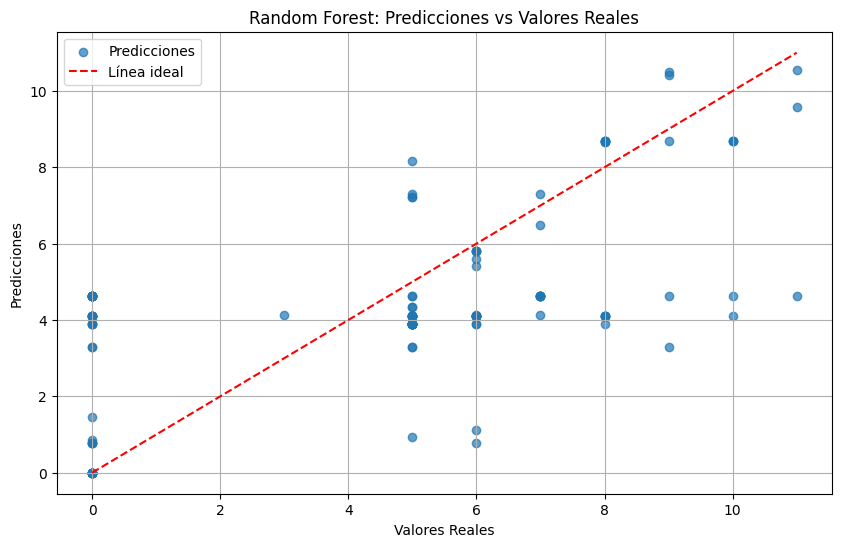

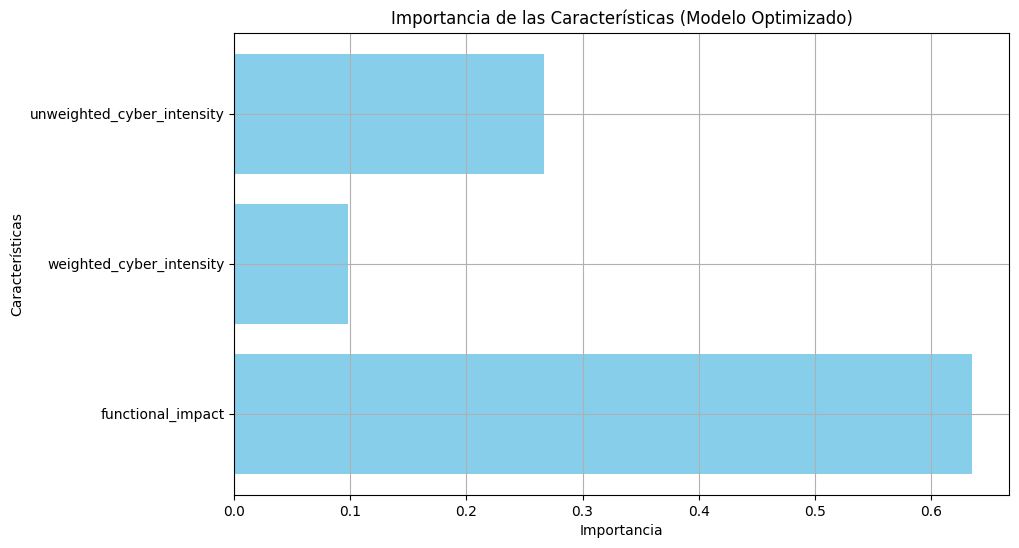

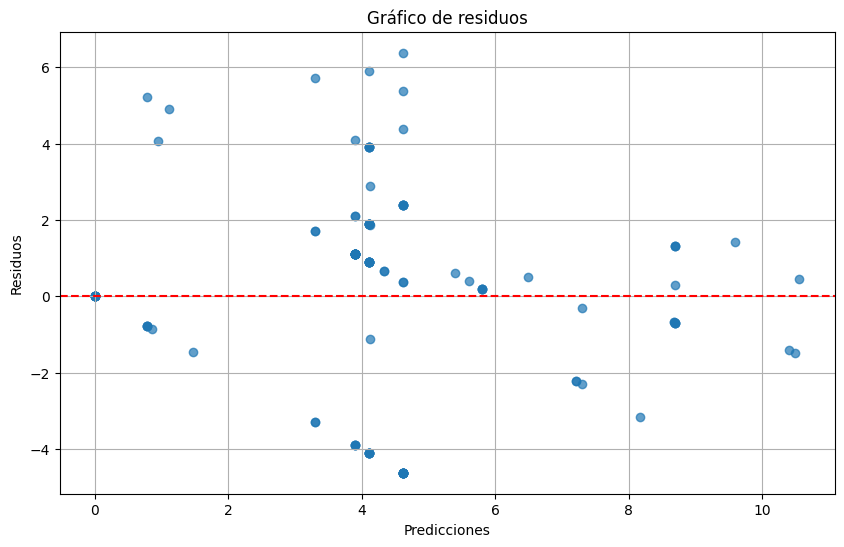

In [ ]:
# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea ideal')
plt.title('Random Forest: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid()
plt.show()

# Importancia de características
importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_columns, importances, color='skyblue')
plt.title('Importancia de las Características (Modelo Optimizado)')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

# Gráfico de residuos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid()
plt.show()


# Bloque 7: Análisis
1. Generar un boxplot para analizar la dispersión y detectar posibles outliers en una de las variables numéricas.
2. Crear un gráfico de frecuencias para visualizar la distribución de las categorías de incidentes.
3. Usar un histograma para observar la distribución de una característica numérica clave.


La columna 'start_date' no está disponible en el dataset.


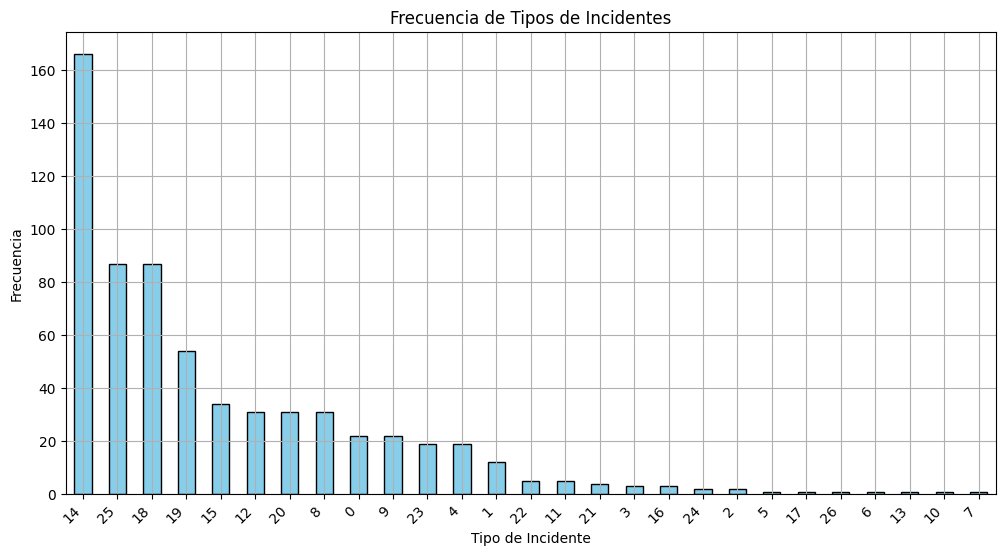

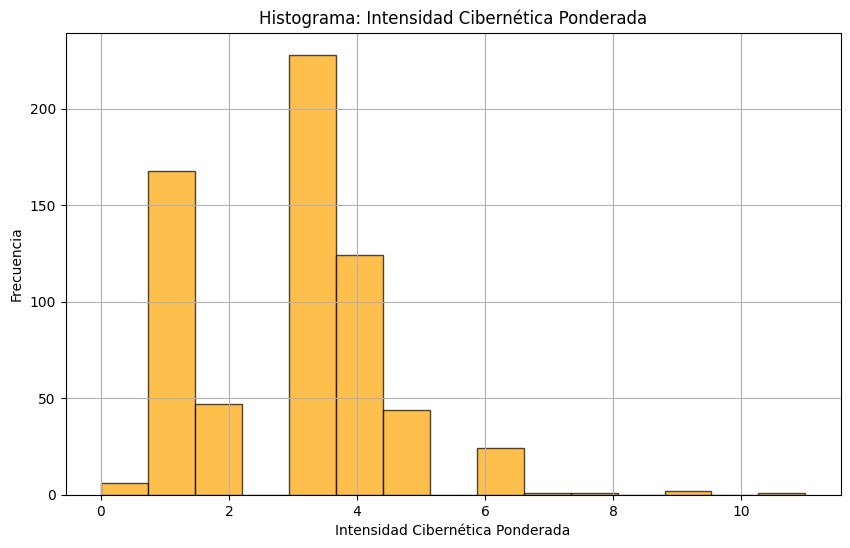

In [ ]:
# Verificar si existe la columna 'start_date' y convertir a datetime si es necesario
if 'start_date' in data_cleaned.columns:
    data_cleaned['start_date'] = pd.to_datetime(data_cleaned['start_date'], errors='coerce')
    data_cleaned['year'] = data_cleaned['start_date'].dt.year  # Extraer el año

    # Contar la frecuencia de ataques por año
    attacks_per_year = data_cleaned['year'].value_counts().sort_index()

    # Graficar la frecuencia de ataques por año
    plt.figure(figsize=(12, 6))
    attacks_per_year.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title('Frecuencia de Ataques por Año')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de Ataques')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("La columna 'start_date' no está disponible en el dataset.")


# Gráfico de frecuencias para los tipos de incidentes
incident_counts = data_cleaned['incident_type'].value_counts()
plt.figure(figsize=(12, 6))
incident_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de Tipos de Incidentes')
plt.xlabel('Tipo de Incidente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

# Histograma para la variable 'weighted_cyber_intensity'
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['weighted_cyber_intensity'].dropna(), bins=15, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histograma: Intensidad Cibernética Ponderada')
plt.xlabel('Intensidad Cibernética Ponderada')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


# Bloque 8: Representación gráfica de métricas de evaluación
1. Crear un gráfico de barras para comparar las métricas MSE, R² y MAE obtenidas durante la evaluación del modelo.
2. Visualizar gráficamente las métricas ayuda a entender mejor el rendimiento del modelo.


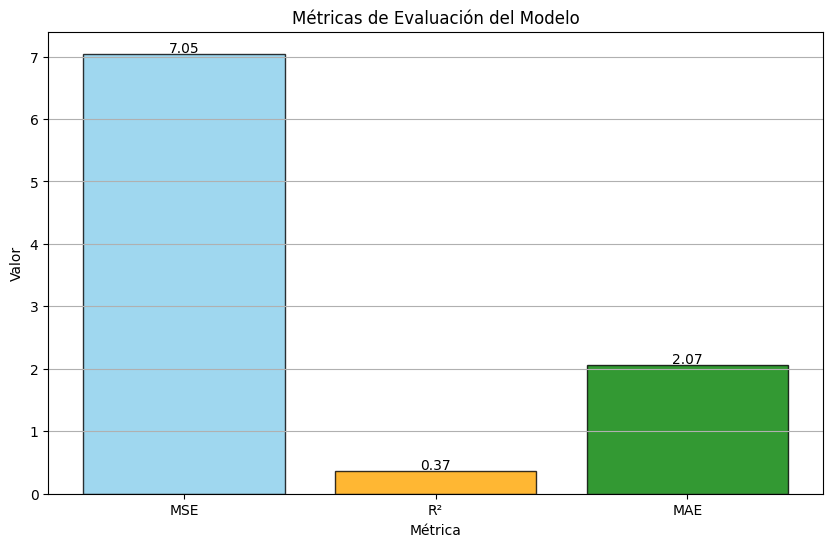

In [ ]:
# Métricas de evaluación
metrics = {'MSE': mse, 'R²': r2, 'MAE': mae}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Gráfico de barras para las métricas
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['skyblue', 'orange', 'green'], edgecolor='black', alpha=0.8)
plt.title('Métricas de Evaluación del Modelo')
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.grid(axis='y')
for i, value in enumerate(metric_values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)
plt.show()


# OTROS GRAFICOS

### Interpretación del Heatmap: Ciberataques por Región y Mes

#### **1. Puntos clave del gráfico:**
- **Regiones principales:**
  - **Desconocido:** Tiene el mayor número de ciberataques en general, especialmente en enero (145 casos). Esto podría sugerir una falta de categorización precisa o que los ataques no se atribuyen a una región específica.
  - **Europa:** Los ciberataques son constantes a lo largo del año, con picos menores en enero (69) y un descenso notable en julio (6).
  - **Asia:** Tiene un nivel de ciberataques más estable, con valores relativamente altos en enero (75), marzo (19), y diciembre (19).
  - **África:** Es la región menos impactada según el registro, con ciberataques esporádicos y un máximo de 4 en enero y febrero.

- **Meses con más ciberataques:**
  - **Enero:** Es el mes con más ciberataques en todas las regiones, lo que podría deberse a tendencias estacionales o vulnerabilidades tecnológicas después de períodos festivos.
  - **Febrero y diciembre:** También muestran picos, aunque menores, lo que puede estar relacionado con actividades específicas (campañas dirigidas o ataques a infraestructuras críticas).

#### **2. Implicaciones prácticas:**
- **Enero como mes crítico:**
  - Las organizaciones deben reforzar medidas de seguridad a inicios del año.
  - Planificar simulacros de ataque y auditorías de sistemas en diciembre para prevenir incidentes en enero.

- **Mayor atención a regiones específicas:**
  - **Europa y Asia** presentan patrones constantes, lo que sugiere que las empresas en estas regiones deberían implementar controles continuos a lo largo del año.
  - La categoría **Desconocido** necesita una revisión: Es posible que los datos no estén categorizados correctamente o que los ataques transfronterizos sean difíciles de atribuir.

- **Bajos ataques en África:**
  - Esto puede reflejar una menor digitalización, un menor número de incidentes reportados, o un sesgo en los datos recopilados.

#### **3. Estrategias basadas en el gráfico:**
- **Fortalecer la vigilancia y prevención en los meses clave (enero, febrero, diciembre).**
- **Mejorar la atribución de ataques:** Investigar y categorizar mejor los ciberataques actualmente en "Desconocido".
- **Fomentar reportes en regiones menos representadas (África):** Esto podría ayudar a entender mejor los riesgos en esas áreas y no subestimarlos.

---
Este análisis resalta la importancia de los patrones temporales y regionales en los ciberataques para tomar decisiones estratégicas de prevención y mitigación.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario para mapear regiones a continentes
region_to_continent = {
    "EUROPE": "Europa",
    "ASIA": "Asia",
    "AFRICA": "África",
    "AMERICA": "América",
    "OCEANIA": "Oceanía",
    "UNKNOWN": "Desconocido"
}

# Crear la columna 'region_general' si no existe
if 'region_general' not in data_cleaned.columns:
    data_cleaned['region_general'] = data_cleaned['receiver_region'].apply(
        lambda x: region_to_continent.get(x.split(";")[0].strip().upper(), "Desconocido") if isinstance(x, str) else "Desconocido"
    )

# Asegúrate de usar una columna de fechas válida, como 'start_date'
data_cleaned['start_date'] = pd.to_datetime(data_cleaned['start_date'], errors='coerce')

# Crear la columna 'month' a partir de la columna de fecha
data_cleaned['month'] = data_cleaned['start_date'].dt.month

# Contar los ciberataques por región general y mes
region_month_counts = data_cleaned.groupby(['region_general', 'month']).size().unstack(fill_value=0)

# Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(region_month_counts, annot=True, fmt="d", cmap="coolwarm", linewidths=.5, cbar_kws={'label': 'Número de Ciberataques'})
plt.title('Heatmap de Ciberataques por Región General y Mes (Simplificado)')
plt.xlabel('Mes')
plt.ylabel('Región General')
plt.xticks(
    ticks=range(1, 13),
    labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    rotation=45
)
plt.tight_layout()
plt.show()


KeyError: 'receiver_region'

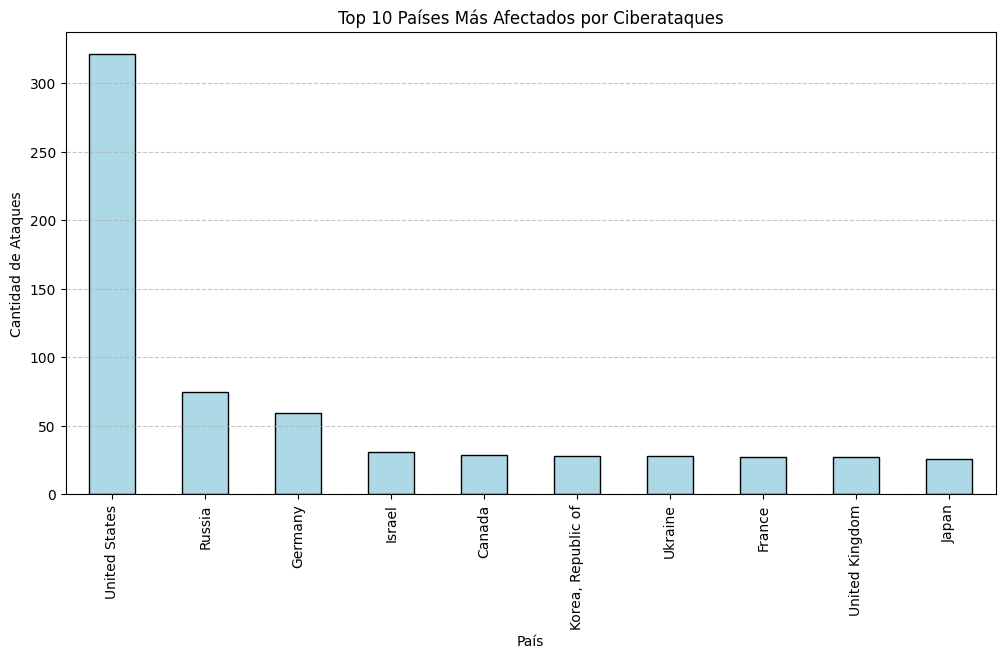

In [ ]:
# Contar ataques por país
if 'receiver_country' in data_cleaned.columns:
    country_counts = data_cleaned['receiver_country'].value_counts().head(10)  # Top 10 países

    # Gráfico de barras para países más afectados
    plt.figure(figsize=(12, 6))
    country_counts.plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title('Top 10 Países Más Afectados por Ciberataques')
    plt.xlabel('País')
    plt.ylabel('Cantidad de Ataques')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("La columna 'receiver_country' no está disponible en el dataset.")


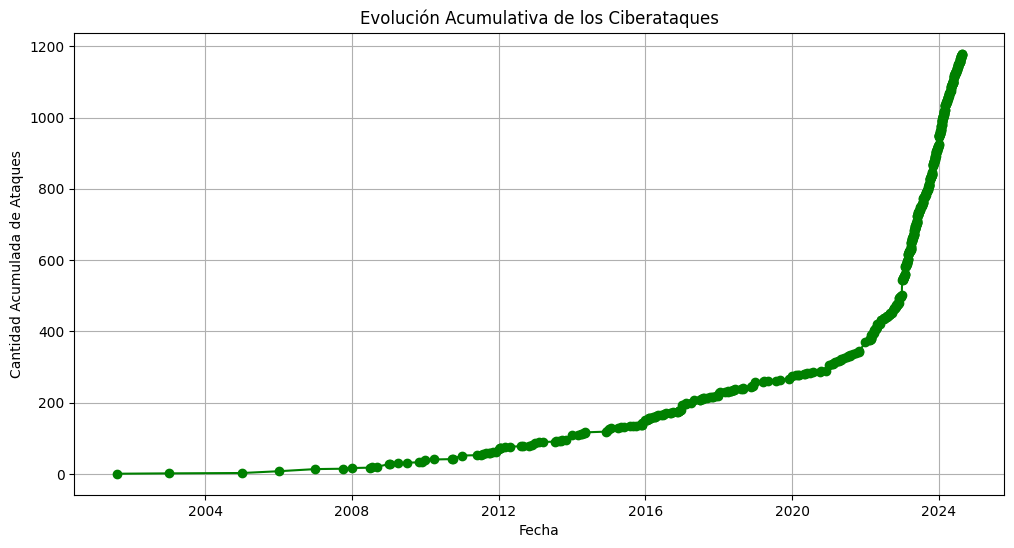

In [ ]:
if 'start_date' in data_cleaned.columns:
    attacks_timeline = data_cleaned['start_date'].dropna().value_counts().sort_index()
    cumulative_attacks = attacks_timeline.cumsum()

    # Gráfico de línea acumulativa
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_attacks.index, cumulative_attacks, marker='o', linestyle='-', color='green')
    plt.title('Evolución Acumulativa de los Ciberataques')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad Acumulada de Ataques')
    plt.grid()
    plt.show()
else:
    print("La columna 'start_date' no está disponible en el dataset.")


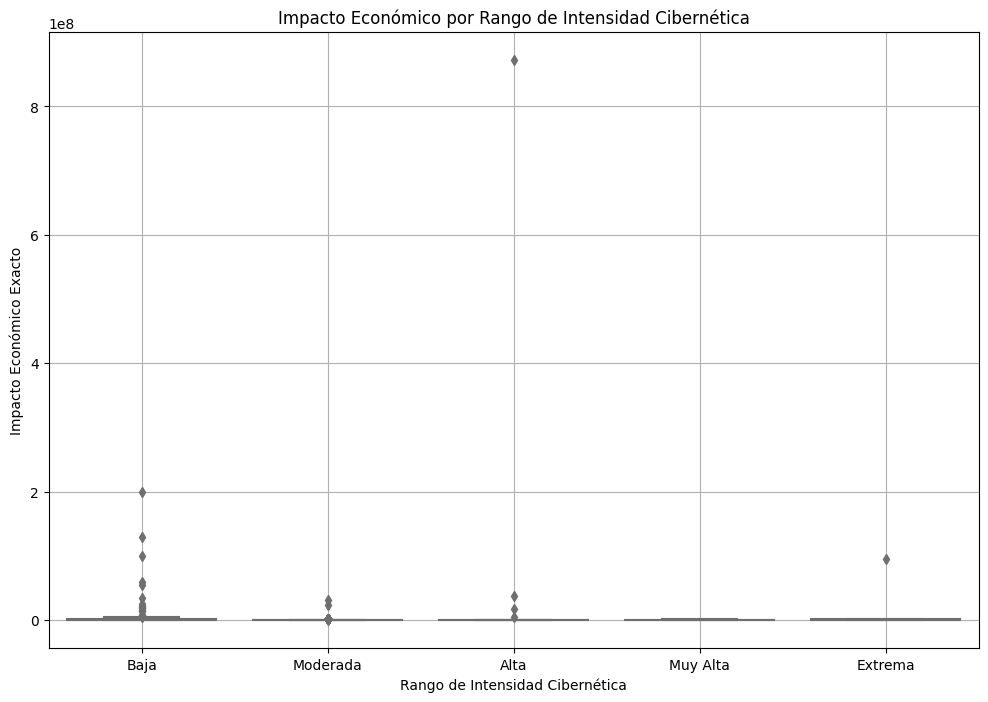

In [ ]:
if 'economic_impact_exact_value' in data_cleaned.columns and 'weighted_cyber_intensity' in data_cleaned.columns:
    # Crear rangos para la intensidad cibernética
    data_cleaned['intensity_bins'] = pd.cut(
        data_cleaned['weighted_cyber_intensity'], bins=5, labels=['Baja', 'Moderada', 'Alta', 'Muy Alta', 'Extrema']
    )
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(
        x='intensity_bins', 
        y='economic_impact_exact_value', 
        data=data_cleaned, 
        palette='pastel'
    )
    plt.title('Impacto Económico por Rango de Intensidad Cibernética')
    plt.xlabel('Rango de Intensidad Cibernética')
    plt.ylabel('Impacto Económico Exacto')
    plt.grid()
    plt.show()
else:
    print("Las columnas necesarias no están disponibles en el dataset.")


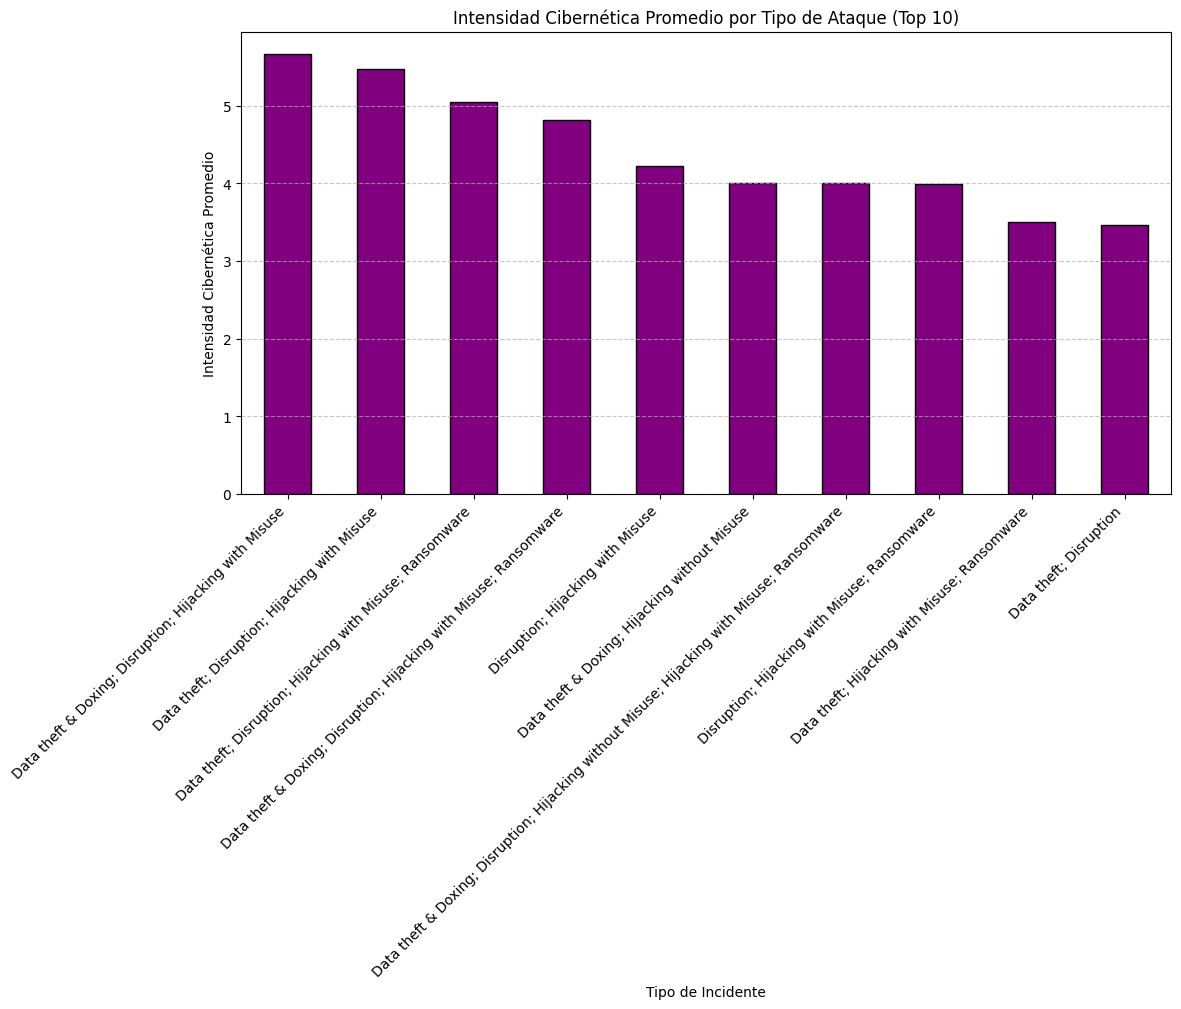

In [ ]:
if 'incident_type' in data_cleaned.columns and 'weighted_cyber_intensity' in data_cleaned.columns:
    avg_intensity_by_type = data_cleaned.groupby('incident_type')['weighted_cyber_intensity'].mean().sort_values(ascending=False).head(10)

    # Gráfico de barras para intensidad promedio por tipo de ataque
    plt.figure(figsize=(12, 6))
    avg_intensity_by_type.plot(kind='bar', color='purple', edgecolor='black')
    plt.title('Intensidad Cibernética Promedio por Tipo de Ataque (Top 10)')
    plt.xlabel('Tipo de Incidente')
    plt.ylabel('Intensidad Cibernética Promedio')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Las columnas necesarias no están disponibles en el dataset.")


## Frecuencia de Ciberataques por Mes y Año

Este bloque genera gráficos de barras para mostrar la frecuencia de ciberataques por mes, separando los datos por los años: 2020, 2021, 2022, 2023 y 2024. 

### Pasos Clave:
1. **Conversión de la columna 'start_date'**:
   - Se verifica que la columna `start_date` esté en formato `datetime`. Si no, se convierte utilizando `pd.to_datetime`.

2. **Filtrado por años específicos**:
   - Se seleccionan los ciberataques ocurridos en los años 2020, 2021, 2022, 2023 y 2024 mediante la extracción del año de la columna `start_date`.

3. **Cálculo de ciberataques por mes**:
   - Para cada año, se crea una nueva columna `month` que extrae el mes de la fecha de inicio del ciberataque.
   - Se cuentan los ciberataques por mes utilizando `value_counts()` y se ordenan los resultados.

4. **Generación de gráficos de barras**:
   - Cada gráfico representa un año y muestra los meses en el eje X y la cantidad de ciberataques en el eje Y.
   - Se estilizan los gráficos con colores, etiquetas descriptivas y cuadrículas para facilitar la lectura.

### Uso del Gráfico:
- Este análisis ayuda a identificar patrones estacionales en los ciberataques.
- Podrás ver en qué meses se producen más incidentes para planificar medidas de **prevención y respuesta**.

### Notas:
- Si no hay datos para un año específico, se imprime un mensaje indicando que no se encontraron ciberataques.


C:\Users\jaal2\AppData\Local\Temp\ipykernel_12568\557823992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['start_date'].dt.month


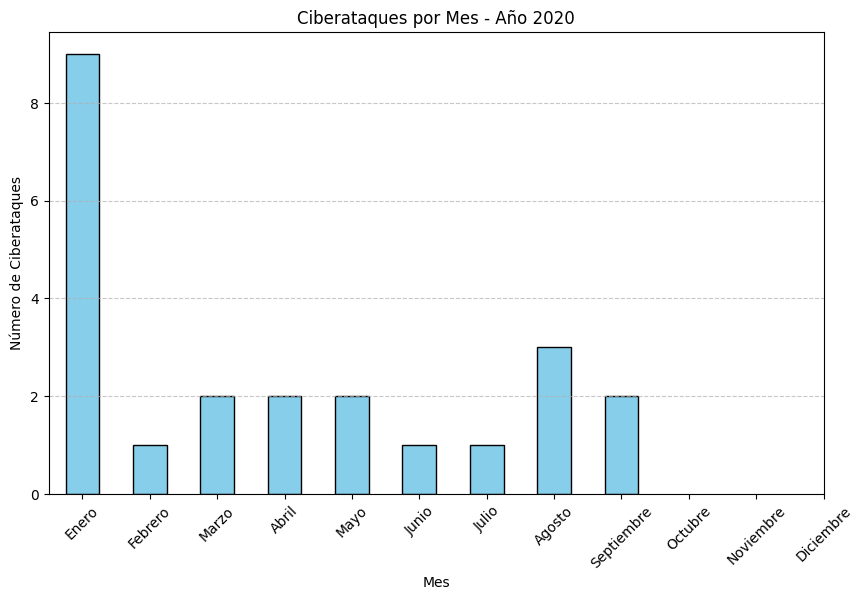

C:\Users\jaal2\AppData\Local\Temp\ipykernel_12568\557823992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['start_date'].dt.month


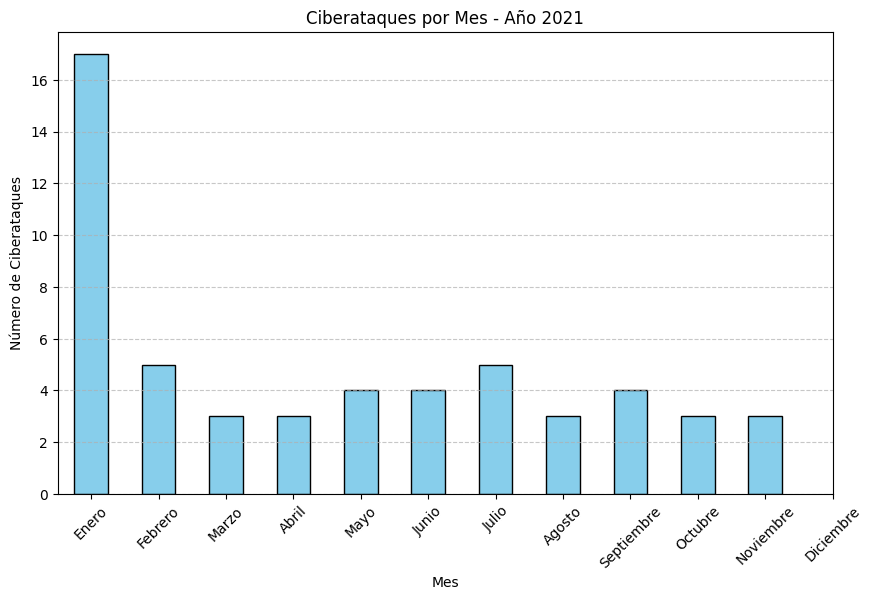

C:\Users\jaal2\AppData\Local\Temp\ipykernel_12568\557823992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['start_date'].dt.month


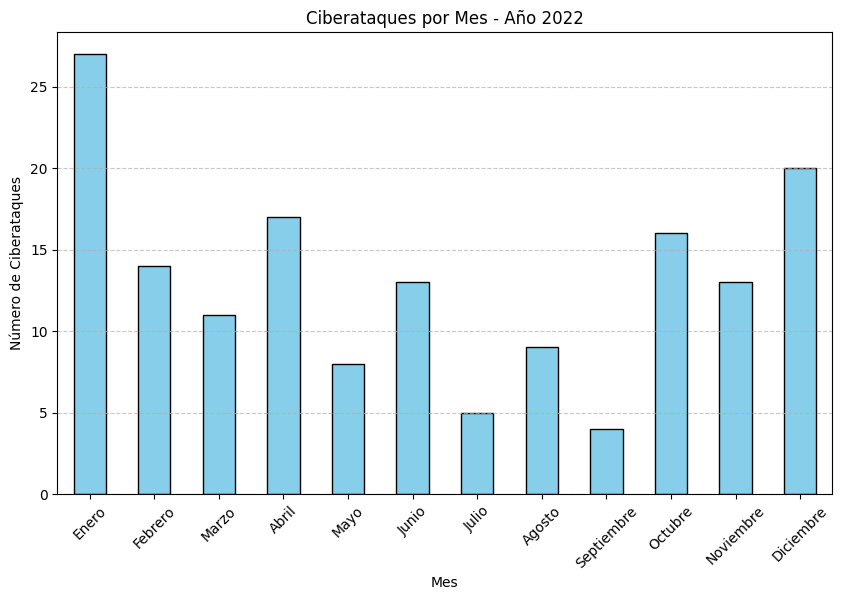

C:\Users\jaal2\AppData\Local\Temp\ipykernel_12568\557823992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['start_date'].dt.month


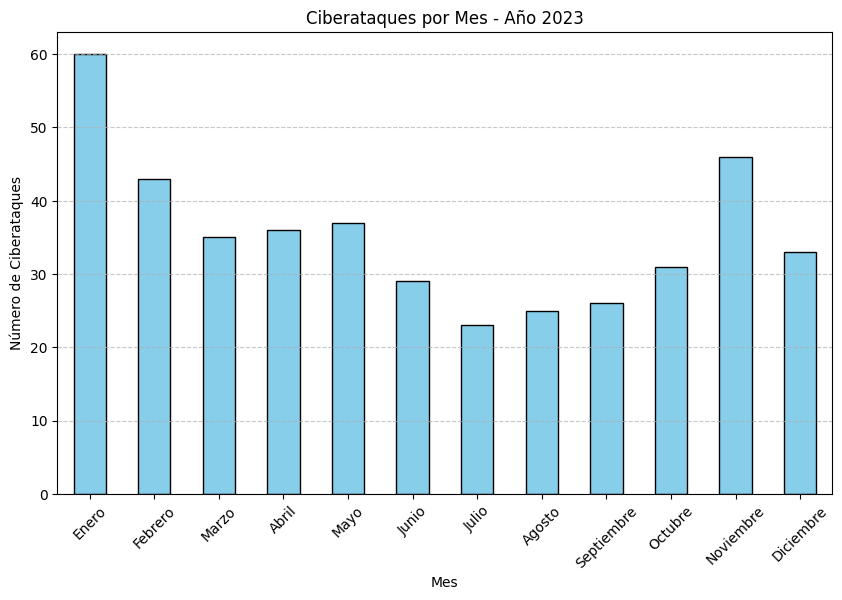

C:\Users\jaal2\AppData\Local\Temp\ipykernel_12568\557823992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['start_date'].dt.month


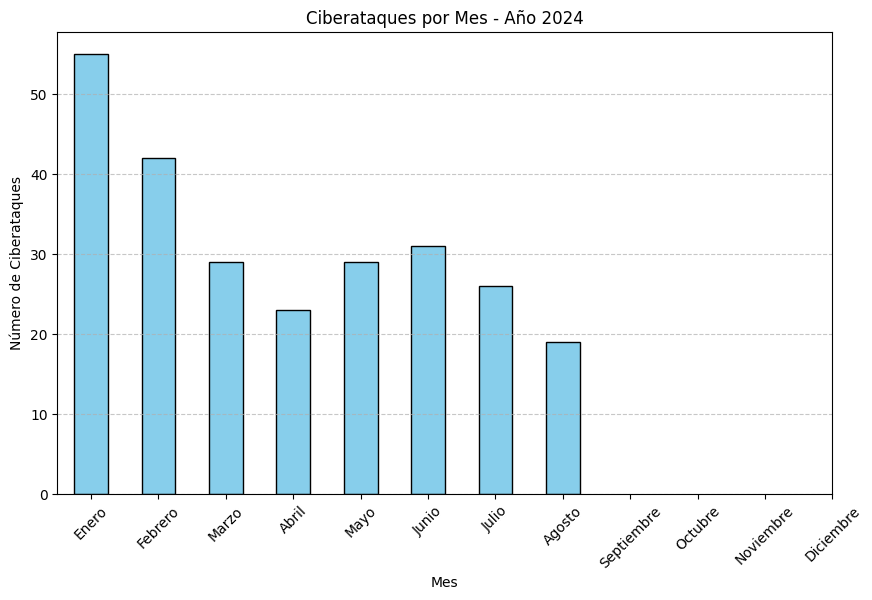

In [ ]:
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'start_date' sea de tipo datetime
if not pd.api.types.is_datetime64_any_dtype(data_cleaned['start_date']):
    data_cleaned['start_date'] = pd.to_datetime(data_cleaned['start_date'], errors='coerce')

# Filtrar los datos por año
years_to_plot = [2020, 2021, 2022, 2023, 2024]

# Iterar sobre los años y generar un gráfico por cada uno
for year in years_to_plot:
    # Filtrar los ciberataques para el año actual
    data_filtered = data_cleaned[data_cleaned['start_date'].dt.year == year]
    
    if not data_filtered.empty:  # Verificar si hay datos para el año actual
        # Contar los ciberataques por mes
        data_filtered['month'] = data_filtered['start_date'].dt.month
        monthly_counts = data_filtered['month'].value_counts().sort_index()

        # Crear el gráfico
        plt.figure(figsize=(10, 6))
        monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Ciberataques por Mes - Año {year}')
        plt.xlabel('Mes')
        plt.ylabel('Número de Ciberataques')
        plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print(f"No se encontraron ciberataques para el año {year}.")


In [ ]:
# Crear un mapeo manual para agrupar tipos de incidentes
incident_mapping = {
    'Data theft': 'Data Breaches',
    'Disruption': 'Disruption',
    'Hijacking with Misuse': 'Hijacking',
    'Hijacking without Misuse': 'Hijacking',
    'Disruption; Hijacking with Misuse': 'Mixed Incidents',
    'Disruption; Hijacking with Misuse; Ransomware': 'Mixed Incidents',
    'Data theft; Disruption': 'Mixed Incidents',
    'Data theft; Hijacking with Misuse': 'Mixed Incidents',
    'Unknown': 'Unknown'
}

# Aplicar el mapeo a la columna 'incident_type'
data_cleaned['incident_category'] = data_cleaned['incident_type'].map(incident_mapping).fillna('Other')

# Agrupar los datos nuevamente
data_grouped = data_cleaned.groupby(['start_date_year', 'incident_category']).size().reset_index(name='incident_count')

# Gráfico de tendencias para las categorías generales
plt.figure(figsize=(14, 8))

# Graficar cada categoría
for category in data_grouped['incident_category'].unique():
    yearly_data = data_grouped[data_grouped['incident_category'] == category]
    plt.plot(yearly_data['start_date_year'], yearly_data['incident_count'], label=category, alpha=0.7, marker='o')

plt.title('Tendencia de Ciberataques por Categoría General')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría de Incidente', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid()
plt.tight_layout()
plt.show()


KeyError: 'start_date_year'

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_21804\4148889519.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_cleaned['incident_type'] = data_cleaned['incident_type'].replace(compact_mapping)
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_21804\4148889519.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(pareto_data.index, rotation=45, ha='right', fontsize=10)
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_21804\4148889519.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Valores únicos después del mapeo:
['Hijacking No Misuse', 'Theft + Hijacking', 'Hijacking Misuse', 'Data theft; Disruption; Hijacking with Misuse..., 'Disruption + Ransomware', ..., 'Data theft; Hijacking without Misuse', 'Data theft & Doxing; Disruption; Hijacking wi..., 'Theft + Doxing + Disruption', 'Data theft; Disruption; Ransomware', 'Data theft & Doxing; Hijacking without Misuse']
Length: 36
Categories (36, object): ['Theft', 'Theft + Doxing', 'Theft + Doxing + Disruption', 'Data theft & Doxing; Disruption; Hijacking wi..., ..., 'Hijacking without Misuse; Hijacking with Misu..., 'Hijacking without Misuse; Ransomware', 'Unknown', 'Others']


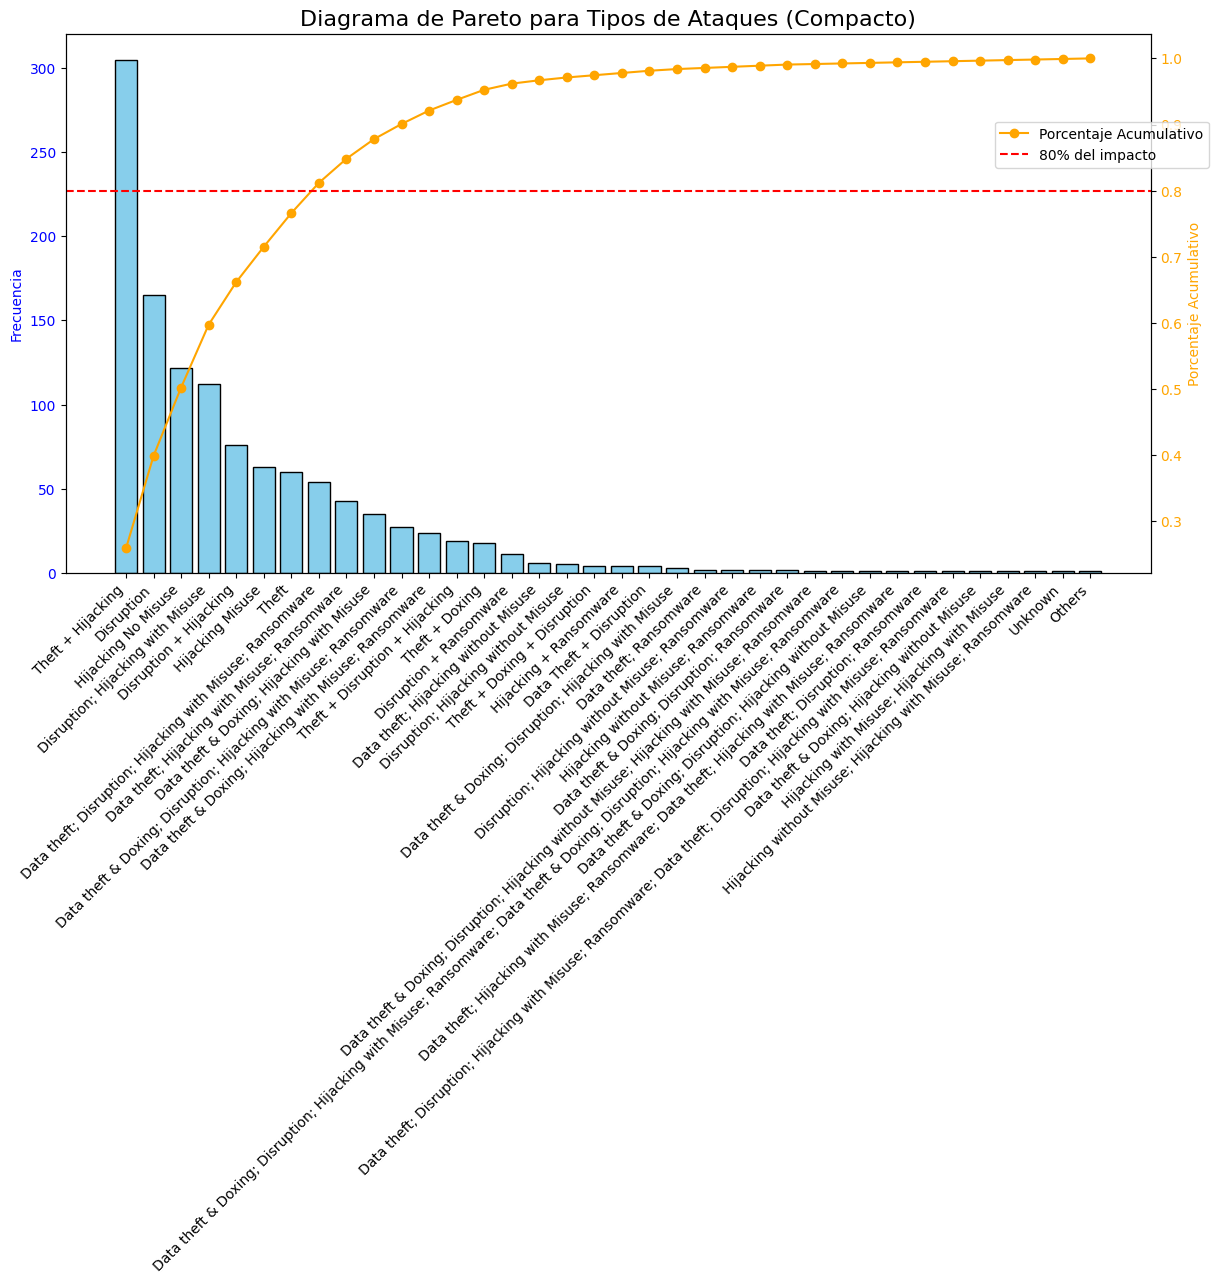

In [ ]:
# Compactar los nombres largos nuevamente
compact_mapping = {
    'Data theft; Hijacking with Misuse': 'Theft + Hijacking Misuse',
    'Data theft & Doxing; Disruption': 'Theft + Doxing + Disruption',
    # Añadir más mapeos según sea necesario
}

# Aplicar el mapeo para acortar los nombres
data_cleaned['incident_type'] = data_cleaned['incident_type'].replace(compact_mapping)

# Verificar valores únicos después del mapeo
print("Valores únicos después del mapeo:")
print(data_cleaned['incident_type'].unique())

# Volver a generar el gráfico de Pareto
pareto_data = data_cleaned['incident_type'].value_counts()
pareto_percentage = pareto_data.cumsum() / pareto_data.sum()

fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de barras
ax1.bar(pareto_data.index, pareto_data, color='skyblue', edgecolor='black')
ax1.set_ylabel('Frecuencia', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Diagrama de Pareto para Tipos de Ataques (Compacto)', fontsize=16)

# Gráfico de línea para el porcentaje acumulativo
ax2 = ax1.twinx()
ax2.plot(pareto_data.index, pareto_percentage, color='orange', marker='o', linestyle='-', label='Porcentaje Acumulativo')
ax2.axhline(y=0.8, color='red', linestyle='--', label='80% del impacto')
ax2.set_ylabel('Porcentaje Acumulativo', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Configuración de leyendas y etiquetas
ax1.set_xticklabels(pareto_data.index, rotation=45, ha='right', fontsize=10)
ax2.legend(loc='upper left', bbox_to_anchor=(0.85, 0.85))

plt.tight_layout()
plt.show()


C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_21804\879742072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attack_counts_per_region = data_cleaned.groupby('receiver_region').size()
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_21804\879742072.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  economic_impact_per_region = data_cleaned.groupby('receiver_region')['economic_impact_exact_value'].sum()


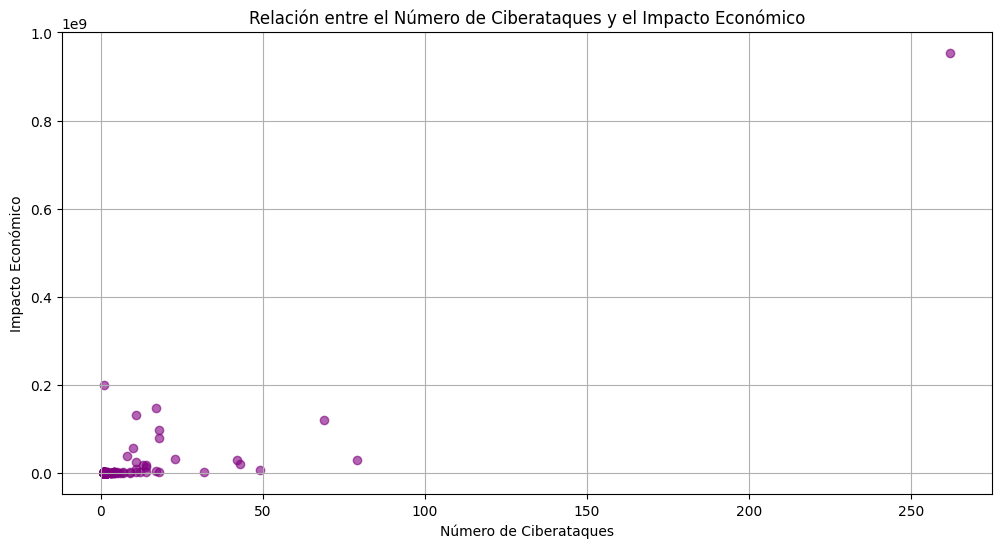

In [ ]:
attack_counts_per_region = data_cleaned.groupby('receiver_region').size()
economic_impact_per_region = data_cleaned.groupby('receiver_region')['economic_impact_exact_value'].sum()

plt.figure(figsize=(12, 6))
plt.scatter(attack_counts_per_region, economic_impact_per_region, color='purple', alpha=0.6)
plt.title('Relación entre el Número de Ciberataques y el Impacto Económico')
plt.xlabel('Número de Ciberataques')
plt.ylabel('Impacto Económico')
plt.grid()
plt.show()


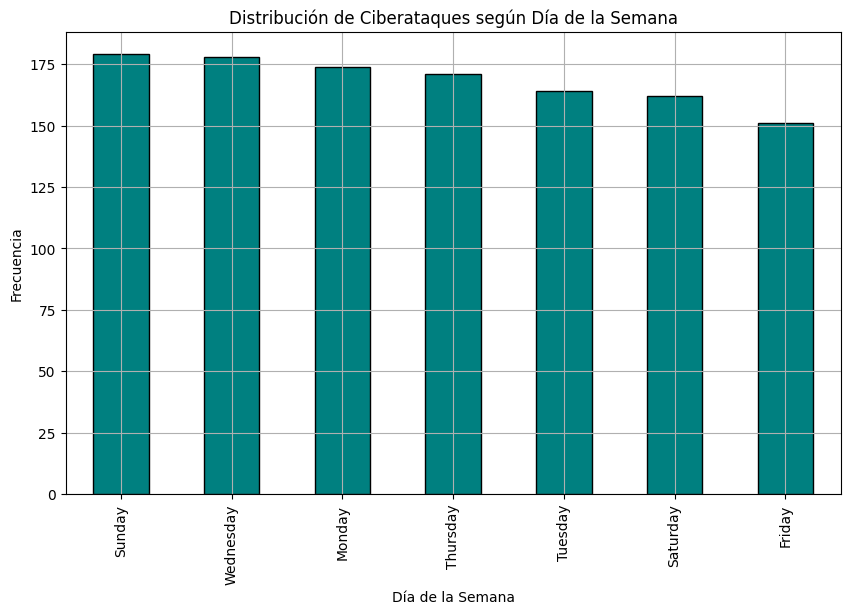

In [ ]:
data_cleaned['day_of_week'] = data_cleaned['start_date'].dt.day_name()

day_counts = data_cleaned['day_of_week'].value_counts()
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Distribución de Ciberataques según Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


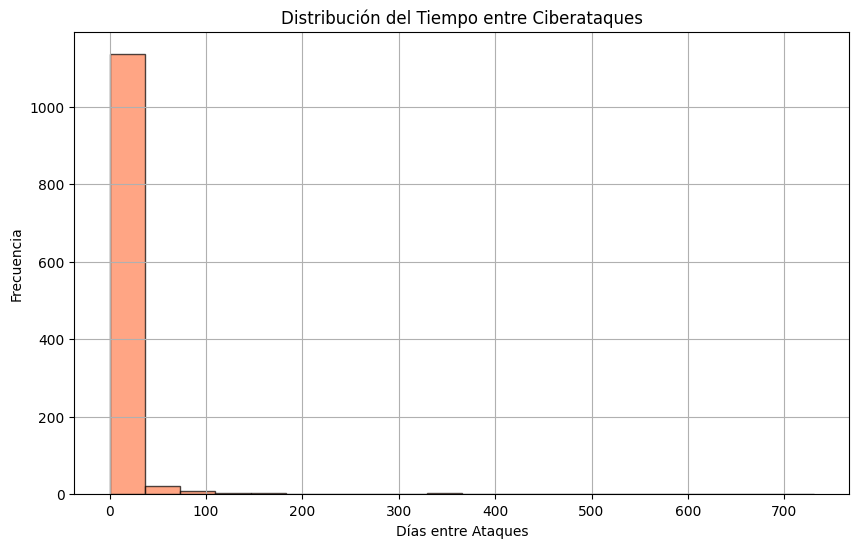

In [ ]:
data_cleaned = data_cleaned.sort_values('start_date')
data_cleaned['time_between_attacks'] = data_cleaned['start_date'].diff().dt.days

plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['time_between_attacks'].dropna(), bins=20, color='coral', edgecolor='black', alpha=0.7)
plt.title('Distribución del Tiempo entre Ciberataques')
plt.xlabel('Días entre Ataques')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


In [ ]:
# Guardar el dataset limpio en un archivo CSV
output_file_path = "./data/EUROREPO_cleaned.csv"
data_cleaned.to_csv(output_file_path, index=False, encoding='utf-8')
print(f"El dataset limpio se ha guardado en: {output_file_path}")


El dataset limpio se ha guardado en: ./data/EUROREPO_cleaned.csv
